## Trade War Exposure Research

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [623]:
df = pd.read_excel('Supply Chain Data All_with unquant.xlsx',sheet_name='Supply Chain')
df['Relationship Value USD']=pd.to_numeric(df['Relationship Value USD'],errors='coerce')
df_Suppliers = df[df['Relationship Type']=="Suppliers"]
df_Suppliers = df_Suppliers[(df_Suppliers['Central Country']=="CN")|(df_Suppliers['Central Country']=="US") ]
df_Suppliers["Relation"] = df_Suppliers["Central Country"] + "-" +df_Suppliers["Supplier Country"]

In [454]:
df_Suppliers= df_Suppliers[df_Suppliers['Relationship Value USD']>0]

In [411]:
df_Suppliers_net[df_Suppliers_net['As Of Date Bloomberg']==20171231].to_excel('supply_chain_20171231.xlsx',sheet_name='20171231',index=False)
df_Suppliers_net[df_Suppliers_net['As Of Date Bloomberg']==20180331].to_excel('supply_chain_20180331.xlsx',sheet_name='20171231',index=False)
df_Suppliers_net[df_Suppliers_net['As Of Date Bloomberg']==20180630].to_excel('supply_chain_20180630.xlsx',sheet_name='20171231',index=False)
df_Suppliers_net[df_Suppliers_net['As Of Date Bloomberg']==20180930].to_excel('supply_chain_20180930.xlsx',sheet_name='20171231',index=False)
df_Suppliers_net[df_Suppliers_net['As Of Date Bloomberg']==20181231].to_excel('supply_chain_20181231.xlsx',sheet_name='20171231',index=False)
df_Suppliers_net[df_Suppliers_net['As Of Date Bloomberg']==20190331].to_excel('supply_chain_20190331.xlsx',sheet_name='20171231',index=False)

In [332]:
df_Suppliers.dtypes

Central Ticker                 object
Central Company                object
As Of Date Bloomberg            int64
Central Country                object
Market_Cap_Central            float64
Stock Number                   object
Listed Country                 object
Supplier Registered Name       object
Supplier Company               object
Supplier Ticker                object
Relationship Type              object
Supplier Country               object
Supplier Market Cap            object
Latest Inv. Growth             object
% Revenue get from central    float64
Relationship Value             object
Currency                       object
Account As Type                object
%Cost                         float64
Relationship Value USD        float64
Source                         object
As Of Date                     object
Relation                       object
dtype: object

In [624]:
# number of total suppliers across time
df_supp_time = pd.pivot_table(df_Suppliers[df_Suppliers['As Of Date Bloomberg']!=20180321],index=['As Of Date Bloomberg'],
                              values=['Supplier Ticker'],aggfunc={'Supplier Ticker':lambda x: len(x.unique())})
df_supp_time.reset_index(inplace=True)
df_supp_time['As Of Date Bloomberg']=pd.to_datetime(df_supp_time['As Of Date Bloomberg'],format="%Y%m%d")

In [625]:
df_supp_time

As Of Date Bloomberg  Supplier Ticker
0           2017-03-31              737
1           2017-12-31             1809
2           2018-03-31              669
3           2018-06-30              564
4           2018-09-30              565
5           2018-12-31             1918
6           2019-03-31              546

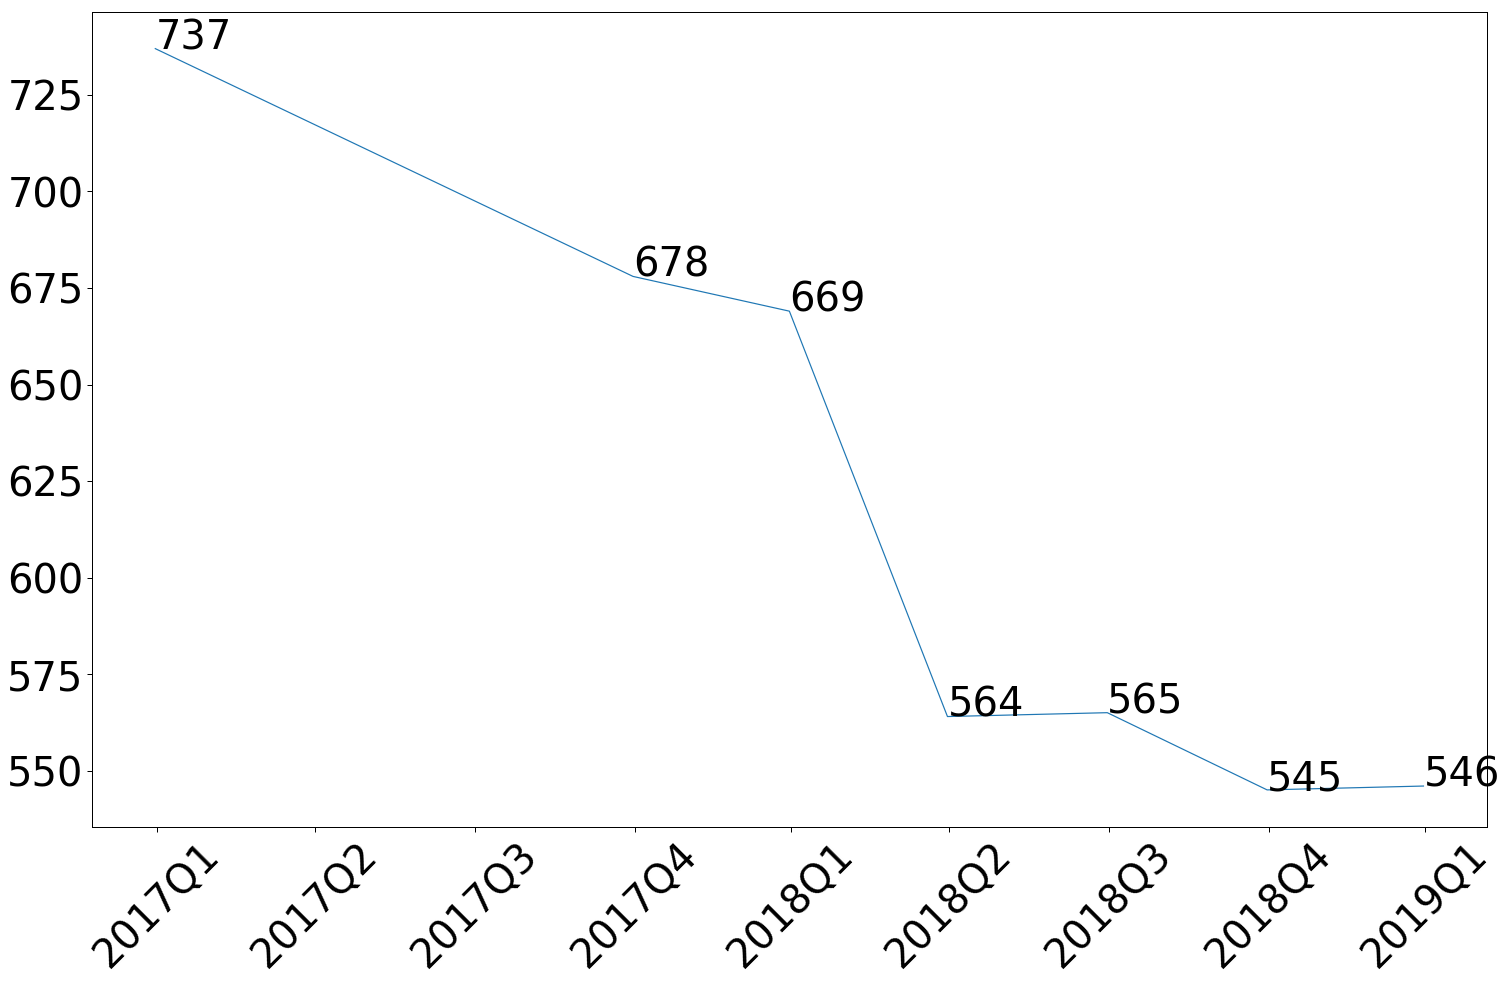

In [614]:
fig = plt.figure(figsize=(25,15))
ax = plt.axes()
ax.plot(df_supp_time['As Of Date Bloomberg'],df_supp_time['Supplier Ticker'])
for j in range(len(df_supp_time)):
    ax.annotate(df_supp_time.iloc[j,1],xy=(df_supp_time.iloc[j,0],df_supp_time.iloc[j,1]),fontsize=40)
#plt.legend(fontsize=18)
ax.tick_params(axis = 'both', which = 'major', labelsize = 40)
ax.set_xticklabels(["2017Q1","2017Q2","2017Q3","2017Q4","2018Q1","2018Q2","2018Q3","2018Q4","2019Q1"],rotation=45)
plt.show()


In [4]:
df_uscn_trade = pd.pivot_table(df_Suppliers.loc[(df_Suppliers["Relation"]=="CN-US")| (df_Suppliers["Relation"]=="US-CN")],
                       index=['Central Ticker','As Of Date Bloomberg']
                      ,values=['%Cost','Relationship Value USD'],aggfunc={'%Cost':np.sum,
                                                                         'Relationship Value USD':np.sum})
df_uscn_trade.reset_index(inplace=True)
df_su_all_group = pd.pivot_table(df_Suppliers,
                       index=['Central Ticker','As Of Date Bloomberg','Market_Cap_Central']
                      ,values=['Central Country','%Cost','Relationship Value USD'],aggfunc={'Central Country':np.max,'%Cost':np.sum,
                                                                         'Relationship Value USD':np.sum})
df_su_all_group.reset_index(inplace=True)
df_su_group2 = pd.merge(df_su_all_group,df_uscn_trade,how='left', left_on=['Central Ticker','As Of Date Bloomberg'],
                        right_on=['Central Ticker','As Of Date Bloomberg'],suffixes=('_total', '_Exposure'))
df_su_group2['portion of total relationship value'] = df_su_group2['Relationship Value USD_Exposure']/df_su_group2['Relationship Value USD_total']
df_su_group2 = df_su_group2.fillna(0)
df_su_group2['As Of Date Bloomberg'] = pd.to_datetime(df_su_group2['As Of Date Bloomberg'],format="%Y%m%d")
df_su_group2['% of total relationship value'] = (100 * df_su_group2['portion of total relationship value']).round(2).astype(str) + '%'
df_su_group2['% of Cost'] = (100 * df_su_group2['%Cost_Exposure']).round(2).astype(str) + '%'
df_su_group2

Central Ticker As Of Date Bloomberg  Market_Cap_Central  %Cost_total  \
0    000572 CH Equity           2017-03-31        5.397923e+08       0.0707   
1    000572 CH Equity           2017-12-31        5.397923e+08       0.0670   
2    000572 CH Equity           2018-03-21        5.397923e+08       0.0690   
3    000572 CH Equity           2018-03-31        5.397923e+08       0.0690   
4    000572 CH Equity           2018-06-30        5.397923e+08       0.0186   
5    000572 CH Equity           2018-09-30        5.397923e+08       0.2496   
6    000572 CH Equity           2018-12-31        5.397923e+08       0.0186   
7    000572 CH Equity           2019-03-31        5.397923e+08       0.0222   
8    000800 CH Equity           2017-03-31        2.080400e+09       0.8544   
9    000800 CH Equity           2017-12-31        2.080400e+09       1.2736   
10   000800 CH Equity           2018-03-21        2.080400e+09       1.2745   
11   000800 CH Equity           2018-03-31        2.080400e+09       1.3704   
12   000800 CH Equity           2018-06-30        2.080400e+09       1.0032   
13   000800 CH Equity           2018-09-30        2.080400e+09       0.4132   
14   000800 CH Equity           2018-12-31        2.080400e+09       0.6369   
15   000800 CH Equity           2019-03-31        2.080400e+09       0.6243   
16   000913 CH Equity           2017-03-31        6.742335e+08       0.0496   
17   000913 CH Equity           2017-12-31        6.742335e+08       0.1112   
18   000913 CH Equity           2018-03-21        6.742335e+08       0.1190   
19   000913 CH Equity           2018-03-31        6.742335e+08       0.1190   
20   000913 CH Equity           2018-06-30        6.742335e+08       0.1284   
21   000913 CH Equity           2018-09-30        6.742335e+08       0.1302   
22   000913 CH Equity           2018-12-31        6.742335e+08       0.1302   
23   000913 CH Equity           2019-03-31        6.742335e+08       0.1369   
24   000927 CH Equity           2017-03-31        1.184520e+09       0.5247   
25   000927 CH Equity           2017-12-31        1.184520e+09       0.4075   
26   000927 CH Equity           2018-03-21        1.184520e+09       0.4077   
27   000927 CH Equity           2018-03-31        1.184520e+09       0.4499   
28   000927 CH Equity           2018-06-30        1.184520e+09       0.4155   
29   000927 CH Equity           2018-09-30        1.184520e+09       0.3546   
..                ...                  ...                 ...          ...   
258     HOG US Equity           2018-09-30        5.917209e+09       0.0935   
259     HOG US Equity           2018-12-31        5.917209e+09       0.1686   
260     HOG US Equity           2019-03-31        5.917209e+09       0.1618   
261     NIO US Equity           2018-09-30        0.000000e+00       0.0038   
262     NIO US Equity           2018-12-31        0.000000e+00       0.0135   
263     NIO US Equity           2019-03-31        0.000000e+00       0.0398   
264     THO US Equity           2017-03-31        3.638044e+09       0.1508   
265     THO US Equity           2017-12-31        3.638044e+09       0.1618   
266     THO US Equity           2018-03-21        3.638044e+09       0.1543   
267     THO US Equity           2018-03-31        3.638044e+09       0.1543   
268     THO US Equity           2018-06-30        3.638044e+09       0.1538   
269     THO US Equity           2018-09-30        3.638044e+09       0.1483   
270     THO US Equity           2018-12-31        3.638044e+09       0.1484   
271     THO US Equity           2019-03-31        3.638044e+09       0.1437   
272    TSLA US Equity           2017-03-31        4.508124e+10       0.3962   
273    TSLA US Equity           2017-12-31        4.508124e+10       0.3565   
274    TSLA US Equity           2018-03-21        4.508124e+10       0.3673   
275    TSLA US Equity           2018-03-31        4.508124e+10       0.1179   
276    TSLA US Equity           2018-06-30        4.50812

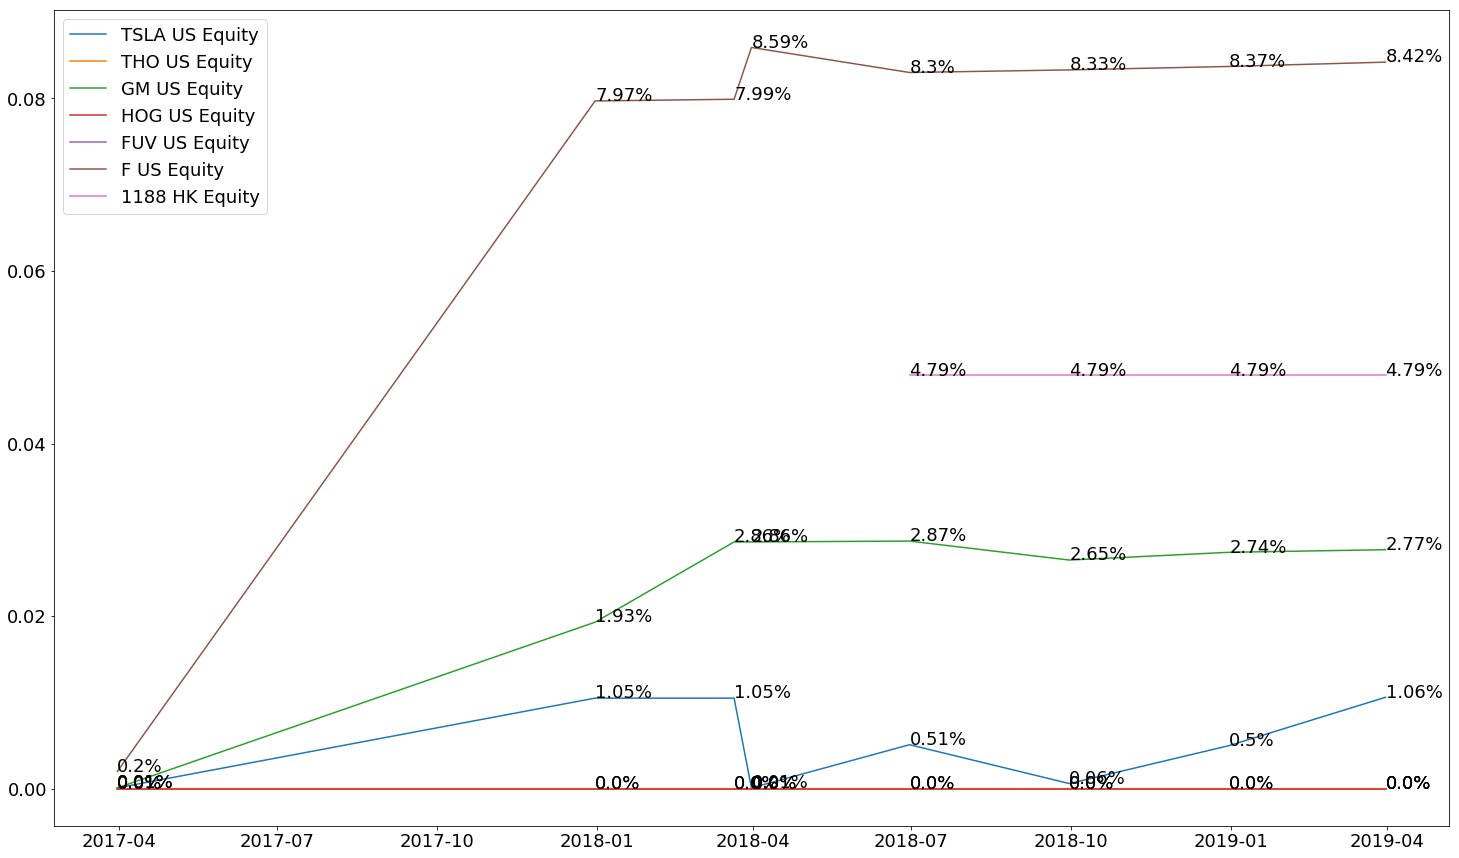

In [5]:
#US Firm
fig = plt.figure(figsize=(25,15))
ax = plt.axes()

df_US_score = df_su_group2[(df_su_group2['Central Country']=='US')&(df_su_group2['Central Ticker']!='WGO US Equity')]
company_list = set(df_US_score['Central Ticker'])
for i in company_list:
    a=df_US_score[df_US_score['Central Ticker']==i]['As Of Date Bloomberg']
    b=df_US_score[df_US_score['Central Ticker']==i]['%Cost_Exposure']
    ax.plot(a,b,label = i)
for j in range(len(df_US_score)):
    ax.annotate(df_US_score.iloc[j,10],xy=(df_US_score.iloc[j,1],df_US_score.iloc[j,6]),fontsize=18)
plt.legend(fontsize=18)
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.show()

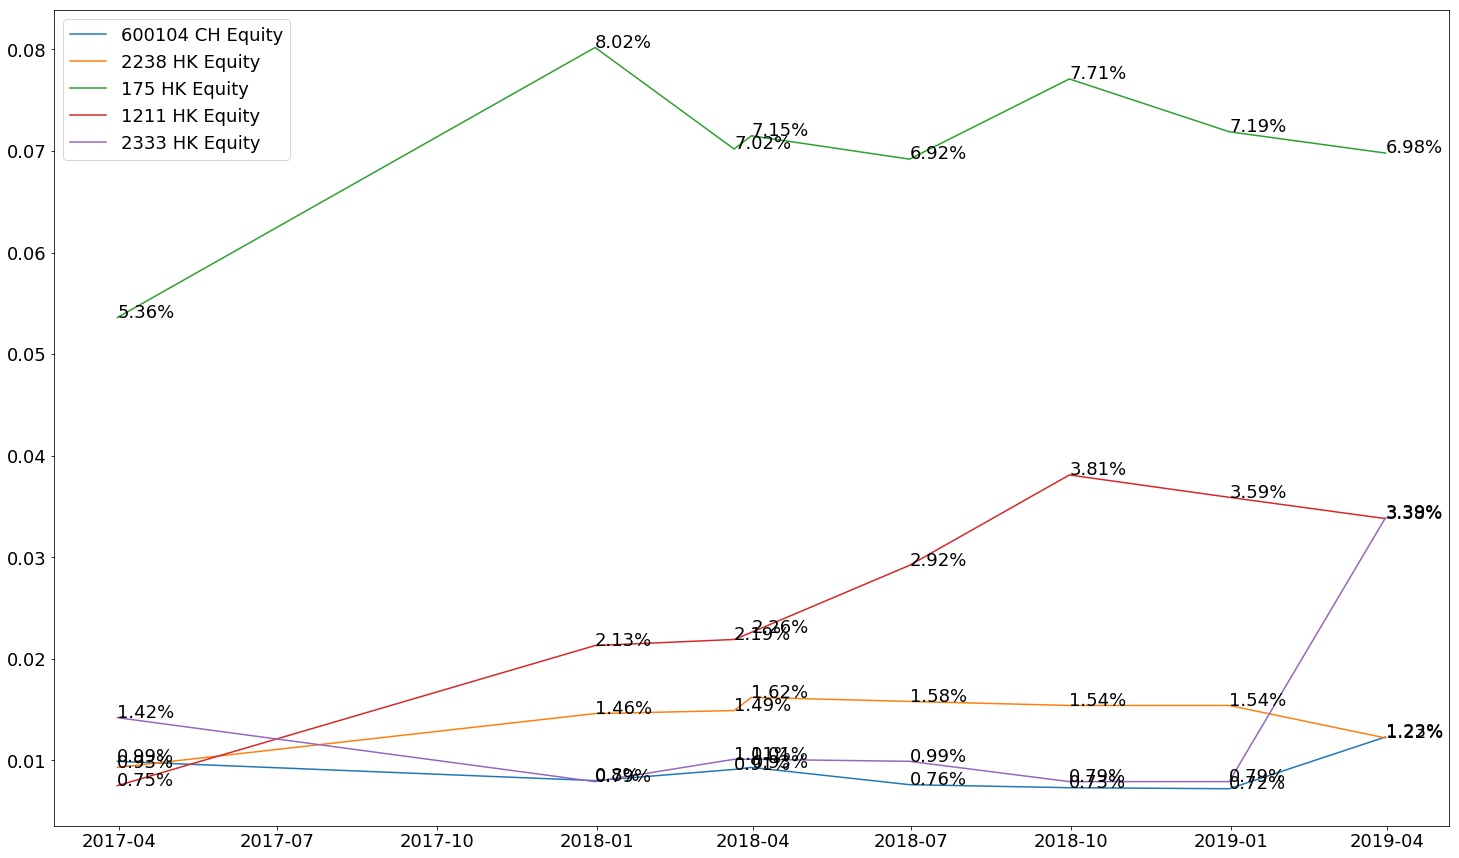

In [6]:
#CN Big Firm
fig = plt.figure(figsize=(25,15))
ax = plt.axes()

df_US_score = df_su_group2[(df_su_group2['Central Country']=='CN')&(df_su_group2['Market_Cap_Central']>1e10)]
company_list = set(df_US_score['Central Ticker'])
for i in company_list:
    a=df_US_score[df_US_score['Central Ticker']==i]['As Of Date Bloomberg']
    b=df_US_score[df_US_score['Central Ticker']==i]['%Cost_Exposure']
    ax.plot(a,b,label = i)
for j in range(len(df_US_score)):
    ax.annotate(df_US_score.iloc[j,10],xy=(df_US_score.iloc[j,1],df_US_score.iloc[j,6]),fontsize=18)
plt.legend(fontsize=18)
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.show()

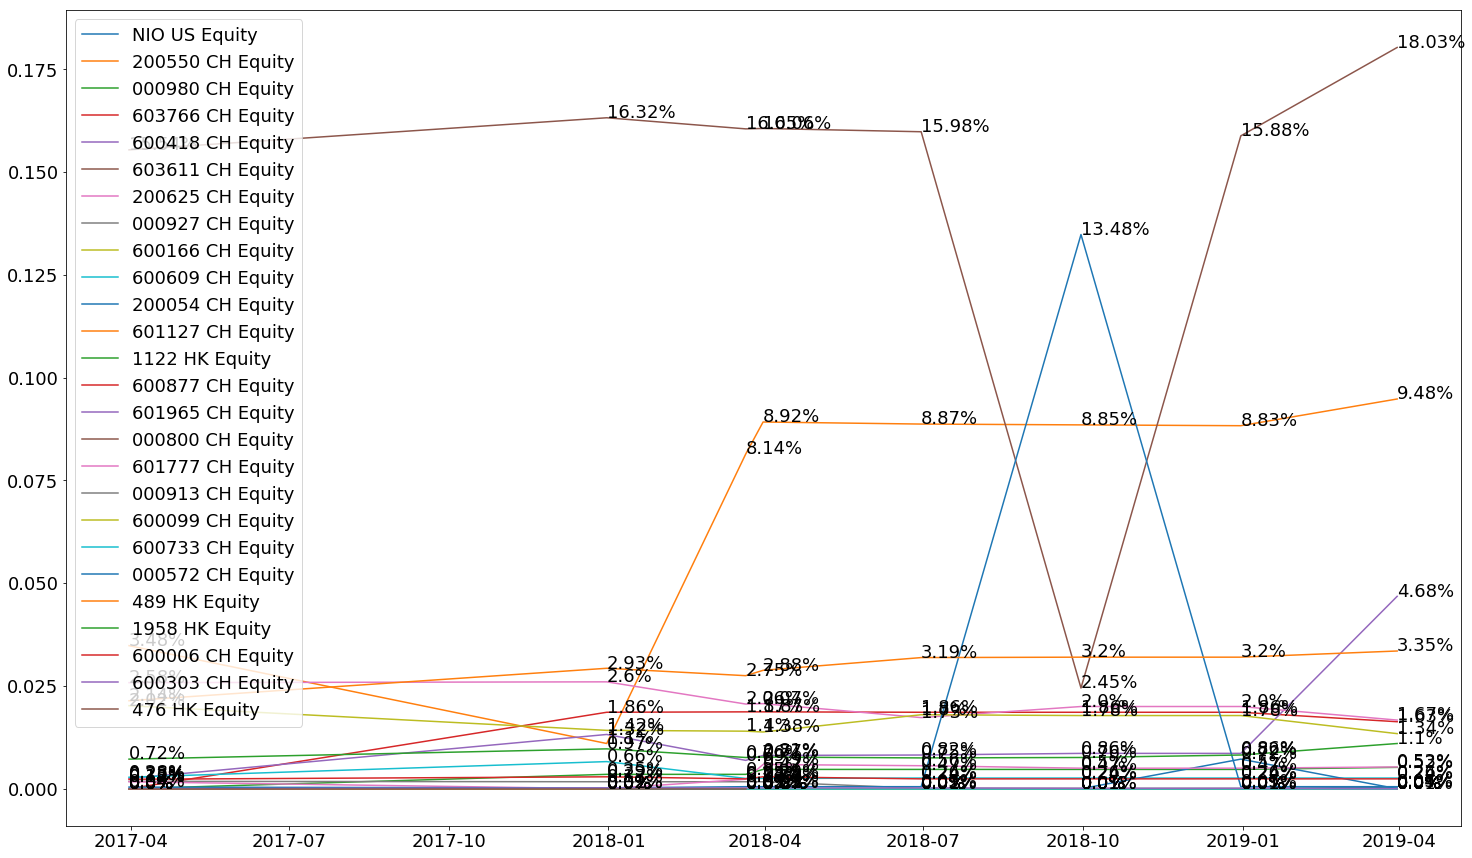

In [7]:
#CN Small Firm
fig = plt.figure(figsize=(25,15))
ax = plt.axes()

df_US_score = df_su_group2[(df_su_group2['Central Country']=='CN')&(df_su_group2['Market_Cap_Central']<1e10)]
company_list = set(df_US_score['Central Ticker'])
for i in company_list:
    a=df_US_score[df_US_score['Central Ticker']==i]['As Of Date Bloomberg']
    b=df_US_score[df_US_score['Central Ticker']==i]['%Cost_Exposure']
    ax.plot(a,b,label = i)
for j in range(len(df_US_score)):
    ax.annotate(df_US_score.iloc[j,10],xy=(df_US_score.iloc[j,1],df_US_score.iloc[j,6]),fontsize=18)
plt.legend(fontsize=18)
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.show()

## Degree of Supplier Change

In [109]:
df_count_sup = pd.pivot_table(df_Suppliers,index=['Central Ticker'],columns=['As Of Date Bloomberg'],
                      values=['Supplier Ticker'],aggfunc={'Supplier Ticker':lambda x: len(x.unique())})
df_count_sup

Supplier Ticker                                      \
As Of Date Bloomberg        20170331 20171231 20180321 20180331 20180630   
Central Ticker                                                             
000572 CH Equity                 9.0     10.0     10.0     10.0      8.0   
000800 CH Equity                95.0     98.0     98.0    100.0     77.0   
000913 CH Equity                 7.0     12.0     13.0     13.0     13.0   
000927 CH Equity                42.0     42.0     41.0     42.0     35.0   
000980 CH Equity                 9.0     19.0     18.0     19.0     16.0   
1122 HK Equity                   1.0      2.0      1.0      1.0      1.0   
1188 HK Equity                   NaN      NaN      NaN      NaN      1.0   
1211 HK Equity                  47.0     62.0     61.0     58.0     60.0   
175 HK Equity                   71.0     83.0     89.0     89.0     91.0   
1958 HK Equity                  14.0     20.0     21.0     19.0     21.0   
200054 CH Equity                15.0     22.0     22.0     22.0     19.0   
200550 CH Equity                43.0     53.0     72.0     52.0     40.0   
200625 CH Equity                73.0     82.0     82.0     82.0     58.0   
2238 HK Equity                  27.0     27.0     26.0     27.0     30.0   
2333 HK Equity                  43.0     43.0     47.0     44.0     46.0   
476 HK Equity                    1.0      NaN      1.0      NaN      NaN   
489 HK Equity                   50.0     52.0     53.0     53.0     57.0   
600006 CH Equity                57.0     62.0     62.0     64.0     35.0   
600099 CH Equity                10.0     11.0     12.0     12.0      6.0   
600104 CH Equity                63.0     58.0     60.0     61.0     62.0   
600166 CH Equity                55.0     69.0     69.0     69.0     61.0   
600303 CH Equity                 1.0      5.0      5.0      5.0      5.0   
600418 CH Equity                36.0     57.0     57.0     57.0     53.0   
600609 CH Equity                13.0     21.0     20.0     19.0     15.0   
600733 CH Equity                 NaN      2.0      4.0      4.0      3.0   
600877 CH Equity                12.0     12.0     12.0     16.0      9.0   
601127 CH Equity                 6.0     11.0     11.0     11.0      9.0   
601777 CH Equity                 5.0      2.0      5.0      6.0      6.0   
601965 CH Equity                 4.0      5.0      4.0      4.0      1.0   
603611 CH Equity                 NaN      5.0      5.0      6.0      5.0   
603766 CH Equity                 5.0     15.0     13.0     13.0     13.0   
F US Equity                    277.0    263.0    263.0    258.0    248.0   
FUV US Equity                    NaN      NaN      NaN      NaN      NaN   
GM US Equity                   294.0    279.0    285.0    280.0    273.0   
HOG US Equity                   33.0     32.0     31.0     29.0     28.0   
NIO US Equity                    NaN      NaN      NaN      NaN      NaN   
THO US Equity                    6.0      8.0      9.0      9.0      9.0   
TSLA US Equity                  67.0     65.0     67.0     59.0     56.0   
WGO US Equity                    3.0      5.0      5.0      5.0      4.0   
ZAAP US Equity                   NaN      3.0      NaN      NaN      NaN   

                                                 
As Of Date Bloomberg 20180930 20181231 20190331  
Central Ticker                                   
000572 CH Equity         40.0      8.0     11.0  
000800 CH Equity         48.0     77.0     33.0  
000913 CH Equity         12.0     12.0     12.0  
000927 CH Equity         34.0     36.0     37.0  
000980 CH Equity         17.0     17.0     18.0  
1122 HK Equity            1.0      1.0      2.0  
1188 HK Equity            1.0      1.0      1.0  
1211 HK Equity           64.0     62.0     67.0  
175 HK Equity            93.0     95.0     97.0  
1958 HK Equity           23.0     26.0     28.0  
200054 CH Equity         20.0     71.0     18.0  
200550 CH Equity         42.0     41.0     41.0  
20

In [110]:
all_date = set(df_Suppliers['As Of Date Bloomberg'])
all_manu = set(df_Suppliers['Central Ticker'])
all_supp = set(df_Suppliers['Supplier Ticker'])
df_date_mat = pd.pivot_table(df_Suppliers,index=['As Of Date Bloomberg','Supplier Ticker'],columns=['Central Ticker'],
                      values=['Relationship Value USD'],aggfunc={'Relationship Value USD':np.sum})
df_date_mat.columns = df_date_mat.columns.droplevel(0)
df_date_mat = df_date_mat.reset_index()

In [111]:
df_dict = {}
df_mat = {}
for d in all_date:
    df_dict[d] = df_date_mat[df_date_mat['As Of Date Bloomberg']==d]
    df_dict[d] = df_dict[d].set_index('Supplier Ticker')
    df_mat[d] = pd.DataFrame(index=all_supp,columns=all_manu)
    for i in all_supp:
        for j in all_manu:
            try:
                df_mat[d].loc[i,j]=df_dict[d].loc[i,j]
            except:
                df_mat[d].loc[i,j]=0

In [112]:
df_mat_p = df_mat.copy()
for d in all_date:
    for i in all_manu:
        if df_mat[d][i].sum(axis=0) == 0:
            df_mat_p[d][i] = 0
        else: 
            df_mat_p[d][i] = df_mat[d][i]/df_mat[d][i].sum(axis=0)

In [180]:
df_DSC_20180331 = pd.DataFrame(np.sum(np.abs(df_mat[20180331]-df_mat[20171231]))/(np.sum(df_mat[20180331])+np.sum(df_mat[20171231])),columns=["20180331"])
df_DSC_20180630 = pd.DataFrame(np.sum(np.abs(df_mat[20180630]-df_mat[20180331]))/(np.sum(df_mat[20180630])+np.sum(df_mat[20180331])),columns=["20180630"])
df_DSC_20180930 = pd.DataFrame(np.sum(np.abs(df_mat[20180930]-df_mat[20180630]))/(np.sum(df_mat[20180930])+np.sum(df_mat[20180630])),columns=["20180930"])
df_DSC_20181231 = pd.DataFrame(np.sum(np.abs(df_mat[20181231]-df_mat[20180930]))/(np.sum(df_mat[20181231])+np.sum(df_mat[20180930])),columns=["20181231"])
df_DSC_20190331 = pd.DataFrame(np.sum(np.abs(df_mat[20190331]-df_mat[20181231]))/(np.sum(df_mat[20190331])+np.sum(df_mat[20181231])),columns=["20190331"])
df_DSC_180331_170331 = pd.DataFrame(np.sum(np.abs(df_mat[20181231]-df_mat[20171231]))/(np.sum(df_mat[20171231])+np.sum(df_mat[20181231])),columns=["20181231"])
df_DSC_190331_180331 = pd.DataFrame(np.sum(np.abs(df_mat[20190331]-df_mat[20180331]))/(np.sum(df_mat[20190331])+np.sum(df_mat[20180331])),columns=["20190331"])

df_DSC = pd.merge(pd.merge(df_DSC_20180331,df_DSC_20180630,left_index=True, right_index=True),df_DSC_20180930,left_index=True, right_index=True)
df_DSC = pd.merge(df_DSC,df_DSC_20181231,left_index=True, right_index=True)
df_DSC = pd.merge(df_DSC,df_DSC_20190331,left_index=True, right_index=True)
df_DSC.reset_index(inplace = True)
df_DSC_new = pd.merge(df_DSC_180331_170331,df_DSC_190331_180331,left_index=True, right_index=True)
df_DSC_new.reset_index(inplace = True)

In [181]:
df_DSC_real = pd.melt(df_DSC, id_vars=["index"], 
                  var_name="As Of Date Bloomberg", value_name="DSC")
df_DSC_real.columns=['Central Ticker','As Of Date Bloomberg','DSC']
df_DSC_real['As Of Date Bloomberg']=pd.to_datetime(df_DSC_real['As Of Date Bloomberg'],format='%Y%m%d')
df_DSC_new_real = pd.melt(df_DSC_new, id_vars=["index"], 
                  var_name="As Of Date Bloomberg", value_name="DSC")
df_DSC_new_real.columns=['Central Ticker','As Of Date Bloomberg','DSC']
df_DSC_new_real['As Of Date Bloomberg']=pd.to_datetime(df_DSC_new_real['As Of Date Bloomberg'],format='%Y%m%d')

In [574]:
df_DSC['180331vs170331'].mean()

0.4089905811968134

/Users/Saik/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Changes betweem 2018-03-31 and 2017-03-31')

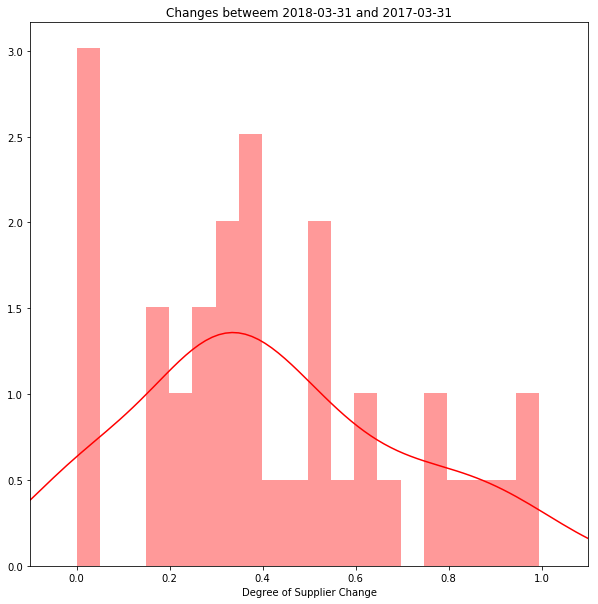

In [573]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes()
sns.distplot(df_DSC['180331vs170331'],bins=20,color='r',axlabel='Degree of Supplier Change',ax=ax)
ax.set_xlim(-0.1,1.1)
plt.title('Changes betweem 2018-03-31 and 2017-03-31')

In [531]:
#Firm DSC Count
all_date = set(df_Suppliers['As Of Date Bloomberg'])
all_manu = set(df_Suppliers['Central Ticker'])
all_supp = set(df_Suppliers['Supplier Ticker'])
df_date_mat_c = pd.pivot_table(df_Suppliers,index=['As Of Date Bloomberg','Supplier Ticker'],columns=['Central Ticker'],
                      values=['Supplier Company'],aggfunc={'Supplier Company':lambda x :len(x.unique())})
df_date_mat_c.columns = df_date_mat_c.columns.droplevel(0)
df_date_mat_c = df_date_mat_c.reset_index()

In [532]:
df_date_mat_c

Central Ticker  As Of Date Bloomberg      Supplier Ticker  000572 CH Equity  \
0                           20170331     000120 KS Equity               NaN   
1                           20170331     000559 CH Equity               1.0   
2                           20170331     000599 CH Equity               NaN   
3                           20170331     000629 CH Equity               NaN   
4                           20170331     000678 CH Equity               NaN   
5                           20170331     000710 CH Equity               1.0   
6                           20170331     000760 CH Equity               NaN   
7                           20170331     000800 CH Equity               NaN   
8                           20170331     000821 CH Equity               NaN   
9                           20170331     000868 CH Equity               NaN   
10                          20170331     000901 CH Equity               NaN   
11                          20170331     000903 CH Equity               NaN   
12                          20170331     000927 CH Equity               NaN   
13                          20170331     000959 CH Equity               NaN   
14                          20170331     002009 CH Equity               NaN   
15                          20170331     002013 CH Equity               NaN   
16                          20170331     002048 CH Equity               NaN   
17                          20170331     002079 CH Equity               NaN   
18                          20170331     002143 CH Equity               NaN   
19                          20170331     002217 CH Equity               NaN   
20                          20170331     002232 CH Equity               NaN   
21                          20170331     002265 CH Equity               NaN   
22                          20170331     002341 CH Equity               NaN   
23                          20170331     002342 CH Equity               NaN   
24                          20170331     002400 CH Equity               NaN   
25                          20170331     002454 CH Equity               NaN   
26                          20170331     002456 CH Equity               NaN   
27                          20170331     002590 CH Equity               NaN   
28                          20170331     002703 CH Equity               NaN   
29                          20170331     002708 CH Equity               NaN   
...                              ...                  ...               ...   
4960                        20190331       TWTR US Equity               NaN   
4961                        20190331        TXT US Equity               NaN   
4962                        20190331       UFAB US Equity               NaN   
4963                        20190331        UFI US Equity               NaN   
4964                        20190331        ULH US Equity               NaN   
4965                        20190331        UNW PW Equity               NaN   
4966                        20190331       USAP US Equity               NaN   
4967                        20190331         VC US Equity               NaN   
4968                        20190331        VHI US Equity               NaN   
4969                        20190331         VK FP Equity               NaN   
4970                        20190331        VLX LN Equity               NaN   
4971                        20190331        VNE US Equity               NaN   
4972                        20190331        VOE AV Equity               NaN   
4973                        20190331       VSVS LN Equity               NaN   
4974                        20190331        WBC US Equity               NaN   
4975                        20190331        WOR US Equity               NaN   
4976                        20190331  Weifang Q... Equity               NaN   
4977                        20190331          X US Equity               NaN   
4978                        20190331       XONE US

In [533]:
df_dict_c = {}
df_mat_c = {}
for d in all_date:
    df_dict_c[d] = df_date_mat_c[df_date_mat_c['As Of Date Bloomberg']==d]
    df_dict_c[d] = df_dict_c[d].set_index('Supplier Ticker')
    df_mat_c[d] = pd.DataFrame(index=all_supp,columns=all_manu)
    for i in all_supp:
        for j in all_manu:
            try:
                df_mat_c[d].loc[i,j]=df_dict_c[d].loc[i,j]
            except:
                df_mat_c[d].loc[i,j]=0

In [534]:
df_mat_c1 = df_mat_c.copy()
for d in all_date:
    for i in all_manu:
        if df_mat_c[d][i].sum(axis=0) == 0:
            df_mat_c1[d][i] = 0
        else: 
            df_mat_c1[d][i] = df_mat_c[d][i]/df_mat_c[d][i].sum(axis=0)

In [535]:
all_date_1 = [20170331,20171231,20180331,20180630,20180930,20181231,20190331]
df_DSC_cnt = pd.DataFrame(columns=['Central Ticker','End Date'])
Central_Ticker = []
Ref_Date = []
for i in all_date_1:
    period = []
    for k in df_mat_c1[i].columns:
        Central_Ticker.append(k)
        Ref_Date.append(i)
    for j in all_date_1:
        for a in np.sum(np.abs(df_mat_c1[j]-df_mat_c1[i])).values:
            period.append(a)
    df_DSC_cnt[i]=period
df_DSC_cnt['Central Ticker']=Central_Ticker
df_DSC_cnt['End Date']=Ref_Date
df_DSC_cnt.head()

Central Ticker  End Date  20170331  20171231  20180331  20180630  \
0     NIO US Equity  20170331       0.0  0.000000  0.000000  0.000000   
1  600104 CH Equity  20170331       0.0  0.140120  0.124382  0.248413   
2  200550 CH Equity  20170331       0.0  0.159387  0.093023  0.638410   
3  000980 CH Equity  20170331       0.0  0.603175  0.603175  0.861111   
4     175 HK Equity  20170331       0.0  0.110524  0.217487  0.245367   

   20180930  20181231  20190331  
0  1.000000  1.000000  1.000000  
1  0.236047  0.311905  0.344002  
2  0.599718  0.693923  0.665698  
3  0.888889  0.888889  0.900000  
4  0.278259  0.332746  0.418014

In [580]:
df_mat_c1

{20180321:                               CN          US
 AXL US Equity         0.00218341  0.00289017
 0389232D CH Equity    0.00218341         NaN
 Yituo Luo... Equity   0.00218341         NaN
 Beijing P... Equity   0.00218341         NaN
 000120 KS Equity             NaN  0.00289017
 SMP US Equity                NaN  0.00289017
 ADNT US Equity        0.00218341  0.00289017
 CEBYAZ CH Equity      0.00218341         NaN
 ZHAMCZ CH Equity      0.00218341         NaN
 6161 JP Equity        0.00218341  0.00289017
 900920 CH Equity      0.00218341         NaN
 SABIC AB Equity              NaN  0.00289017
 Adient Au... Equity            0           0
 AOSL US Equity        0.00218341         NaN
 GRMN US Equity               NaN  0.00289017
 0180583D CH Equity    0.00218341         NaN
 5406 JP Equity               NaN  0.00289017
 AJAGZ CH Equity       0.00218341         NaN
 KAMAEZ CH Equity               0           0
 204320 KS Equity      0.00218341  0.00289017
 EO FP Equity          0

In [571]:
df_DSC_20171231 = pd.DataFrame(np.sum(np.abs(df_mat_c1[20171231]-df_mat_c1[20170331]))/(np.sum(df_mat_c1[20171231])+np.sum(df_mat_c1[20170331])),columns=["20171231"])
df_DSC_20180331 = pd.DataFrame(np.sum(np.abs(df_mat_c1[20180331]-df_mat_c1[20171231]))/(np.sum(df_mat_c1[20180331])+np.sum(df_mat_c1[20171231])),columns=["20180331"])
df_DSC_20180630 = pd.DataFrame(np.sum(np.abs(df_mat_c1[20180630]-df_mat_c1[20180331]))/(np.sum(df_mat_c1[20180630])+np.sum(df_mat_c1[20180331])),columns=["20180630"])
df_DSC_20180930 = pd.DataFrame(np.sum(np.abs(df_mat_c1[20180930]-df_mat_c1[20180630]))/(np.sum(df_mat_c1[20180930])+np.sum(df_mat_c1[20180630])),columns=["20180930"])
df_DSC_20181231 = pd.DataFrame(np.sum(np.abs(df_mat_c1[20181231]-df_mat_c1[20180930]))/(np.sum(df_mat_c1[20181231])+np.sum(df_mat_c1[20180930])),columns=["20181231"])
df_DSC_20190331 = pd.DataFrame(np.sum(np.abs(df_mat_c1[20190331]-df_mat_c1[20181231]))/(np.sum(df_mat_c1[20190331])+np.sum(df_mat_c1[20181231])),columns=["20190331"])
df_DSC_180331_170331 = pd.DataFrame(np.sum(np.abs(df_mat[20181231]-df_mat[20171231]))/(np.sum(df_mat[20171231])+np.sum(df_mat[20181231])),columns=["20181231"])
df_DSC_190331_180331 = pd.DataFrame(np.sum(np.abs(df_mat[20190331]-df_mat[20180331]))/(np.sum(df_mat[20190331])+np.sum(df_mat[20180331])),columns=["20190331"])

df_DSC = pd.merge(pd.merge(df_DSC_20180331,df_DSC_20180630,left_index=True, right_index=True),df_DSC_20180930,left_index=True, right_index=True)
df_DSC = pd.merge(df_DSC,df_DSC_20181231,left_index=True, right_index=True)
df_DSC = pd.merge(df_DSC,df_DSC_20190331,left_index=True, right_index=True)
df_DSC = pd.merge(df_DSC,df_DSC_20171231,left_index=True, right_index=True)
df_DSC.reset_index(inplace = True)
df_DSC_new = pd.merge(df_DSC_180331_170331,df_DSC_190331_180331,left_index=True, right_index=True)
df_DSC_new.reset_index(inplace = True)

In [574]:
df_DSC_real = pd.melt(df_DSC, id_vars=["index"], 
                  var_name="As Of Date Bloomberg", value_name="DSC")
df_DSC_real

index As Of Date Bloomberg       DSC
0     CN             20180331  0.054933
1     US             20180331  0.068534
2     CN             20180630  0.290557
3     US             20180630  0.065982
4     CN             20180930  0.043016
5     US             20180930  0.041033
6     CN             20181231  0.070627
7     US             20181231  0.029231
8     CN             20190331  0.061207
9     US             20190331  0.044054
10    CN             20171231  0.149592
11    US             20171231  0.150571

[Text(0, 0, '2017Q4'),
 Text(0, 0, '2018Q1'),
 Text(0, 0, '2018Q2'),
 Text(0, 0, '2018Q3'),
 Text(0, 0, '2018Q4'),
 Text(0, 0, '2019Q1')]

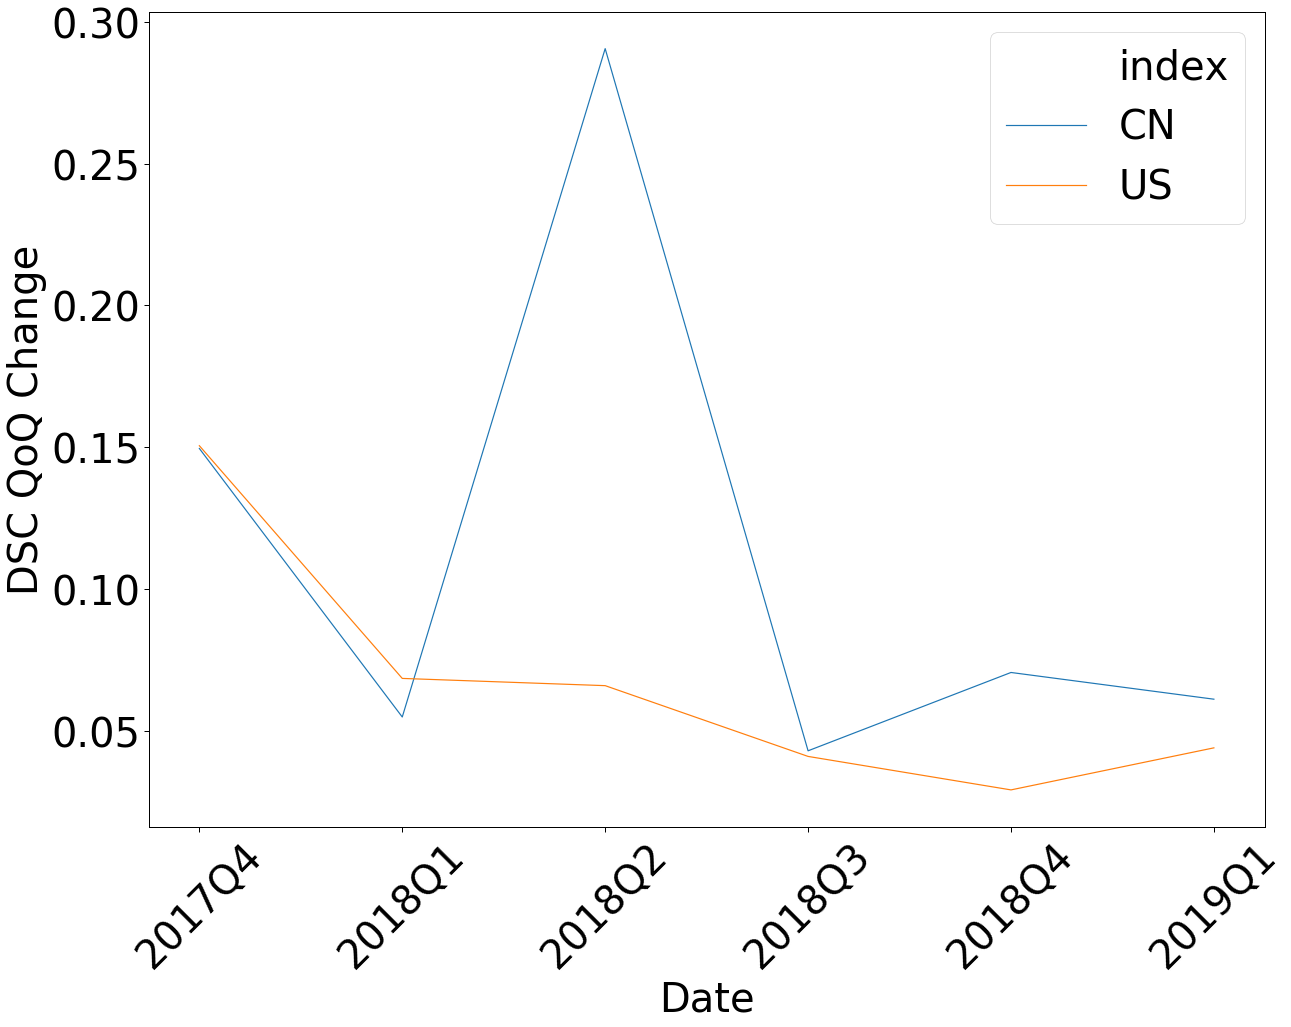

In [615]:
fig = plt.figure(figsize=(20,15))

b = sns.lineplot('As Of Date Bloomberg','DSC',data= df_DSC_real,hue='index')
b.set_xlabel("Date", fontsize=40)
b.set_ylabel("DSC QoQ Change", fontsize=40)
b.tick_params(labelsize=40)
plt.legend(fontsize=40)
b.set_xticklabels(["2017Q4","2018Q1","2018Q2","2018Q3","2018Q4","2019Q1"],rotation=45)

In [561]:
df_date_mat_c = pd.pivot_table(df_Suppliers,index=['As Of Date Bloomberg','Supplier Ticker'],columns=['Central Country'],
                      values=['Supplier Company'],aggfunc={'Supplier Company':lambda x :len(x.unique())})
df_date_mat_c.columns = df_date_mat_c.columns.droplevel(0)
df_date_mat_c = df_date_mat_c.reset_index()

In [562]:
df_dict_c = {}
df_mat_c = {}
for d in all_date:
    df_dict_c[d] = df_date_mat_c[df_date_mat_c['As Of Date Bloomberg']==d]
    df_dict_c[d] = df_dict_c[d].set_index('Supplier Ticker')
    df_mat_c[d] = pd.DataFrame(index=all_supp,columns=["CN","US"])
    for i in all_supp:
        for j in ["CN","US"]:
            try:
                df_mat_c[d].loc[i,j]=df_dict_c[d].loc[i,j]
            except:
                df_mat_c[d].loc[i,j]=0

In [563]:
df_mat_c1 = df_mat_c.copy()
for d in all_date:
    for i in ["CN","US"]:
        if df_mat_c[d][i].sum(axis=0) == 0:
            df_mat_c1[d][i] = 0
        else: 
            df_mat_c1[d][i] = df_mat_c[d][i]/df_mat_c[d][i].sum(axis=0)

In [564]:
df_mat_c1[20180331].fill

CN          US
AXL US Equity         0.00224215  0.00293255
0389232D CH Equity    0.00224215         NaN
Yituo Luo... Equity   0.00224215         NaN
Beijing P... Equity   0.00224215         NaN
000120 KS Equity             NaN  0.00293255
SMP US Equity                NaN  0.00293255
ADNT US Equity        0.00224215  0.00293255
CEBYAZ CH Equity      0.00224215         NaN
ZHAMCZ CH Equity               0           0
6161 JP Equity        0.00224215  0.00293255
900920 CH Equity      0.00224215         NaN
SABIC AB Equity              NaN  0.00293255
Adient Au... Equity            0           0
AOSL US Equity        0.00224215         NaN
GRMN US Equity               NaN  0.00293255
0180583D CH Equity    0.00224215         NaN
5406 JP Equity               NaN  0.00293255
AJAGZ CH Equity       0.00224215         NaN
KAMAEZ CH Equity               0           0
204320 KS Equity      0.00224215  0.00293255
EO FP Equity          0.00224215  0.00293255
Chongqing7... Equity  0.00224215         NaN
002863 CH Equity      0.00224215         NaN
0275657D CH Equity    0.00224215         NaN
200625 CH Equity      0.00224215         NaN
TKA GR Equity         0.00224215  0.00293255
SLTIAZ CH Equity      0.00224215         NaN
ALV US Equity         0.00224215  0.00293255
BUR FP Equity                NaN  0.00293255
ZBCEAZ CH Equity               0           0
...                          ...         ...
Faw Lujie... Equity   0.00224215         NaN
JMAT LN Equity        0.00224215         NaN
1074506D CH Equity    0.00224215         NaN
051910 KS Equity             NaN  0.00293255
AKA FP Equity                  0           0
MT NA Equity          0.00224215  0.00293255
7968166Z CH Equity    0.00224215         NaN
002143 CH Equity               0           0
1497090D CH Equity    0.00224215         NaN
SWKS US Equity                 0           0
AKE FP Equity                NaN  0.00293255
0174784D CH Equity    0.00224215         NaN
SSYS US Equity               NaN  0.00293255
6282 TT Equity               NaN  0.00293255
002454 CH Equity      0.00224215         NaN
AASFQZ CH Equity               0           0
0609553D CH Equity             0           0
Chongqing4... Equity  0.00224215         NaN
600710 CH Equity      0.00224215         NaN
300151 CH Equity      0.00224215         NaN
0180742D CH Equity    0.00224215         NaN
002635 CH Equity               0           0
EMC US Equity                  0           0
603906 CH Equity               0           0
0466363D CH Equity    0.00224215         NaN
Jiangxi B... Equity   0.00224215         NaN
0350500D CH Equity    0.00224215         NaN
GE US Equity                   0           0
6501 JP Equity               NaN  0.00293255
601933 CH Equity      0.00224215         NaN

[887 rows x 2 columns]

In [576]:
df_DSC_cnt_180321 = pd.DataFrame(np.sum(np.abs(df_mat_c1[20180331]-df_mat_c1[20180321])),columns=["180331vs180321"])
df_DSC_cnt_171231 = pd.DataFrame(np.sum(np.abs(df_mat_c1[20180331]-df_mat_c1[20171231])),columns=["180331vs171231"])
df_DSC_cnt_171231a = pd.DataFrame(np.sum(np.abs(df_mat_c1[20180321]-df_mat_c1[20171231])),columns=["180321vs171231"])
df_DSC_cnt_170331 = pd.DataFrame(np.sum(np.abs(df_mat_c1[20180331]-df_mat_c1[20170331])),columns=["180331vs170331"])
df_DSC_cnt_03211231 = pd.DataFrame(np.sum(np.abs(df_mat_c1[20180321]-df_mat_c1[20171231])),columns=["180321vs170331"])

df_DSC_cnt = pd.merge(pd.merge(df_DSC_cnt_180321,df_DSC_cnt_171231,left_index=True, right_index=True),df_DSC_cnt_171231a,left_index=True, right_index=True)
df_DSC_cnt = pd.merge(df_DSC_cnt,df_DSC_cnt_170331,left_index=True, right_index=True)
df_DSC_cnt

180331vs180321  180331vs171231  180321vs171231  \
600104 CH Equity               1             109             108   
FUV US Equity                  0               0               0   
600166 CH Equity               1              82              81   
600733 CH Equity               0               2               2   
600877 CH Equity               3              19              16   
NIO US Equity                  0               0               0   
601777 CH Equity               1               4               3   
600609 CH Equity               1              12              13   
476 HK Equity                  0               0               0   
1211 HK Equity                 1              81              82   
1188 HK Equity                 0               0               0   
HOG US Equity                  2              59              61   
000980 CH Equity               0              13              13   
601127 CH Equity               0               5               5   
1958 HK Equity                 2              37              39   
175 HK Equity                  2             142             142   
600099 CH Equity               0               9               9   
200054 CH Equity               0              15              15   
2238 HK Equity                 1              52              51   
GM US Equity                   8             533             539   
000572 CH Equity               0              11              11   
WGO US Equity                  0               6               6   
603766 CH Equity               0               6               6   
2333 HK Equity                 2              81              83   
600418 CH Equity               1              61              62   
600006 CH Equity               4              94              92   
ZAAP US Equity                 0               2               2   
1122 HK Equity                 0               1               1   
000913 CH Equity               0               9               9   
000800 CH Equity               6             139             135   
F US Equity                    9             489             496   
489 HK Equity                  1              88              87   
601965 CH Equity               0               8               8   
600303 CH Equity               0               1               1   
603611 CH Equity               0               0               0   
TSLA US Equity                12             123             131   
000927 CH Equity               6              54              50   
THO US Equity                  0              14              14   
200625 CH Equity               0             103             103   
200550 CH Equity              29              49              76   

                  180331vs170331  
600104 CH Equity              16  
FUV US Equity                  0  
600166 CH Equity              16  
600733 CH Equity               4  
600877 CH Equity              11  
NIO US Equity                  0  
601777 CH Equity               4  
600609 CH Equity               6  
476 HK Equity                  0  
1211 HK Equity                31  
1188 HK Equity                 0  
HOG US Equity                 12  
000980 CH Equity               9  
601127 CH Equity               7  
1958 HK Equity                 8  
175 HK Equity                 30  
600099 CH Equity               3  
200054 CH Equity              10  
2238 HK Equity                 7  
GM US Equity                 105  
000572 CH Equity               2  
WGO US Equity                  1  
603766 CH Equity               3  
2333 HK Equity                18  
600418 CH Equity              21  
600006 CH Equity              13  
ZAAP US Equity                 0  
1122 HK Equity                 2  
000913 CH Equity              10  
000800 CH Equity              18  
F US Equity                   95  
489 HK Equity                 17  
601965 CH Equity               0  
600303 CH Equity               2  
6036

In [594]:
df_DSC_cnt['180331vs170331'].mean()

14.05

Text(0.5, 1.0, 'Changes betweem 2018-03-31 and 2017-03-31')

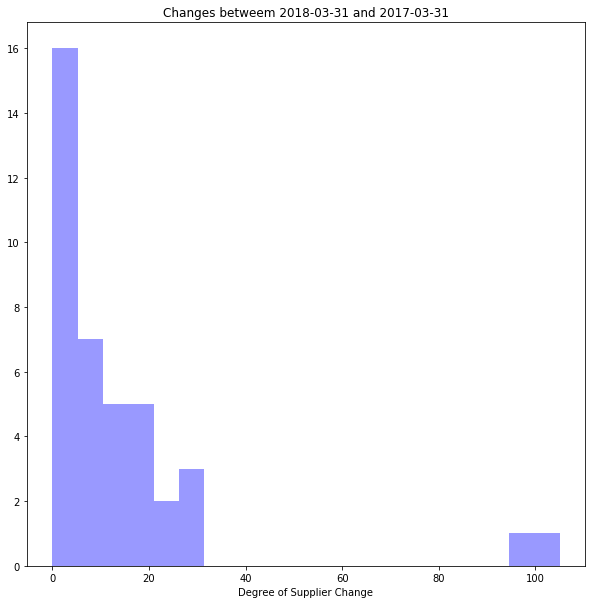

In [593]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes()
sns.distplot(df_DSC_cnt['180331vs170331'],bins=20,color='b',axlabel='Degree of Supplier Change',ax=ax,kde=False)
#ax.set_ylim(0,10)
plt.title('Changes betweem 2018-03-31 and 2017-03-31')

In [8]:
#CNUS Degree
df_country_supp = pd.pivot_table(df_Suppliers,index=['Central Ticker','As Of Date Bloomberg'],columns=['Supplier Country']
                      ,values=['Relationship Value USD'],aggfunc={'Relationship Value USD':np.sum})
df_country_supp.columns = df_country_supp.columns.droplevel(0)
df_country_supp.reset_index(inplace=True)
df_country_supp = df_country_supp[['Central Ticker','As Of Date Bloomberg','CN','US']].fillna(0)
df_cnus_degree = pd.merge(df_su_all_group,df_country_supp,how='left', left_on=['Central Ticker','As Of Date Bloomberg'],
                        right_on=['Central Ticker','As Of Date Bloomberg'])
df_cnus_degree['CN_Degree'] = df_cnus_degree['CN']/df_cnus_degree['Relationship Value USD']
df_cnus_degree['US_Degree'] = df_cnus_degree['US']/df_cnus_degree['Relationship Value USD']
df_cnus_degree_cn = pd.pivot_table(df_cnus_degree,index=['Central Ticker','Central Country'],columns=['As Of Date Bloomberg']
                      ,values=['CN_Degree'],aggfunc={'CN_Degree':np.sum})
df_cnus_degree_cn.columns = df_cnus_degree_cn.columns.droplevel(0)
df_cnus_degree_cn.reset_index(inplace=True)
df_cnus_degree_us = pd.pivot_table(df_cnus_degree,index=['Central Ticker','Central Country'],columns=['As Of Date Bloomberg']
                      ,values=['US_Degree'],aggfunc={'US_Degree':np.sum})
df_cnus_degree_us.columns = df_cnus_degree_us.columns.droplevel(0)
df_cnus_degree_us.reset_index(inplace=True)

/Users/Saik/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
/Users/Saik/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
/Users/Saik/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
/Users/Saik/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
/Users/Saik/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1

(-0.1, 1)

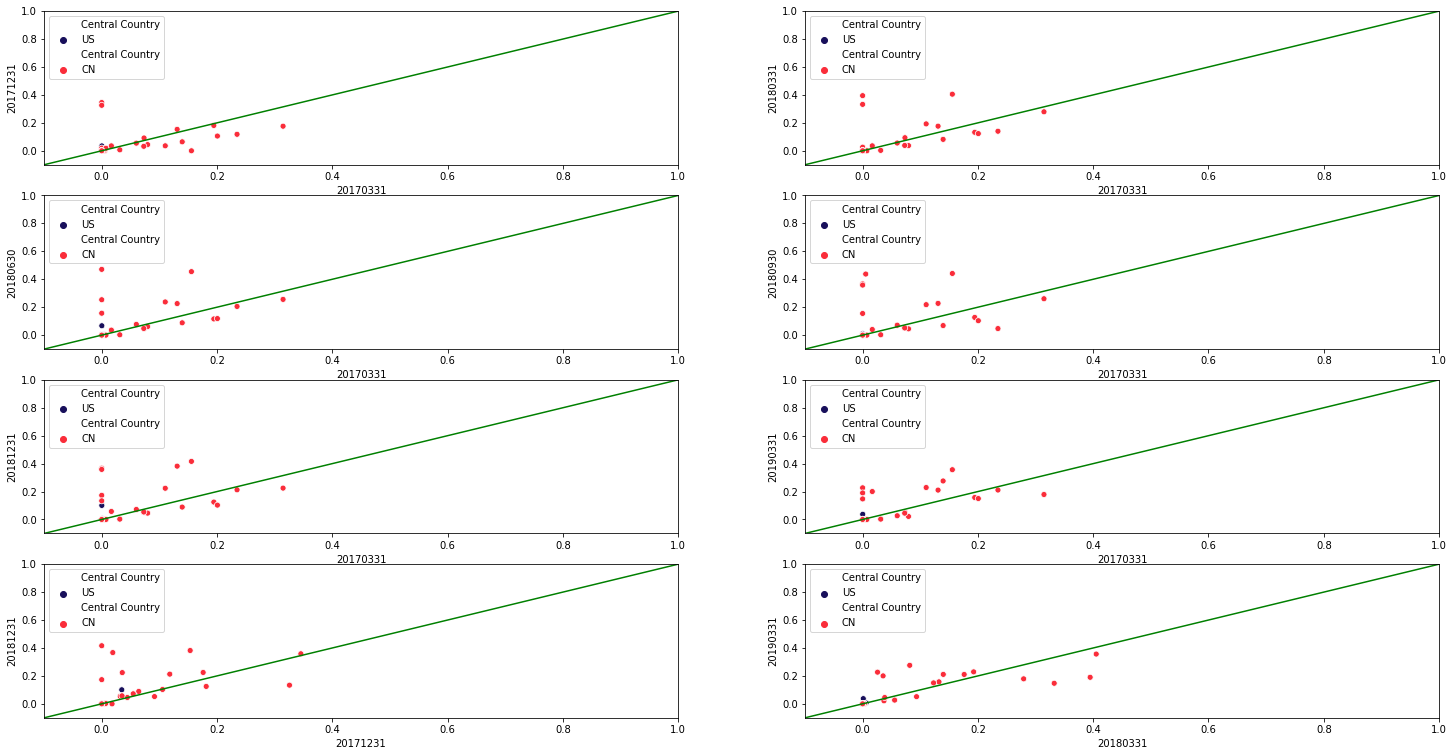

In [9]:
fig, ax = plt.subplots(4,2,figsize=(25,13))
sns.scatterplot(x=20170331, y=20171231, data=df_cnus_degree_cn[df_cnus_degree_cn['Central Country']=="US"],hue='Central Country',palette=["#180f5b"],ax=ax[0,0])
sns.scatterplot(x=20170331, y=20171231, data=df_cnus_degree_us[df_cnus_degree_us['Central Country']=="CN"],hue='Central Country',palette=["#fa2d3a"],ax=ax[0,0])
sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[0,0],c='g')
ax[0,0].set_xlim(-0.1,1)
ax[0,0].set_ylim(-0.1,1)
sns.scatterplot(x=20170331, y=20180331, data=df_cnus_degree_cn[df_cnus_degree_cn['Central Country']=="US"],hue='Central Country',palette=["#180f5b"],ax=ax[0,1])
sns.scatterplot(x=20170331, y=20180331, data=df_cnus_degree_us[df_cnus_degree_us['Central Country']=="CN"],hue='Central Country',palette=["#fa2d3a"],ax=ax[0,1])
sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[0,1],c='g')
ax[0,1].set_xlim(-0.1,1)
ax[0,1].set_ylim(-0.1,1)
sns.scatterplot(x=20170331, y=20180630, data=df_cnus_degree_cn[df_cnus_degree_cn['Central Country']=="US"],hue='Central Country',palette=["#180f5b"],ax=ax[1,0])
sns.scatterplot(x=20170331, y=20180630, data=df_cnus_degree_us[df_cnus_degree_us['Central Country']=="CN"],hue='Central Country',palette=["#fa2d3a"],ax=ax[1,0])
sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[1,0],c='g')
ax[1,0].set_xlim(-0.1,1)
ax[1,0].set_ylim(-0.1,1)
sns.scatterplot(x=20170331, y=20180930, data=df_cnus_degree_cn[df_cnus_degree_cn['Central Country']=="US"],hue='Central Country',palette=["#180f5b"],ax=ax[1,1])
sns.scatterplot(x=20170331, y=20180930, data=df_cnus_degree_us[df_cnus_degree_us['Central Country']=="CN"],hue='Central Country',palette=["#fa2d3a"],ax=ax[1,1])
sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[1,1],c='g')
ax[1,1].set_xlim(-0.1,1)
ax[1,1].set_ylim(-0.1,1)
sns.scatterplot(x=20170331, y=20181231, data=df_cnus_degree_cn[df_cnus_degree_cn['Central Country']=="US"],hue='Central Country',palette=["#180f5b"],ax=ax[2,0])
sns.scatterplot(x=20170331, y=20181231, data=df_cnus_degree_us[df_cnus_degree_us['Central Country']=="CN"],hue='Central Country',palette=["#fa2d3a"],ax=ax[2,0])
sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[2,0],c='g')
ax[2,0].set_xlim(-0.1,1)
ax[2,0].set_ylim(-0.1,1)
sns.scatterplot(x=20170331, y=20190331, data=df_cnus_degree_cn[df_cnus_degree_cn['Central Country']=="US"],hue='Central Country',palette=["#180f5b"],ax=ax[2,1])
sns.scatterplot(x=20170331, y=20190331, data=df_cnus_degree_us[df_cnus_degree_us['Central Country']=="CN"],hue='Central Country',palette=["#fa2d3a"],ax=ax[2,1])
sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[2,1],c='g')
ax[2,1].set_xlim(-0.1,1)
ax[2,1].set_ylim(-0.1,1)
sns.scatterplot(x=20171231, y=20181231, data=df_cnus_degree_cn[df_cnus_degree_cn['Central Country']=="US"],hue='Central Country',palette=["#180f5b"],ax=ax[3,0])
sns.scatterplot(x=20171231, y=20181231, data=df_cnus_degree_us[df_cnus_degree_us['Central Country']=="CN"],hue='Central Country',palette=["#fa2d3a"],ax=ax[3,0])
sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[3,0],c='g')
ax[3,0].set_xlim(-0.1,1)
ax[3,0].set_ylim(-0.1,1)
sns.scatterplot(x=20180331, y=20190331, data=df_cnus_degree_cn[df_cnus_degree_cn['Central Country']=="US"],hue='Central Country',palette=["#180f5b"],ax=ax[3,1])
sns.scatterplot(x=20180331, y=20190331, data=df_cnus_degree_us[df_cnus_degree_us['Central Country']=="CN"],hue='Central Country',palette=["#fa2d3a"],ax=ax[3,1])
sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[3,1],c='g')
ax[3,1].set_xlim(-0.1,1)
ax[3,1].set_ylim(-0.1,1)

In [334]:
#manipulate SOS data
df_SOS = pd.read_excel('Supply_Chain_Data_20190510.xlsx',sheet_name='SOS')
df_SOS["Relation"] = df_SOS["Central Country"] + "-" +df_SOS["Supplier Country"]
df_SOS_group = df_SOS.loc[(df_SOS["Relation"]=="CN-US")| (df_SOS["Relation"]=="US-CN")].groupby(['Central Ticker']).sum()
df_SOS_all_group = df_SOS.groupby(['Central Ticker']).sum()
df_SOS_group2 = df_SOS_all_group.join(df_SOS_group,on='Central Ticker',rsuffix='_exposure')
df_SOS_group2 = df_SOS_group2[['%Cost_exposure','Relationship Value USD','Relationship Value USD_exposure']]
df_SOS_group2['% of total relationship value'] = df_SOS_group2['Relationship Value USD_exposure']/df_SOS_group2['Relationship Value USD']
df_SOS_group2 = df_SOS_group2.fillna(0)
df_SOS_group2

%Cost_exposure  Relationship Value USD  \
Central Ticker                                             
000559 CH Equity          0.0013            4.655315e+07   
000599 CH Equity          0.0000            3.628150e+06   
000622 CH Equity          0.0000            4.641500e+05   
000629 CH Equity          0.0000            1.192599e+08   
000710 CH Equity          0.0090            1.930669e+05   
000880 CH Equity          0.0022            1.894004e+07   
000903 CH Equity          0.0000            8.977467e+07   
002009 CH Equity          0.0000            2.446440e+05   
002080 CH Equity          0.0000            8.449950e+06   
002151 CH Equity          0.0000            6.838000e+04   
002176 CH Equity          0.0000            2.273660e+05   
002232 CH Equity          0.0105            8.813967e+06   
002265 CH Equity          0.0000            7.700700e+05   
002306 CH Equity          0.0000            0.000000e+00   
002342 CH Equity          0.0000            3.710650e+06   
002400 CH Equity          0.0000            7.509508e+07   
002403 CH Equity          0.0000            1.826630e+06   
002456 CH Equity          0.0008            1.786205e+08   
002475 CH Equity          0.0004            3.142111e+07   
002635 CH Equity          0.0000            8.110400e+05   
002751 CH Equity          0.0000            1.786000e+04   
002850 CH Equity          0.0000            1.428000e+04   
005490 KS Equity          0.0000            2.261296e+09   
005850 KS Equity          0.0000            6.014000e+05   
005930 KS Equity          0.0000            1.922401e+10   
006400 KS Equity          0.0000            4.367928e+08   
007340 KS Equity          0.0000            5.251560e+06   
008350 KS Equity          0.0000            6.920950e+06   
008830 KS Equity          0.0000            1.913420e+06   
010950 KS Equity          0.0000            4.707330e+09   
...                          ...                     ...   
SWK US Equity             0.0597            1.333349e+08   
TATA IN Equity            0.0000            5.184345e+08   
TDC US Equity             0.0000            4.436590e+07   
TEN US Equity             0.0000            5.246892e+07   
THRM US Equity            0.0000            2.383500e+05   
TIFS LN Equity            0.0000            5.981560e+06   
TKA GR Equity             0.0000            3.431981e+08   
TKR US Equity             0.0000            3.759502e+07   
TMST US Equity            0.0000            2.783000e+05   
TOASO TI Equity           0.0000            3.050563e+08   
TOWR US Equity            0.0000            8.091550e+06   
TRELB SS Equity           0.0000            1.831770e+06   
TSHUNZ CH Equity          0.0000            1.326764e+07   
TTMI US Equity            0.0066            8.614090e+06   
TWTR US Equity            0.0000            4.680450e+06   
TXT US Equity             0.0000            4.921824e+08   
ULH US Equity             0.0000            1.471000e+04   
UNW PW Equity             0.0000            2.626300e+06   
USAP US Equity            0.0000            1.340000e+06   
VC US Equity              0.0065            9.558062e+07   
VHI US Equity             0.0000            8.980000e+06   
VK FP Equity              0.0000            1.578987e+08   
VNE US Equity             0.0000            4.474180e+06   
VSVS LN Equity            0.0000            3.520420e+06   
WBC US Equity             0.0002            2.390617e+07   
WOR US Equity             0.0000            2.226493e+08   
X US Equity               0.0000            2.530766e+08   
XPO US Equity             0.0000            5.208630e+06   
YZAKBZ CH Equity          0.0000            2.003200e+05   
ZBRA US Equity            0.0000            1.221571e+08   

                  Relationship Value USD_exposure  \
Central Ticker                                      
000559 CH Equity                     4.663308e+05   
000599 CH Equity                     0.000000e+00   
000622 CH Equity         

In [335]:
df_sup_with_sup_score = df_Suppliers.join(df_SOS_group2[['%Cost_exposure','% of total relationship value']],on='Supplier Ticker',rsuffix='_supplier_score')
df_sup_with_sup_score = df_sup_with_sup_score.join(df_su_all_group,on='Central Ticker',rsuffix='_total')
df_sup_with_sup_score['Indirect Score_RV'] = df_sup_with_sup_score['Relationship Value USD']*df_sup_with_sup_score['% of total relationship value']/df_sup_with_sup_score['Relationship Value USD_total']
df_sup_with_sup_score['Indirect Score_%C'] = df_sup_with_sup_score['%Cost']*df_sup_with_sup_score['%Cost_exposure']
df_indirect_score = df_sup_with_sup_score.groupby(['Central Ticker']).sum()
df_indirect_score = df_indirect_score[['Indirect Score_RV','Indirect Score_%C']]

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

In [ ]:
df_all_score = df_su_group2.join(df_indirect_score,on='Central Ticker')
df_all_score['Total_RV'] = df_all_score['% of total relationship value']+df_all_score['Indirect Score_RV']
df_all_score['Total_%C'] = df_all_score['%Cost_Exposure']+df_all_score['Indirect Score_%C']

In [336]:
df_su_group2

Central Ticker As Of Date Bloomberg  %Cost_total Central Country  \
0    000572 CH Equity           2017-03-31       0.0707              CN   
1    000572 CH Equity           2017-12-31       0.0670              CN   
2    000572 CH Equity           2018-03-21       0.0252              CN   
3    000572 CH Equity           2018-03-31       0.0690              CN   
4    000572 CH Equity           2018-06-30       0.0186              CN   
5    000572 CH Equity           2018-09-30       0.0252              CN   
6    000572 CH Equity           2018-12-31       0.0186              CN   
7    000572 CH Equity           2019-03-31       0.0222              CN   
8    000800 CH Equity           2017-03-31       0.8544              CN   
9    000800 CH Equity           2017-12-31       1.2736              CN   
10   000800 CH Equity           2018-03-21       0.7072              CN   
11   000800 CH Equity           2018-03-31       1.3704              CN   
12   000800 CH Equity           2018-06-30       0.8766              CN   
13   000800 CH Equity           2018-09-30       0.6847              CN   
14   000800 CH Equity           2018-12-31       0.6369              CN   
15   000800 CH Equity           2019-03-31       0.6243              CN   
16   000913 CH Equity           2017-03-31       0.0496              CN   
17   000913 CH Equity           2017-12-31       0.1112              CN   
18   000913 CH Equity           2018-03-21       0.1300              CN   
19   000913 CH Equity           2018-03-31       0.1190              CN   
20   000913 CH Equity           2018-06-30       0.1302              CN   
21   000913 CH Equity           2018-09-30       0.1369              CN   
22   000913 CH Equity           2018-12-31       0.1302              CN   
23   000913 CH Equity           2019-03-31       0.1369              CN   
24   000927 CH Equity           2017-03-31       0.5247              CN   
25   000927 CH Equity           2017-12-31       0.4075              CN   
26   000927 CH Equity           2018-03-21       0.3574              CN   
27   000927 CH Equity           2018-03-31       0.4499              CN   
28   000927 CH Equity           2018-06-30       0.3663              CN   
29   000927 CH Equity           2018-09-30       0.3684              CN   
..                ...                  ...          ...             ...   
262     HOG US Equity           2019-03-31       0.1618              US   
263     NIO US Equity           2018-03-21       0.0466              CN   
264     NIO US Equity           2018-09-30       0.0466              CN   
265     NIO US Equity           2018-12-31       0.0135              CN   
266     NIO US Equity           2019-03-31       0.0398              CN   
267     THO US Equity           2017-03-31       0.1508              US   
268     THO US Equity           2017-12-31       0.1618              US   
269     THO US Equity           2018-03-21       0.1309              US   
270     THO US Equity           2018-03-31       0.1543              US   
271     THO US Equity           2018-06-30       0.1484              US   
272     THO US Equity           2018-09-30       0.1309              US   
273     THO US Equity           2018-12-31       0.1484              US   
274     THO US Equity           2019-03-31       0.1437              US   
275    TSLA US Equity           2017-03-31       0.3962              US   
276    TSLA US Equity           2017-12-31       0.3565              US   
277    TSLA US Equity           2018-03-21       0.3340              US   
278    TSLA US Equity           2018-03-31       0.1179              US   
279    TSLA US Equity           2018-06-30       0.3069              US   
280    TSLA US Equity           2018-09-30       0.3340              US   
281    TSLA US Equity           2018-12-31       0.0754              US   
282    TSLA US Equity           2019-03-31       0.3047              US   
283     WGO US Equity           

In [639]:
#Impact scroe
df_impact_financial = pd.merge(df_su_group2,df_fin_q_manu[['Central Ticker','End Date', 'Revenue', 'Rev_deseaonality',
       'Rev_deseaonality_QoQ_1', 'Rev_deseaonality_QoQ_2',
       'Rev_deseaonality_QoQ3', 'Rev_deseaonality_QoQ_4',
       'Rev_deseaonality_QoQ_5']],how='left',left_on=['Central Ticker','As Of Date Bloomberg'],right_on=['Central Ticker','End Date'])
df_impact_financial = df_impact_financial.sort_values(by=['Central Ticker','End Date'])
df_impact_financial_cn = df_impact_financial[df_impact_financial['Central Country']=='CN']
df_impact_financial_us = df_impact_financial[df_impact_financial['Central Country']=='US']
df_impact_financial_us

Central Ticker As Of Date Bloomberg  Market_Cap_Central  %Cost_total  \
48   1188 HK Equity           2018-06-30        9.340064e+07       0.0479   
49   1188 HK Equity           2018-09-30        9.340064e+07       0.0479   
50   1188 HK Equity           2018-12-31        9.340064e+07       0.0479   
51   1188 HK Equity           2019-03-31        9.340064e+07       0.0479   
236     F US Equity           2017-03-31        4.153117e+10       0.7055   
237     F US Equity           2017-12-31        4.153117e+10       1.3894   
239     F US Equity           2018-03-31        4.153117e+10       1.3978   
240     F US Equity           2018-06-30        4.153117e+10       1.3412   
241     F US Equity           2018-09-30        4.153117e+10       1.3265   
242     F US Equity           2018-12-31        4.153117e+10       1.3049   
243     F US Equity           2019-03-31        4.153117e+10       1.2808   
238     F US Equity           2018-03-21        4.153117e+10       1.3971   
244   FUV US Equity           2019-03-31        6.012666e+07       0.0006   
245    GM US Equity           2017-03-31        5.503364e+10       0.6728   
246    GM US Equity           2017-12-31        5.503364e+10       0.7122   
248    GM US Equity           2018-03-31        5.503364e+10       1.0578   
249    GM US Equity           2018-06-30        5.503364e+10       1.0251   
250    GM US Equity           2018-09-30        5.503364e+10       0.9903   
251    GM US Equity           2018-12-31        5.503364e+10       1.0650   
252    GM US Equity           2019-03-31        5.503364e+10       1.0287   
247    GM US Equity           2018-03-21        5.503364e+10       1.0631   
253   HOG US Equity           2017-03-31        5.917209e+09       0.2499   
254   HOG US Equity           2017-12-31        5.917209e+09       0.2151   
256   HOG US Equity           2018-03-31        5.917209e+09       0.0995   
257   HOG US Equity           2018-06-30        5.917209e+09       0.0847   
258   HOG US Equity           2018-09-30        5.917209e+09       0.0935   
259   HOG US Equity           2018-12-31        5.917209e+09       0.1686   
260   HOG US Equity           2019-03-31        5.917209e+09       0.1618   
255   HOG US Equity           2018-03-21        5.917209e+09       0.2010   
264   THO US Equity           2017-03-31        3.638044e+09       0.1508   
265   THO US Equity           2017-12-31        3.638044e+09       0.1618   
266   THO US Equity           2018-03-21        3.638044e+09       0.1543   
267   THO US Equity           2018-03-31        3.638044e+09       0.1543   
268   THO US Equity           2018-06-30        3.638044e+09       0.1538   
269   THO US Equity           2018-09-30        3.638044e+09       0.1483   
270   THO US Equity           2018-12-31        3.638044e+09       0.1484   
271   THO US Equity           2019-03-31        3.638044e+09       0.1437   
272  TSLA US Equity           2017-03-31        4.508124e+10       0.3962   
273  TSLA US Equity           2017-12-31        4.508124e+10       0.3565   
275  TSLA US Equity           2018-03-31        4.508124e+10       0.1179   
276  TSLA US Equity           2018-06-30        4.508124e+10       0.0820   
277  TSLA US Equity           2018-09-30        4.508124e+10       0.0614   
278  TSLA US Equity           2018-12-31        4.508124e+10       0.0754   
279  TSLA US Equity           2019-03-31        4.508124e+10       0.3047   
274  TSLA US Equity           2018-03-21        4.508124e+10       0.3673   
280   WGO US Equity           2017-03-31        1.165932e+09       0.0032   
281   WGO US Equity           2017-12-31        1.165932e+09       0.0038   
282   WGO US Equity           2018-03-21        1.165932e+09       0.0041   
283   WGO US Equity           2018-03-31        1.165932e+09       0.0041   
284   WGO US Equity           2018-06-30        1.165932e+09       0.0037   
285   WGO US Equity           2018-09-30        1.165932e+09       0.0038   
2

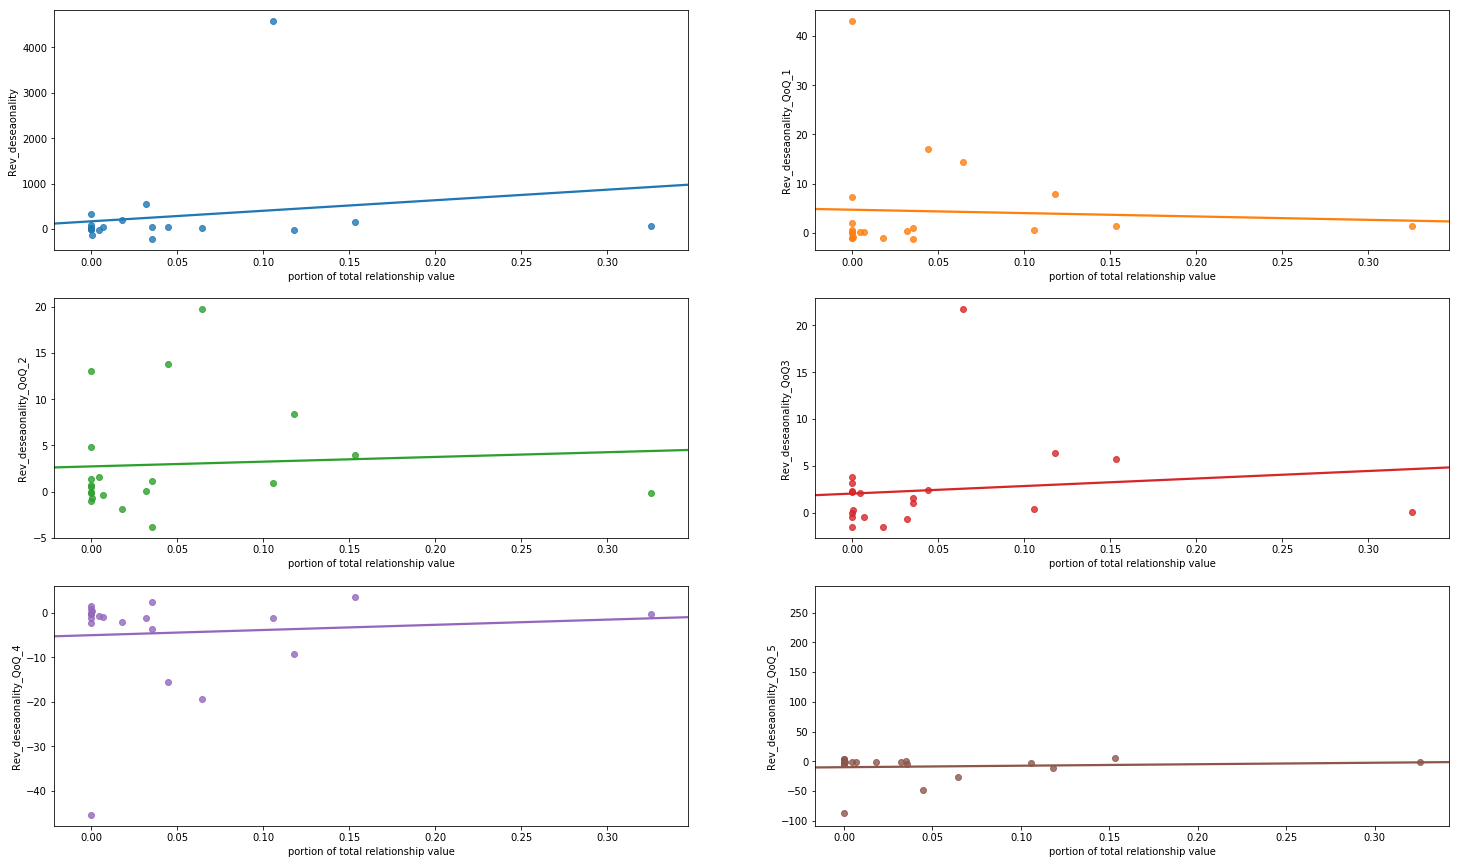

In [641]:
fig, ax = plt.subplots(3,2,figsize=(25,15))
sns.regplot(y='Rev_deseaonality', x='portion of total relationship value', data=df_impact_financial_cn[df_impact_financial_cn['As Of Date Bloomberg']=='2017-12-31'],ax=ax[0,0],ci=None)
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[0,0],c='g')
#ax[0,0].set_xlim(-1,1)
#ax[0,0].set_ylim(-1,1)
sns.regplot(y='Rev_deseaonality_QoQ_1', x='portion of total relationship value', data=df_impact_financial_cn[df_impact_financial_cn['As Of Date Bloomberg']=='2017-12-31'],ci=None,ax=ax[0,1])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[0,1],c='g')
#ax[0,1].set_xlim(-1,1)
#ax[0,1].set_ylim(-1,1)
sns.regplot(y='Rev_deseaonality_QoQ_2', x='portion of total relationship value', data=df_impact_financial_cn[df_impact_financial_cn['As Of Date Bloomberg']=='2017-12-31'],ci=None,ax=ax[1,0])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[1,0],c='g')
#ax[1,0].set_xlim(-1,1)
#ax[1,0].set_ylim(-1,1)
sns.regplot(y='Rev_deseaonality_QoQ3', x='portion of total relationship value', data=df_impact_financial_cn[df_impact_financial_cn['As Of Date Bloomberg']=='2017-12-31'],ci=None,ax=ax[1,1])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[1,1],c='g')
#ax[1,1].set_xlim(-1,1)
#ax[1,1].set_ylim(-1,1)
sns.regplot(y='Rev_deseaonality_QoQ_4', x='portion of total relationship value', data=df_impact_financial_cn[df_impact_financial_cn['As Of Date Bloomberg']=='2017-12-31'],ci=None,ax=ax[2,0])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[2,0],c='g')
#ax[2,0].set_xlim(-1,1)
#ax[2,0].set_ylim(-1,1)
sns.regplot(y='Rev_deseaonality_QoQ_5', x='portion of total relationship value', data=df_impact_financial_cn[df_impact_financial_cn['As Of Date Bloomberg']=='2017-12-31'],ci=None,ax=ax[2,1])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[2,1],c='g')
#ax[2,1].set_xlim(-1,1)
#ax[2,1].set_ylim(-1,1)

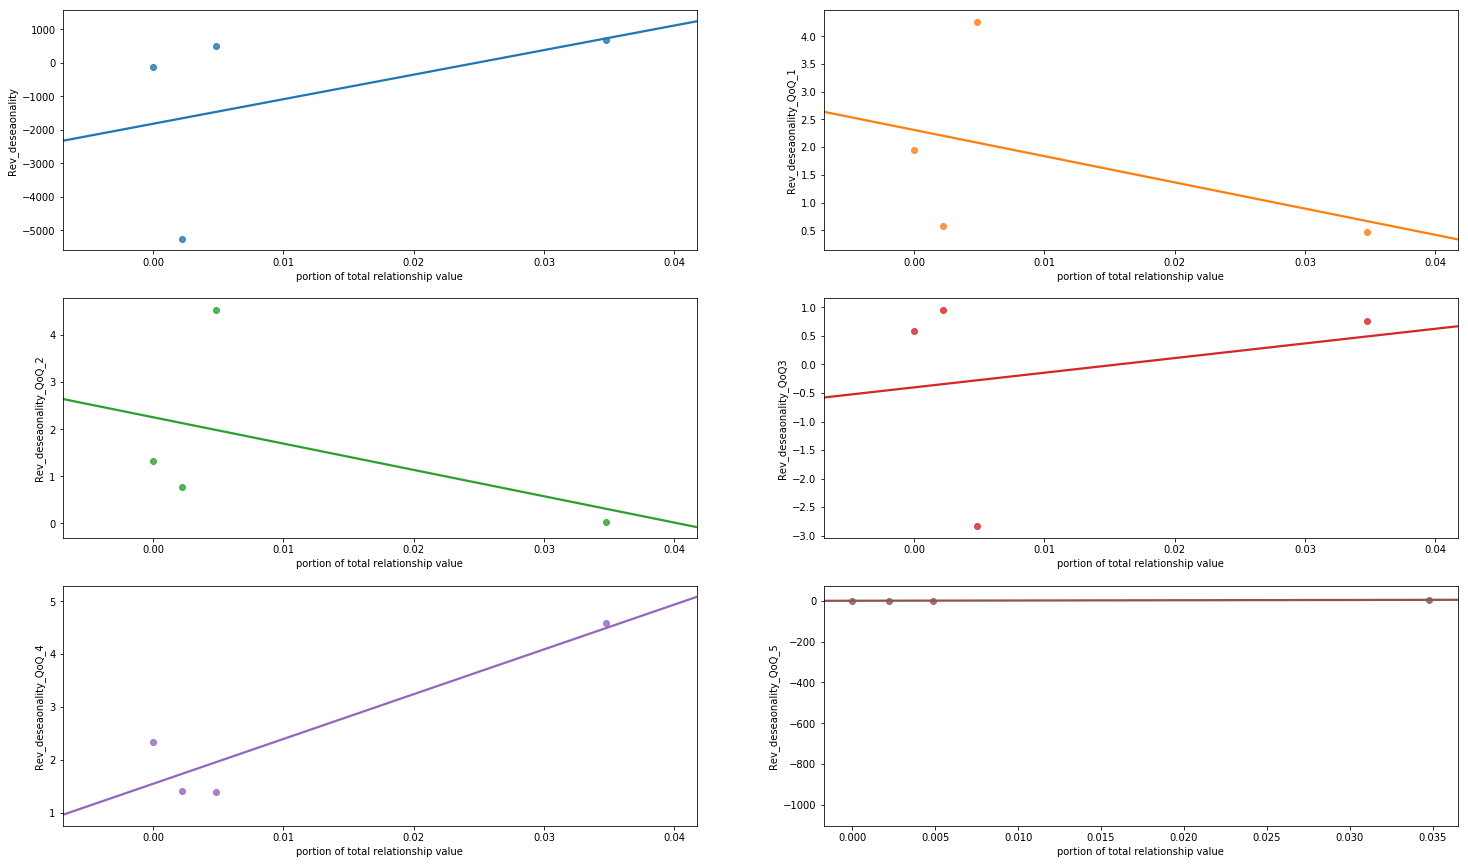

In [643]:
fig, ax = plt.subplots(3,2,figsize=(25,15))
sns.regplot(y='Rev_deseaonality', x='portion of total relationship value', data=df_impact_financial_us[df_impact_financial_us['As Of Date Bloomberg']=='2017-12-31'],ax=ax[0,0],ci=None)
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[0,0],c='g')
#ax[0,0].set_xlim(-1,1)
#ax[0,0].set_ylim(-1,1)
sns.regplot(y='Rev_deseaonality_QoQ_1', x='portion of total relationship value', data=df_impact_financial_us[df_impact_financial_us['As Of Date Bloomberg']=='2017-12-31'],ci=None,ax=ax[0,1])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[0,1],c='g')
#ax[0,1].set_xlim(-1,1)
#ax[0,1].set_ylim(-1,1)
sns.regplot(y='Rev_deseaonality_QoQ_2', x='portion of total relationship value', data=df_impact_financial_us[df_impact_financial_us['As Of Date Bloomberg']=='2017-12-31'],ci=None,ax=ax[1,0])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[1,0],c='g')
#ax[1,0].set_xlim(-1,1)
#ax[1,0].set_ylim(-1,1)
sns.regplot(y='Rev_deseaonality_QoQ3', x='portion of total relationship value', data=df_impact_financial_us[df_impact_financial_us['As Of Date Bloomberg']=='2017-12-31'],ci=None,ax=ax[1,1])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[1,1],c='g')
#ax[1,1].set_xlim(-1,1)
#ax[1,1].set_ylim(-1,1)
sns.regplot(y='Rev_deseaonality_QoQ_4', x='portion of total relationship value', data=df_impact_financial_us[df_impact_financial_us['As Of Date Bloomberg']=='2017-12-31'],ci=None,ax=ax[2,0])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[2,0],c='g')
#ax[2,0].set_xlim(-1,1)
#ax[2,0].set_ylim(-1,1)
sns.regplot(y='Rev_deseaonality_QoQ_5', x='portion of total relationship value', data=df_impact_financial_us[df_impact_financial_us['As Of Date Bloomberg']=='2017-12-31'],ci=None,ax=ax[2,1])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[2,1],c='g')
#ax[2,1].set_xlim(-1,1)
#ax[2,1].set_ylim(-1,1)

Text(0.5, 1.0, 'Deseasonal Quater Revenue Vs 2018/3/31 exposure score')

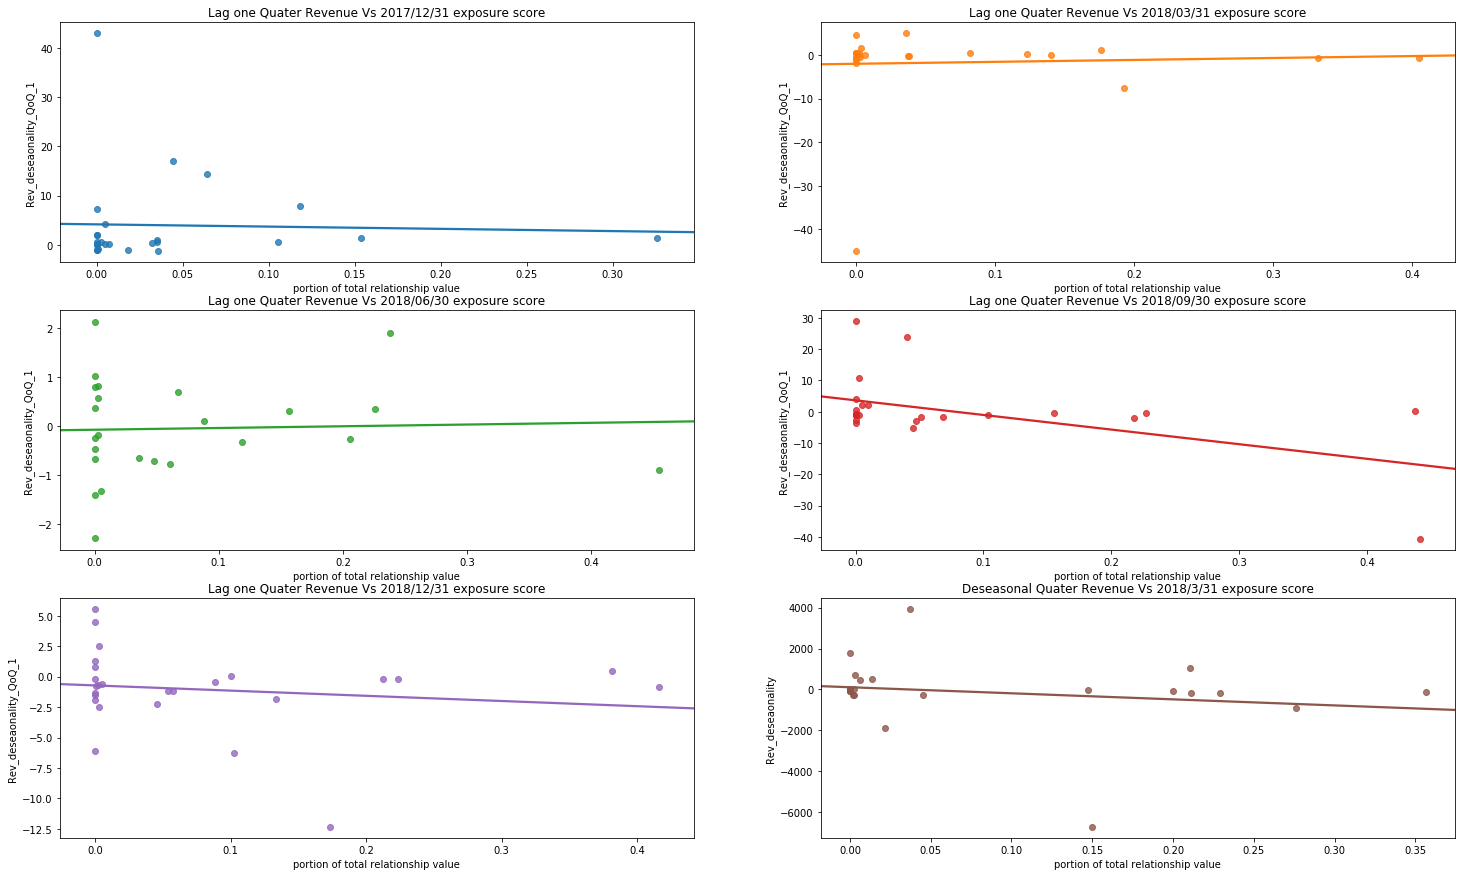

In [634]:
fig, ax = plt.subplots(3,2,figsize=(25,15))
sns.regplot(y='Rev_deseaonality_QoQ_1', x='portion of total relationship value', data=df_impact_financial[df_impact_financial['As Of Date Bloomberg']=='2017-12-31'],ax=ax[0,0],ci=None)
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[0,0],c='g')
ax[0,0].set_title('Lag one Quater Revenue Vs 2017/12/31 exposure score')
#ax[0,0].set_ylim(-1,1)
sns.regplot(y='Rev_deseaonality_QoQ_1', x='portion of total relationship value', data=df_impact_financial[df_impact_financial['As Of Date Bloomberg']=='2018-03-31'],ci=None,ax=ax[0,1])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[0,1],c='g')
#ax[0,1].set_xlim(-1,1)
ax[0,1].set_title('Lag one Quater Revenue Vs 2018/03/31 exposure score')
sns.regplot(y='Rev_deseaonality_QoQ_1', x='portion of total relationship value', data=df_impact_financial[df_impact_financial['As Of Date Bloomberg']=='2018-06-30'],ci=None,ax=ax[1,0])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[1,0],c='g')
#ax[1,0].set_xlim(-1,1)
ax[1,0].set_title('Lag one Quater Revenue Vs 2018/06/30 exposure score')
sns.regplot(y='Rev_deseaonality_QoQ_1', x='portion of total relationship value', data=df_impact_financial[df_impact_financial['As Of Date Bloomberg']=='2018-09-30'],ci=None,ax=ax[1,1])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[1,1],c='g')
#ax[1,1].set_xlim(-1,1)
ax[1,1].set_title('Lag one Quater Revenue Vs 2018/09/30 exposure score')
sns.regplot(y='Rev_deseaonality_QoQ_1', x='portion of total relationship value', data=df_impact_financial[df_impact_financial['As Of Date Bloomberg']=='2018-12-31'],ci=None,ax=ax[2,0])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[2,0],c='g')
#ax[2,0].set_xlim(-1,1)
ax[2,0].set_title('Lag one Quater Revenue Vs 2018/12/31 exposure score')
sns.regplot(y='Rev_deseaonality', x='portion of total relationship value', data=df_impact_financial[df_impact_financial['As Of Date Bloomberg']=='2019-03-31'],ci=None,ax=ax[2,1])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[2,1],c='g')
#ax[2,1].set_xlim(-1,1)
ax[2,1].set_title('Deseasonal Quater Revenue Vs 2018/3/31 exposure score')

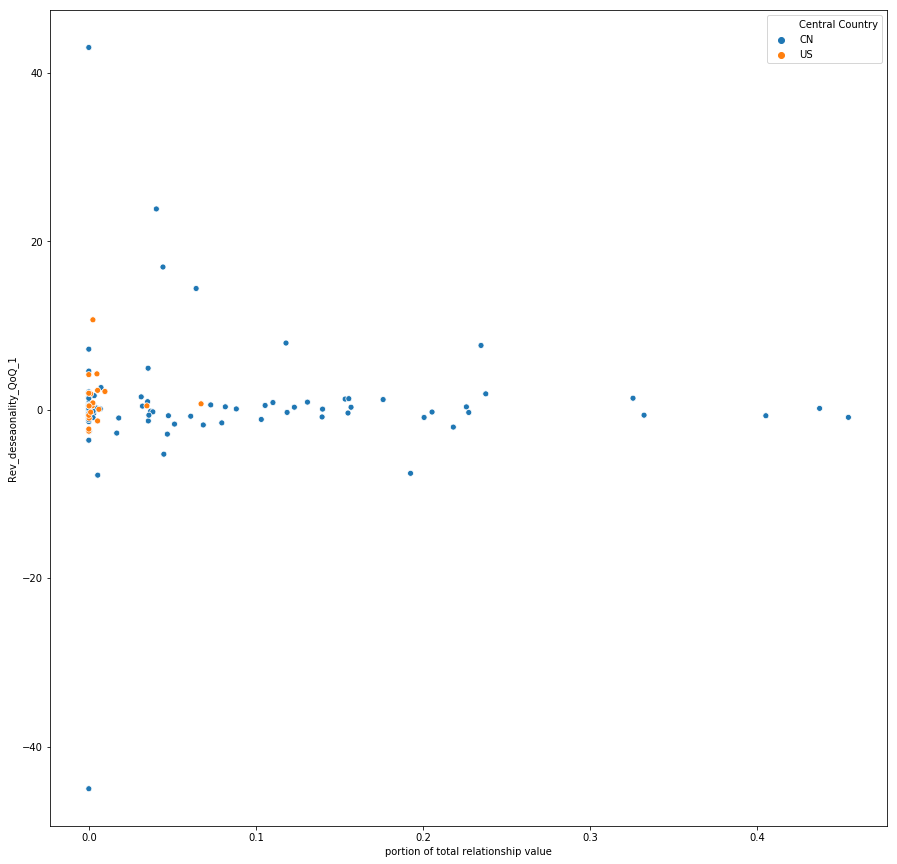

In [627]:
df_impact_financial_2 = df_impact_financial[abs(df_impact_financial['Rev_deseaonality_QoQ_2'])<50]
fig, ax = plt.subplots(1,1,figsize=(15,15))
sns.scatterplot(y='Rev_deseaonality_QoQ_1', x='portion of total relationship value',
                data=df_impact_financial_2[~df_impact_financial_2['As Of Date Bloomberg'].isin(['2018-12-31','2019-03-31'])],
                hue='Central Country',ax=ax)

In [460]:
df_cnus_degree2.columns

Index([ 'Central Ticker', 'Central Country',          20170331,
                20171231,          20180321,          20180331,
                20180630,          20180930,          20181231,
                20190331],
      dtype='object', name='As Of Date Bloomberg')

In [124]:
#CNUS Degree plot again revenue
df_cnus_de = pd.melt(df_cnus_degree2, id_vars=["Central Ticker", "Central Country"], 
                  var_name="As Of Date Bloomberg", value_name="CNUS_Degree").fillna(0)
df_cnus_de['As Of Date Bloomberg']= pd.to_datetime(df_cnus_de['As Of Date Bloomberg'],format="%Y%m%d")
df_cnus_financial =pd.merge(df_cnus_de,df_fin_q_manu[['Central Ticker','End Date', 'Revenue', 'Rev_deseaonality',
       'Rev_deseaonality_QoQ_1', 'Rev_deseaonality_QoQ_2',
       'Rev_deseaonality_QoQ3', 'Rev_deseaonality_QoQ_4',
       'Rev_deseaonality_QoQ_5']],how='inner',left_on=['Central Ticker','As Of Date Bloomberg'],right_on=['Central Ticker','End Date'])
df_cnus_financial = df_cnus_financial.sort_values(by=['Central Ticker','End Date'])
df_cnus_financial

NameError: name 'df_cnus_degree2' is not defined

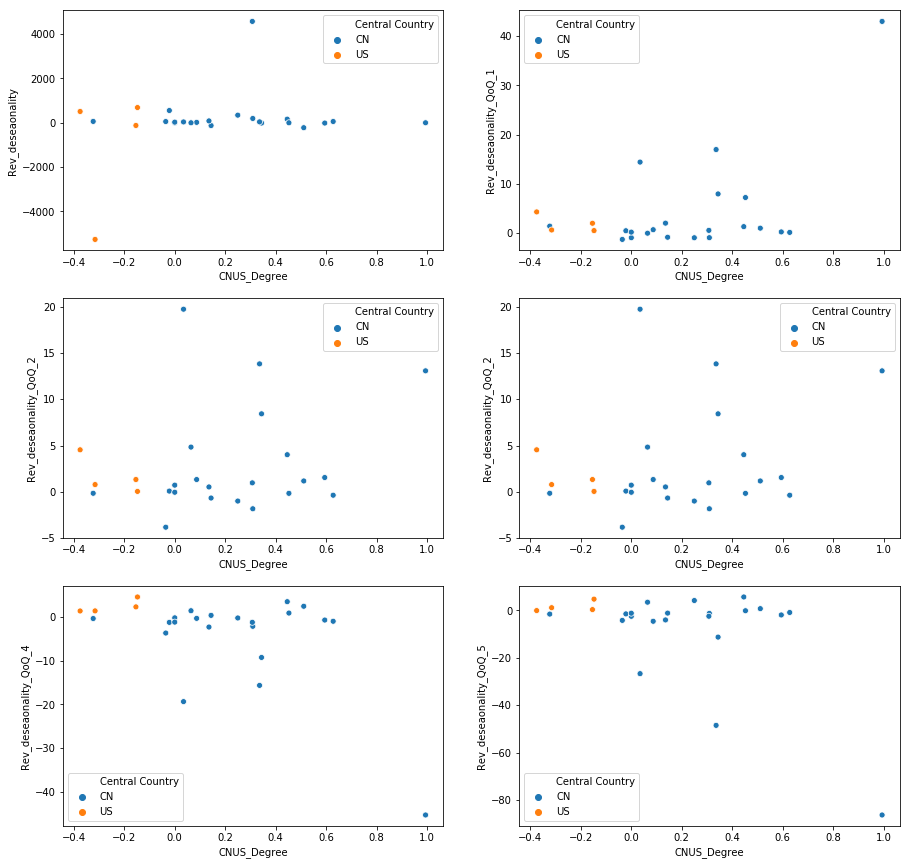

In [465]:
fig, ax = plt.subplots(3,2,figsize=(15,15))
sns.scatterplot(y='Rev_deseaonality', x='CNUS_Degree', data=df_cnus_financial[df_cnus_financial['As Of Date Bloomberg']=='2017-12-31'],hue='Central Country',ax=ax[0,0])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[0,0],c='g')
#ax[0,0].set_xlim(-1,1)
#ax[0,0].set_ylim(-1,1)
sns.scatterplot(y='Rev_deseaonality_QoQ_1', x='CNUS_Degree', data=df_cnus_financial[df_cnus_financial['As Of Date Bloomberg']=='2017-12-31'],hue='Central Country',ax=ax[0,1])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[0,1],c='g')
#ax[0,1].set_xlim(-1,1)
#ax[0,1].set_ylim(-1,1)
sns.scatterplot(y='Rev_deseaonality_QoQ_2', x='CNUS_Degree', data=df_cnus_financial[df_cnus_financial['As Of Date Bloomberg']=='2017-12-31'],hue='Central Country',ax=ax[1,0])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[1,0],c='g')
#ax[1,0].set_xlim(-1,1)
#ax[1,0].set_ylim(-1,1)
sns.scatterplot(y='Rev_deseaonality_QoQ_2', x='CNUS_Degree', data=df_cnus_financial[df_cnus_financial['As Of Date Bloomberg']=='2017-12-31'],hue='Central Country',ax=ax[1,1])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[1,1],c='g')
#ax[1,1].set_xlim(-1,1)
#ax[1,1].set_ylim(-1,1)
sns.scatterplot(y='Rev_deseaonality_QoQ_4', x='CNUS_Degree', data=df_cnus_financial[df_cnus_financial['As Of Date Bloomberg']=='2017-12-31'],hue='Central Country',ax=ax[2,0])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[2,0],c='g')
#ax[2,0].set_xlim(-1,1)
#ax[2,0].set_ylim(-1,1)
sns.scatterplot(y='Rev_deseaonality_QoQ_5', x='CNUS_Degree', data=df_cnus_financial[df_cnus_financial['As Of Date Bloomberg']=='2017-12-31'],hue='Central Country',ax=ax[2,1])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[2,1],c='g')
#ax[2,1].set_xlim(-1,1)
#ax[2,1].set_ylim(-1,1)

In [11]:
#CNUS DEGREE change over time
df_industry_supp = pd.pivot_table(df_Suppliers,index=['Central Country','As Of Date Bloomberg'],columns=['Supplier Country']
                      ,values=['Relationship Value USD'],aggfunc={'Relationship Value USD':np.sum})
df_industry_supp.columns = df_industry_supp.columns.droplevel(0)
df_industry_supp.reset_index(inplace=True)
df_industry_supp = df_industry_supp[['Central Country','As Of Date Bloomberg','CN','US']].fillna(0)
df_industry_tot = pd.pivot_table(df_Suppliers,
                       index=['Central Country','As Of Date Bloomberg']
                      ,values=['%Cost','Relationship Value USD'],aggfunc={'%Cost':np.sum,'Relationship Value USD':np.sum})
df_cnus_deg_ind = pd.merge(df_industry_tot,df_industry_supp,how='left', left_on=['Central Country','As Of Date Bloomberg'],
                        right_on=['Central Country','As Of Date Bloomberg'])
df_cnus_deg_ind['CN_Degree'] = df_cnus_deg_ind['CN']/df_cnus_deg_ind['Relationship Value USD']
df_cnus_deg_ind['US_Degree'] = df_cnus_deg_ind['US']/df_cnus_deg_ind['Relationship Value USD']
df_cnus_deg_ind['As Of Date Bloomberg']=pd.to_datetime(df_cnus_deg_ind['As Of Date Bloomberg'],format="%Y%m%d")

In [12]:
df_cnus_deg_ind['As Of Date Bloomberg']!='2018-03-21'

0      True
1      True
2     False
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10    False
11     True
12     True
13     True
14     True
15     True
Name: As Of Date Bloomberg, dtype: bool

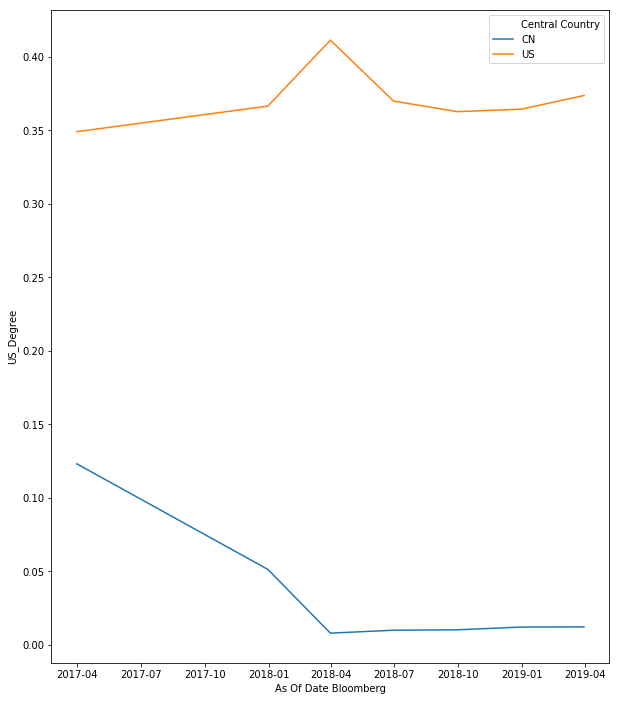

In [14]:
fig = plt.figure(figsize=(10,12))
sns.lineplot('As Of Date Bloomberg','US_Degree',data= df_cnus_deg_ind[df_cnus_deg_ind['As Of Date Bloomberg']!='2018-03-21'],hue='Central Country')

In [15]:
#Industry Level DSC? Date Difference plot graph
all_date = set(df_Suppliers['As Of Date Bloomberg'])
all_manu = set(df_Suppliers['Central Ticker'])
all_country = set(df_Suppliers['Central Country'])
all_supp = set(df_Suppliers['Supplier Ticker'])
df_date_mat_cty = pd.pivot_table(df_Suppliers,index=['As Of Date Bloomberg','Supplier Ticker'],columns=['Central Country'],
                      values=['Relationship Value USD'],aggfunc={'Relationship Value USD':np.sum})
df_date_mat_cty.columns = df_date_mat_cty.columns.droplevel(0)
df_date_mat_cty = df_date_mat_cty.reset_index()
df_dict_cty = {}
df_mat_cty = {}
for d in all_date:
    df_dict_cty[d] = df_date_mat_cty[df_date_mat_cty['As Of Date Bloomberg']==d]
    df_dict_cty[d] = df_dict_cty[d].set_index('Supplier Ticker')
    df_mat_cty[d] = pd.DataFrame(index=all_supp,columns=all_country)
    for i in all_supp:
        for j in all_country:
            try:
                df_mat_cty[d].loc[i,j]=df_dict_cty[d].loc[i,j]
            except:
                df_mat_cty[d].loc[i,j]=0
df_mat_cty_p = df_mat_cty


In [16]:
for d in all_date:
    for i in all_country:
        if df_mat_cty[d][i].sum(axis=0) == 0:
            df_mat_cty_p[d][i] = 0
        else: 
            df_mat_cty_p[d][i] = df_mat_cty[d][i]/df_mat_cty[d][i].sum(axis=0)

In [17]:
df_mat_cty_p[20180321]

CN           US
AXL US Equity          0.000322792    0.0218004
0389232D CH Equity     1.86045e-06          NaN
Yituo Luo... Equity    7.89267e-07          NaN
Beijing P... Equity     0.00123307          NaN
Shanghai4 ... Equity             0          NaN
000120 KS Equity               NaN  0.000323062
SMP US Equity                  NaN  0.000238006
ADNT US Equity          0.00269033    0.0194854
CEBYAZ CH Equity        9.1787e-05          NaN
ZHAMCZ CH Equity         0.0922979          NaN
6161 JP Equity          5.9248e-06  7.39888e-06
900920 CH Equity        0.00113658          NaN
SABIC AB Equity                NaN   0.00102496
Adient Au... Equity              0            0
Shenyang7 ... Equity             0            0
AOSL US Equity         8.01774e-06          NaN
GRMN US Equity                 NaN  0.000440512
0180583D CH Equity      0.00645787          NaN
600418 CH Equity                 0            0
5406 JP Equity                 NaN   0.00281973
AJAGZ CH Equity                  0          NaN
KAMAEZ CH Equity                 0            0
204320 KS Equity        0.00439165   0.00617932
EO FP Equity             0.0112435    0.0311593
Chongqing7... Equity   6.90924e-05          NaN
002863 CH Equity       4.29326e-05          NaN
0275657D CH Equity      0.00165519          NaN
200625 CH Equity       0.000493124  0.000177179
TKA GR Equity           0.00558337   0.00840163
SLTIAZ CH Equity       1.49683e-05          NaN
...                            ...          ...
7968166Z CH Equity     0.000362609          NaN
002143 CH Equity                 0            0
1497090D CH Equity               0          NaN
SWKS US Equity                   0            0
AKE FP Equity                  NaN  0.000940666
0174784D CH Equity      0.00143783          NaN
SSYS US Equity                 NaN    0.0001766
6282 TT Equity                 NaN  2.49086e-05
002454 CH Equity        0.00124728          NaN
AASFQZ CH Equity                 0            0
Nanchang7 ... Equity             0            0
0609553D CH Equity               0          NaN
Chongqing4... Equity   0.000161888          NaN
600710 CH Equity       1.34887e-05          NaN
300151 CH Equity                 0          NaN
0180742D CH Equity     0.000168173          NaN
002635 CH Equity                 0            0
7980318Z CH Equity     5.49713e-08          NaN
603906 CH Equity                 0            0
Anhui Jac4... Equity             0          NaN
EMC US Equity                    0            0
0466363D CH Equity     5.54757e-07          NaN
Jiangxi B... Equity    1.67985e-05          NaN
601766 CH Equity                 0          NaN
5560125Z AV Equity               0            0
0350500D CH Equity     6.17847e-06          NaN
GE US Equity                     0            0
6501 JP Equity                 NaN   0.00673004
Chongqing17... Equity            0            0
601933 CH Equity                 0          NaN

[1040 rows x 2 columns]

In [589]:
(np.sum(np.abs(df_mat_c1[20180331]-df_mat_c1[20170331]))/2)

CN    0.174147
US    0.198534
dtype: float64

In [593]:
df_DSC_country={}
for j in all_date:
    df_DSC_country[j]=pd.DataFrame(columns=['Reference Date','As of Date','Country','DSC'])
    DSC=[]
    dsc_as_of_date = []
    dsc_country = []
    for i in [20170331,20171231,20180331,20180630,20180930,20181231,20190331]:
        dsc_as_of_date.append(i)
        dsc_as_of_date.append(i)
        dsc_country.append('CN')
        dsc_country.append('US')
        DSC = np.append(DSC,(np.sum(np.abs(df_mat_c1[i]-df_mat_c1[j]))/(np.sum(df_mat_c1[i])+np.sum(df_mat_c1[j]))))
    df_DSC_country[j]['As of Date']=dsc_as_of_date
    df_DSC_country[j]['Country']=dsc_country
    df_DSC_country[j]['DSC']=DSC
    df_DSC_country[j]['Reference Date']=j
    df_DSC_country[j]['As of Date']=pd.to_datetime(df_DSC_country[j]['As of Date'],format='%Y%m%d')

In [594]:
df_DSC_country[20170331]

Reference Date As of Date Country       DSC
0         20170331 2017-03-31      CN  0.000000
1         20170331 2017-03-31      US  0.000000
2         20170331 2017-12-31      CN  0.149592
3         20170331 2017-12-31      US  0.150571
4         20170331 2018-03-31      CN  0.174147
5         20170331 2018-03-31      US  0.198534
6         20170331 2018-06-30      CN  0.406718
7         20170331 2018-06-30      US  0.245147
8         20170331 2018-09-30      CN  0.407243
9         20170331 2018-09-30      US  0.275790
10        20170331 2018-12-31      CN  0.444709
11        20170331 2018-12-31      US  0.293128
12        20170331 2019-03-31      CN  0.449947
13        20170331 2019-03-31      US  0.291441

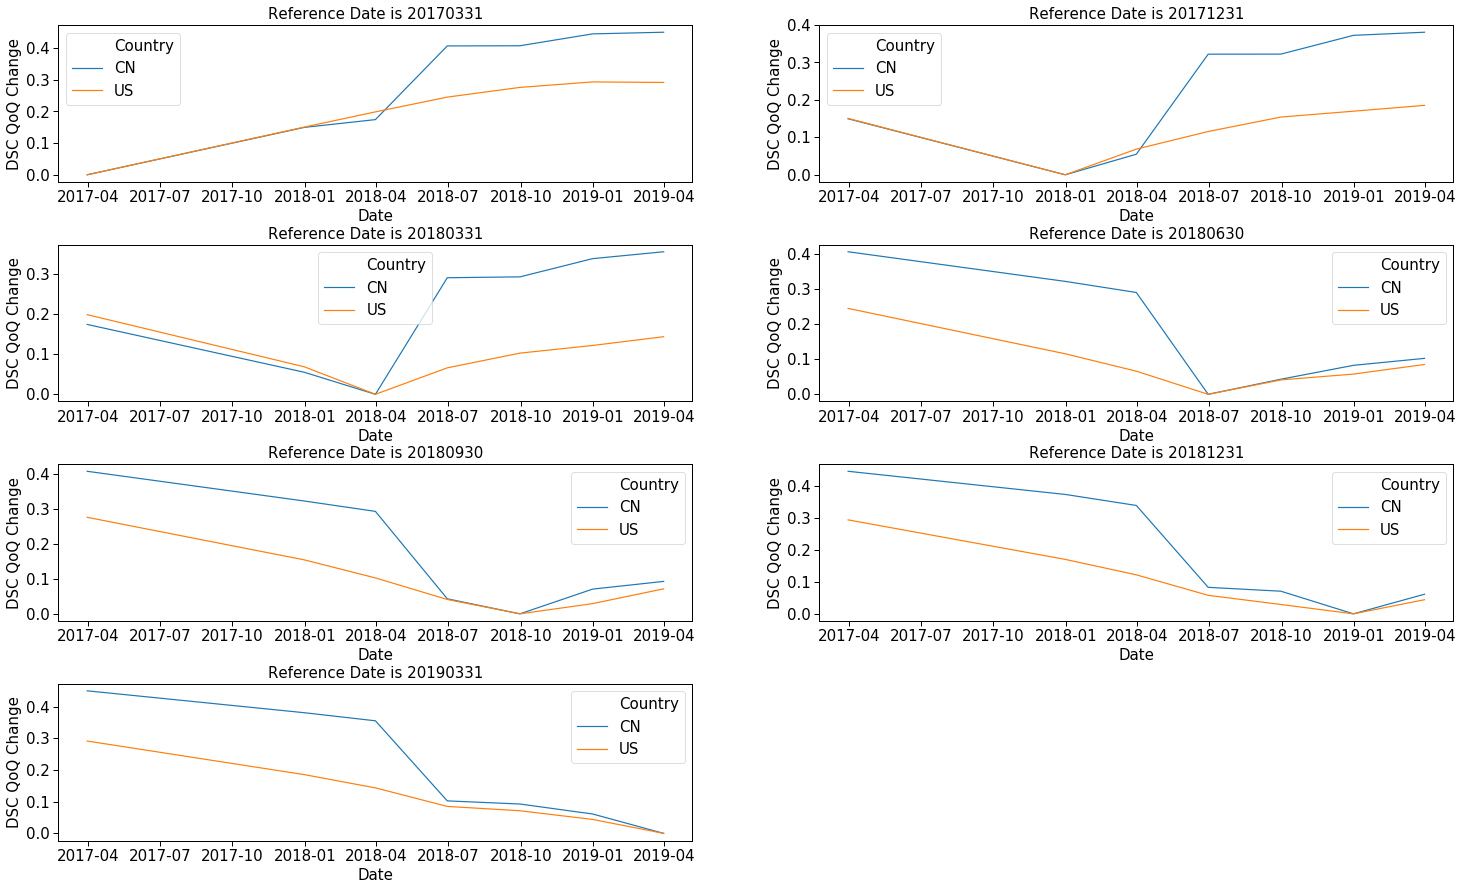

In [602]:
fig= plt.figure(figsize=(25,15))
j=1
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.6)
for i in [20170331,20171231,20180331,20180630,20180930,20181231,20190331]:
    ax = fig.add_subplot(4,2,j)
    plt.subplots_adjust(hspace = 0.4)
    b= sns.lineplot('As of Date','DSC',data= df_DSC_country[i],hue='Country')
    plt.title('Reference Date is %i' % df_DSC_country[i]['Reference Date'][0],fontsize=15)
    j=j+1
    b.set_xlabel("Date", fontsize=15)
    b.set_ylabel("DSC QoQ Change", fontsize=15)
    b.tick_params(labelsize=15)
    plt.legend(fontsize=15)

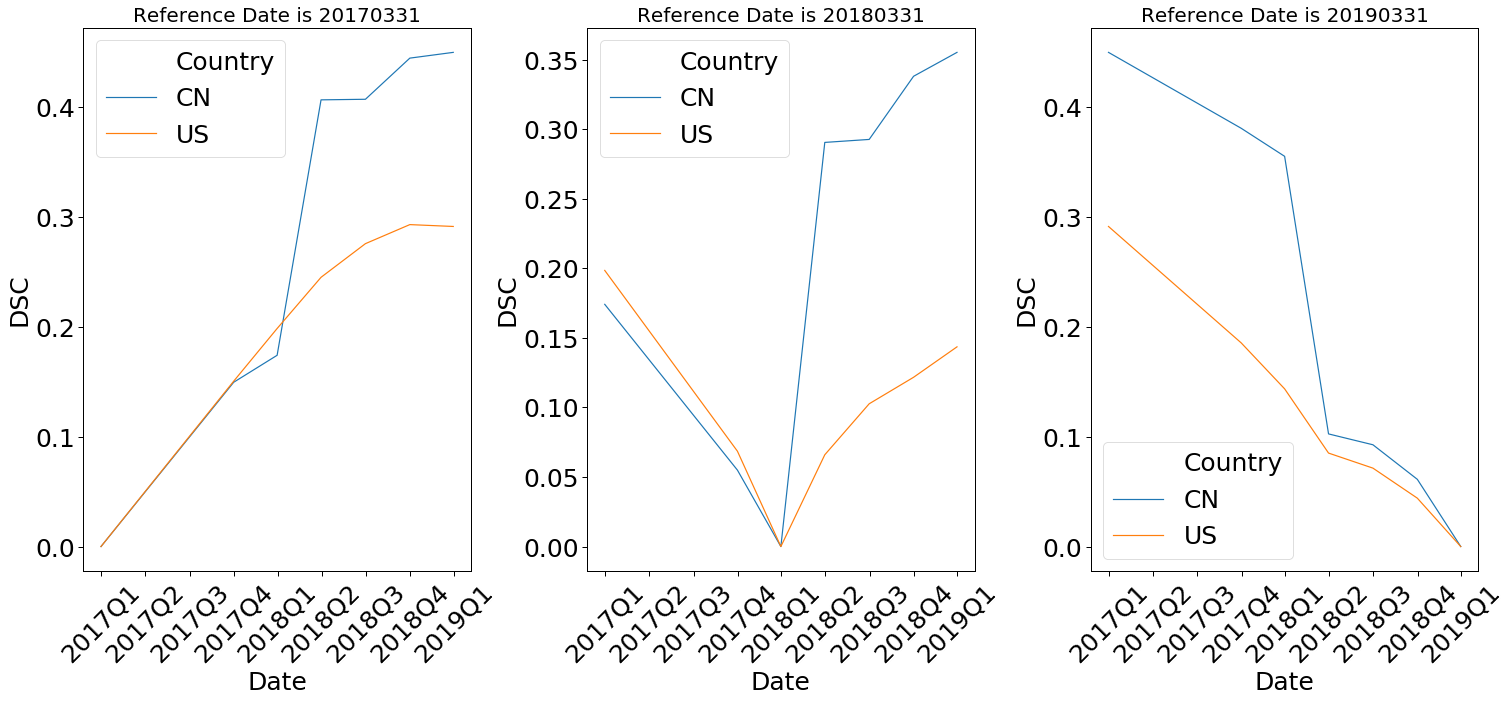

In [612]:
fig= plt.figure(figsize=(25,10))
j=1
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.6)
for i in [20170331,20180331,20190331]:
    ax = fig.add_subplot(1,3,j)
    plt.subplots_adjust(hspace = 0.4)
    b= sns.lineplot('As of Date','DSC',data= df_DSC_country[i],hue='Country')
    plt.title('Reference Date is %i' % df_DSC_country[i]['Reference Date'][0],fontsize=20)
    j=j+1
    b.set_xlabel("Date", fontsize=25)
    b.set_ylabel("DSC", fontsize=25)
    b.tick_params(labelsize=25)
    plt.legend(fontsize=25)
    b.set_xticklabels(["2017Q1","2017Q2","2017Q3","2017Q4","2018Q1","2018Q2","2018Q3","2018Q4","2019Q1"],rotation=45)

In [26]:
df_Suppliers_2 = df_Suppliers.copy()
df_Suppliers_2['Supplier Country_GP']= df_Suppliers_2['Supplier Country'].apply(lambda x: 'Other' if ((x != 'US') and (x != 'CN')) else x)
df_Suppliers_2

Central Ticker               Central Company  As Of Date Bloomberg  \
0        1188 HK Equity              HYBRID KINETIC G              20181231   
1      000572 CH Equity              HAIMA AUTOMOBI-A              20181231   
2      000572 CH Equity              HAIMA AUTOMOBI-A              20181231   
3      000572 CH Equity              HAIMA AUTOMOBI-A              20181231   
4      000572 CH Equity              HAIMA AUTOMOBI-A              20181231   
5      000572 CH Equity              HAIMA AUTOMOBI-A              20181231   
6      000572 CH Equity              HAIMA AUTOMOBI-A              20181231   
7      000572 CH Equity              HAIMA AUTOMOBI-A              20181231   
8      000800 CH Equity              FAW CAR CO LTD-A              20181231   
9      000800 CH Equity              FAW CAR CO LTD-A              20181231   
10     000800 CH Equity              FAW CAR CO LTD-A              20181231   
11     000800 CH Equity              FAW CAR CO LTD-A              20181231   
12     000800 CH Equity              FAW CAR CO LTD-A              20181231   
13     000800 CH Equity              FAW CAR CO LTD-A              20181231   
14     000800 CH Equity              FAW CAR CO LTD-A              20181231   
15     000800 CH Equity              FAW CAR CO LTD-A              20181231   
16     000800 CH Equity              FAW CAR CO LTD-A              20181231   
17     000800 CH Equity              FAW CAR CO LTD-A              20181231   
18     000800 CH Equity              FAW CAR CO LTD-A              20181231   
19     000800 CH Equity              FAW CAR CO LTD-A              20181231   
20     000800 CH Equity              FAW CAR CO LTD-A              20181231   
21     000800 CH Equity              FAW CAR CO LTD-A              20181231   
22     000800 CH Equity              FAW CAR CO LTD-A              20181231   
23     000800 CH Equity              FAW CAR CO LTD-A              20181231   
24     000800 CH Equity              FAW CAR CO LTD-A              20181231   
25     000800 CH Equity              FAW CAR CO LTD-A              20181231   
26     000800 CH Equity              FAW CAR CO LTD-A              20181231   
27     000800 CH Equity              FAW CAR CO LTD-A              20181231   
28     000800 CH Equity              FAW CAR CO LTD-A              20181231   
29     000800 CH Equity              FAW CAR CO LTD-A              20181231   
...                 ...                           ...                   ...   
16556  600418 CH Equity  ANHUI JIANGHUAI AUTO GROUP-A              20171231   
16557  600418 CH Equity  ANHUI JIANGHUAI AUTO GROUP-A              20171231   
16558  600418 CH Equity  ANHUI JIANGHUAI AUTO GROUP-A              20171231   
16559    1122 HK Equity      QINGLING MOTORS CO LTD-H              20171231   
16560  603611 CH Equity  NOBLELIFT INTELLIGENT EQU -A              20171231   
16561  600609 CH Equity  SHENYANG JINBEI AUTOMOTIVE-A              20171231   
16562  600609 CH Equity  SHENYANG JINBEI AUTOMOTIVE-A              20171231   
16563  600609 CH Equity  SHENYANG JINBEI AUTOMOTIVE-A              20171231   
16564  600609 CH Equity  SHENYANG JINBEI AUTOMOTIVE-A              20171231   
16565  600609 CH Equity  SHENYANG JINBEI AUTOMOTIVE-A              20171231   
16566  600609 CH Equity  SHENYANG JINBEI AUTOMOTIVE-A              20171231   
16567  600609 CH Equity  SHENYANG JINBEI AUTOMOTIVE-A              20171231   
16568  600609 CH Equity  SHENYANG JINBEI AUTOMOTIVE-A              20171231   
16569  600609 CH Equity  SHENYANG JINBEI AUTOMOTIVE-A              20171231   
16570  600609 CH Equity  SHENYANG JINBEI AUTOMOTIVE-A              20171231   
16571  600609 CH Equity  SHENYANG JINBEI AUTOMOTIVE-A              20171231   
16572  600609 CH Equity  SHENYANG JINBEI AUTOMOTIVE-A              20171231   
16573  600609 CH Equity  SHENYANG JINBEI AUTOMOTIVE-A              20171231   
16574  600609 CH Equity  SHENYANG JINBEI AUTOMOTIVE-A      

In [27]:
#Number of different firms CNUS Industry
df_industry_ct_supp = pd.pivot_table(df_Suppliers_2,index=['Central Country','As Of Date Bloomberg'],columns=['Supplier Country_GP']
                      ,values=['Supplier Ticker'],aggfunc={'Supplier Ticker':lambda x: len(x.unique())})
df_industry_ct_supp.columns = df_industry_ct_supp.columns.droplevel(0)
df_industry_ct_supp.reset_index(inplace=True)
df_industry_ct_supp = df_industry_ct_supp.fillna(0)
df_industry_ct_tot = pd.pivot_table(df_Suppliers,
                       index=['Central Country','As Of Date Bloomberg']
                      ,values=['Supplier Ticker'],aggfunc={'Supplier Ticker':lambda x: len(x.unique())})
df_cnus_deg_ct_ind = pd.merge(df_industry_ct_tot,df_industry_ct_supp,how='left', left_on=['Central Country','As Of Date Bloomberg'],
                        right_on=['Central Country','As Of Date Bloomberg'])
df_cnus_deg_ct_ind['CNUS_Degree'] = (df_cnus_deg_ct_ind['CN']-df_cnus_deg_ct_ind['US'])/df_cnus_deg_ct_ind['Supplier Ticker']
df_cnus_deg_ct_ind['As Of Date Bloomberg']=pd.to_datetime(df_cnus_deg_ct_ind['As Of Date Bloomberg'],format="%Y%m%d")
df_cnus_deg_ct_ind

Central Country As Of Date Bloomberg  Supplier Ticker   CN  Other   US  \
0               CN           2017-03-31              477  326    106   45   
1               CN           2017-12-31              602  422    125   55   
2               CN           2018-03-21              594  411    127   56   
3               CN           2018-03-31              608  423    129   56   
4               CN           2018-06-30              488  301    129   58   
5               CN           2018-09-30              505  311    135   59   
6               CN           2018-12-31              497  302    137   58   
7               CN           2019-03-31              487  299    130   58   
8               US           2017-03-31              375    8    204  163   
9               US           2017-12-31              363   13    207  143   
10              US           2018-03-21              360   11    208  141   
11              US           2018-03-31              355   10    207  138   
12              US           2018-06-30              343   13    200  130   
13              US           2018-09-30              338   13    200  125   
14              US           2018-12-31              340   15    203  122   
15              US           2019-03-31              344   18    201  125   

    CNUS_Degree  
0      0.589099  
1      0.609635  
2      0.597643  
3      0.603618  
4      0.497951  
5      0.499010  
6      0.490946  
7      0.494867  
8     -0.413333  
9     -0.358127  
10    -0.361111  
11    -0.360563  
12    -0.341108  
13    -0.331361  
14    -0.314706  
15    -0.311047

Text(2019-03-31 00:00:00, 203, 'US Manu - Other Suppliers')

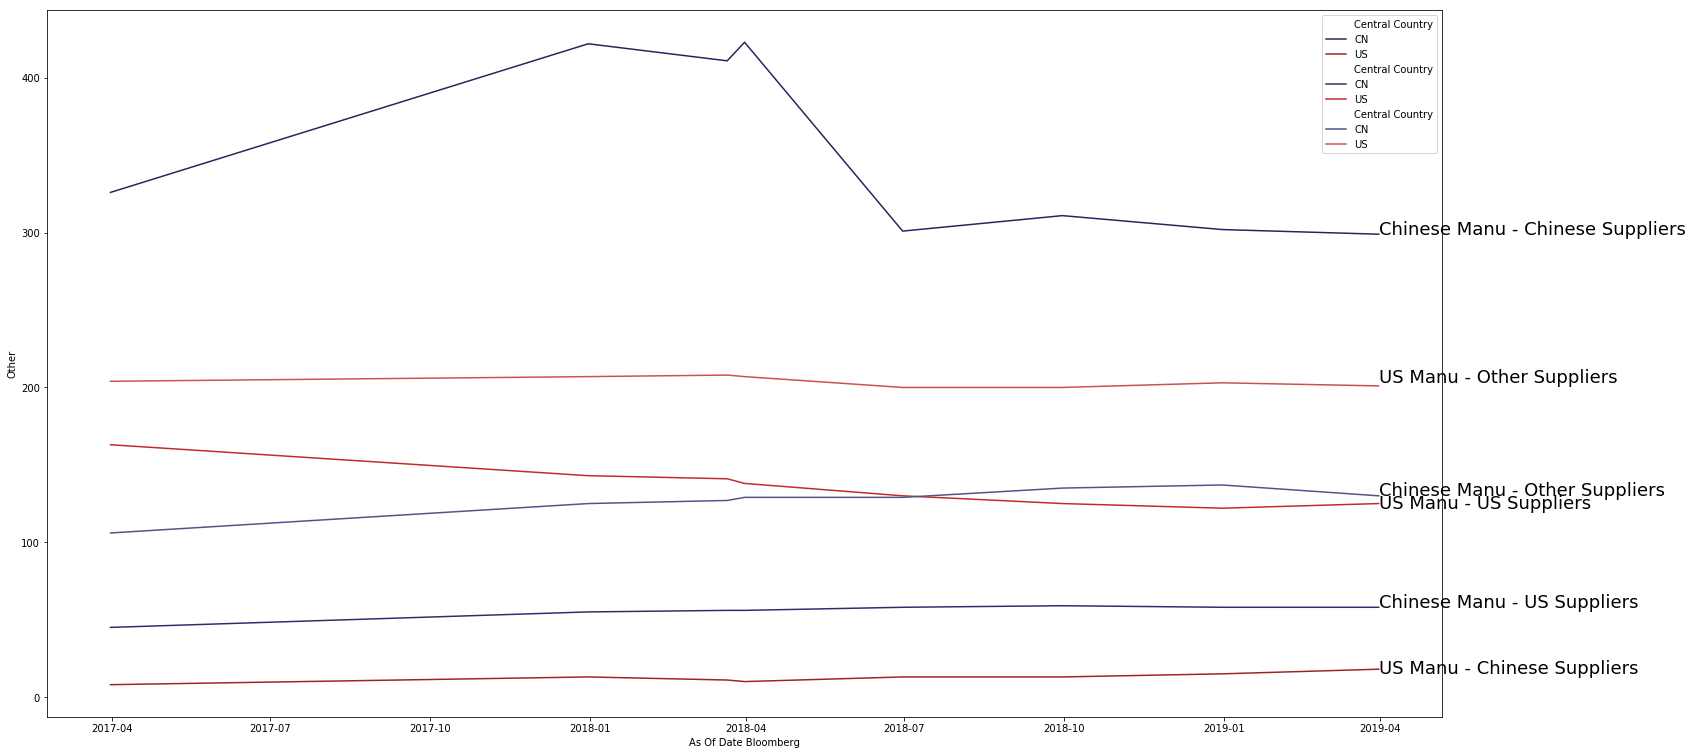

In [30]:
fig,ax = plt.subplots(1,1,figsize=(25,13))
sns.lineplot('As Of Date Bloomberg','CN',data= df_cnus_deg_ct_ind,ax=ax,hue='Central Country',palette=["#23265A", "#9E2323"])
sns.lineplot('As Of Date Bloomberg','US',data= df_cnus_deg_ct_ind,ax=ax,hue='Central Country',palette=["#2A2E6D", "#C12A2A"])
sns.lineplot('As Of Date Bloomberg','Other',data= df_cnus_deg_ct_ind,ax=ax,hue='Central Country',palette=["#505487", "#CC5050"])
ax.annotate('Chinese Manu - Chinese Suppliers',xy=(df_cnus_deg_ct_ind.iloc[7,1],df_cnus_deg_ct_ind.iloc[7,3]),fontsize=18)
ax.annotate('US Manu - Chinese Suppliers',xy=(df_cnus_deg_ct_ind.iloc[7,1],df_cnus_deg_ct_ind.iloc[14,3]),fontsize=18)
ax.annotate('Chinese Manu - US Suppliers',xy=(df_cnus_deg_ct_ind.iloc[7,1],df_cnus_deg_ct_ind.iloc[7,5]),fontsize=18)
ax.annotate('US Manu - US Suppliers',xy=(df_cnus_deg_ct_ind.iloc[7,1],df_cnus_deg_ct_ind.iloc[14,5]),fontsize=18)
ax.annotate('Chinese Manu - Other Suppliers',xy=(df_cnus_deg_ct_ind.iloc[7,1],df_cnus_deg_ct_ind.iloc[7,4]),fontsize=18)
ax.annotate('US Manu - Other Suppliers',xy=(df_cnus_deg_ct_ind.iloc[7,1],df_cnus_deg_ct_ind.iloc[14,4]),fontsize=18)


In [32]:
#Number of different firms CNUS Industry
df_industry_ct_supp = pd.pivot_table(df_Suppliers_2,index=['Central Country','As Of Date Bloomberg'],columns=['Supplier Country_GP']
                      ,values=['Relationship Value USD'],aggfunc={'Relationship Value USD':np.sum})
df_industry_ct_supp.columns = df_industry_ct_supp.columns.droplevel(0)
df_industry_ct_supp.reset_index(inplace=True)
df_industry_ct_supp = df_industry_ct_supp.fillna(0)
df_industry_ct_tot = pd.pivot_table(df_Suppliers,
                       index=['Central Country','As Of Date Bloomberg']
                      ,values=['Supplier Ticker'],aggfunc={'Supplier Ticker':lambda x: len(x.unique())})
df_cnus_deg_ct_ind = pd.merge(df_industry_ct_tot,df_industry_ct_supp,how='left', left_on=['Central Country','As Of Date Bloomberg'],
                        right_on=['Central Country','As Of Date Bloomberg'])
df_cnus_deg_ct_ind['CNUS_Degree'] = (df_cnus_deg_ct_ind['CN']-df_cnus_deg_ct_ind['US'])/df_cnus_deg_ct_ind['Supplier Ticker']
df_cnus_deg_ct_ind['As Of Date Bloomberg']=pd.to_datetime(df_cnus_deg_ct_ind['As Of Date Bloomberg'],format="%Y%m%d")
df_cnus_deg_ct_ind

Central Country As Of Date Bloomberg  Supplier Ticker            CN  \
0               CN           2017-03-31              477  2.252669e+09   
1               CN           2017-12-31              602  1.339977e+10   
2               CN           2018-03-21              594  1.486299e+10   
3               CN           2018-03-31              608  1.286301e+11   
4               CN           2018-06-30              488  1.226013e+11   
5               CN           2018-09-30              505  1.233301e+11   
6               CN           2018-12-31              497  1.224103e+11   
7               CN           2019-03-31              487  1.236523e+11   
8               US           2017-03-31              375  2.296853e+07   
9               US           2017-12-31              363  1.440382e+08   
10              US           2018-03-21              360  1.534005e+08   
11              US           2018-03-31              355  1.353805e+08   
12              US           2018-06-30              343  1.567299e+08   
13              US           2018-09-30              338  1.458777e+08   
14              US           2018-12-31              340  1.689764e+08   
15              US           2019-03-31              344  2.214944e+08   

           Other            US   CNUS_Degree  
0   2.524008e+09  6.708494e+08  3.316184e+06  
1   3.497676e+09  9.139544e+08  2.074055e+07  
2   3.944790e+09  1.020740e+09  2.330345e+07  
3   3.723322e+09  1.054370e+09  2.098285e+08  
4   3.935028e+09  1.266182e+09  2.486376e+08  
5   3.938571e+09  1.309646e+09  2.416247e+08  
6   4.816636e+09  1.551976e+09  2.431758e+08  
7   4.414747e+09  1.572939e+09  2.506763e+08  
8   2.353666e+10  1.263694e+10 -3.363727e+07  
9   2.032630e+10  1.184399e+10 -3.223126e+07  
10  2.503278e+10  1.443469e+10 -3.967026e+07  
11  2.019477e+10  1.421104e+10 -3.964974e+07  
12  2.366461e+10  1.398652e+10 -4.032008e+07  
13  2.389669e+10  1.368615e+10 -4.005997e+07  
14  2.472193e+10  1.427458e+10 -4.148708e+07  
15  2.366445e+10  1.425598e+10 -4.079794e+07

Text(2019-03-31 00:00:00, 24721925190.0, 'US Manu - Other Suppliers')

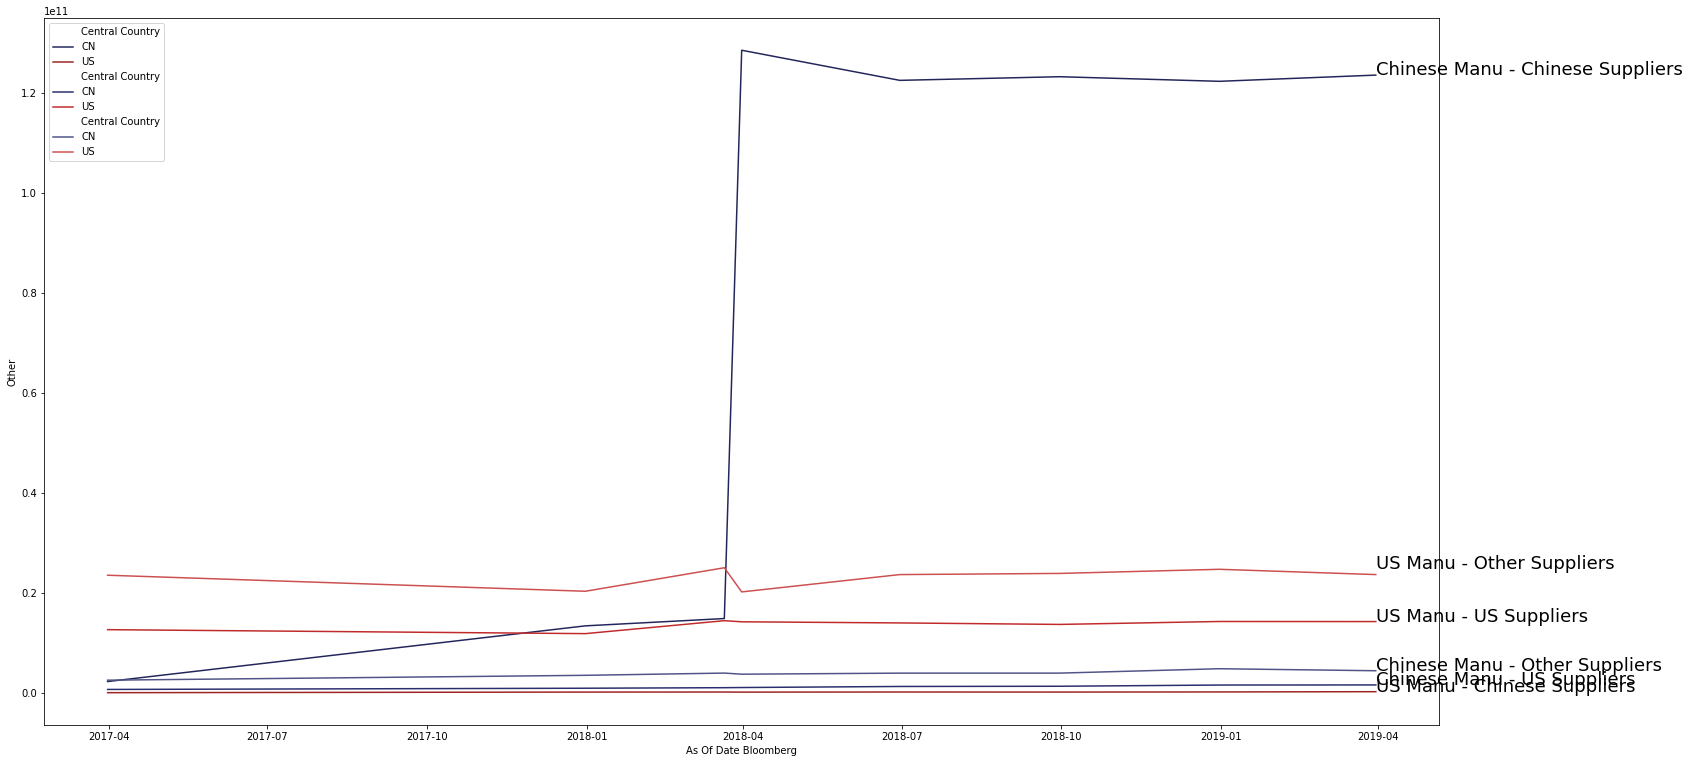

In [33]:
fig,ax = plt.subplots(1,1,figsize=(25,13))
sns.lineplot('As Of Date Bloomberg','CN',data= df_cnus_deg_ct_ind,ax=ax,hue='Central Country',palette=["#23265A", "#9E2323"])
sns.lineplot('As Of Date Bloomberg','US',data= df_cnus_deg_ct_ind,ax=ax,hue='Central Country',palette=["#2A2E6D", "#C12A2A"])
sns.lineplot('As Of Date Bloomberg','Other',data= df_cnus_deg_ct_ind,ax=ax,hue='Central Country',palette=["#505487", "#CC5050"])
ax.annotate('Chinese Manu - Chinese Suppliers',xy=(df_cnus_deg_ct_ind.iloc[7,1],df_cnus_deg_ct_ind.iloc[7,3]),fontsize=18)
ax.annotate('US Manu - Chinese Suppliers',xy=(df_cnus_deg_ct_ind.iloc[7,1],df_cnus_deg_ct_ind.iloc[14,3]),fontsize=18)
ax.annotate('Chinese Manu - US Suppliers',xy=(df_cnus_deg_ct_ind.iloc[7,1],df_cnus_deg_ct_ind.iloc[7,5]),fontsize=18)
ax.annotate('US Manu - US Suppliers',xy=(df_cnus_deg_ct_ind.iloc[7,1],df_cnus_deg_ct_ind.iloc[14,5]),fontsize=18)
ax.annotate('Chinese Manu - Other Suppliers',xy=(df_cnus_deg_ct_ind.iloc[7,1],df_cnus_deg_ct_ind.iloc[7,4]),fontsize=18)
ax.annotate('US Manu - Other Suppliers',xy=(df_cnus_deg_ct_ind.iloc[7,1],df_cnus_deg_ct_ind.iloc[14,4]),fontsize=18)

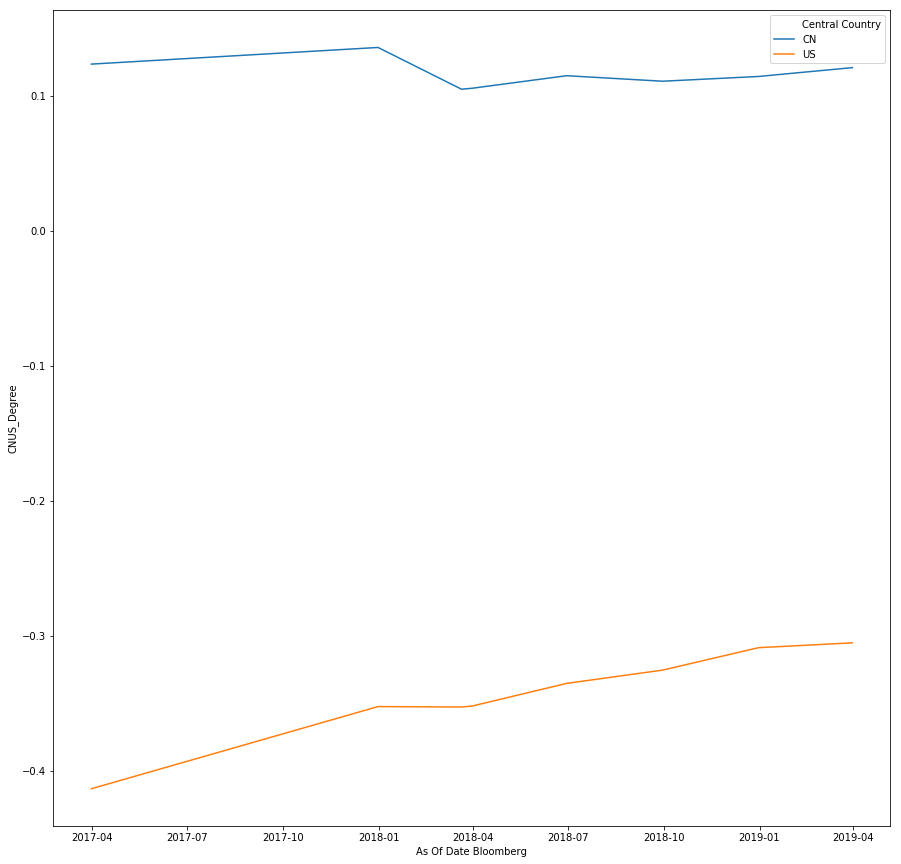

In [476]:
fig = plt.figure(figsize=(15,15))
sns.lineplot('As Of Date Bloomberg','CNUS_Degree',data= df_cnus_deg_ct_ind,hue='Central Country')

In [537]:
#Firm CN-US Degree Count
df_cty_cnt_supp = pd.pivot_table(df_Suppliers,index=['Central Ticker','As Of Date Bloomberg'],columns=['Supplier Country']
                      ,values=['Supplier Ticker'],aggfunc={'Supplier Ticker':lambda x: len(x.unique())})
df_cty_cnt_supp.columns = df_cty_cnt_supp.columns.droplevel(0)
df_cty_cnt_supp.reset_index(inplace=True)
df_cty_cnt_supp = df_cty_cnt_supp[['Central Ticker','As Of Date Bloomberg','CN','US']].fillna(0)
df_cty_ct_tot = pd.pivot_table(df_Suppliers,
                       index=['Central Ticker','Central Country','As Of Date Bloomberg']
                      ,values=['Supplier Ticker'],aggfunc={'Supplier Ticker':lambda x: len(x.unique())})
df_cty_ct_tot.reset_index(inplace=True)
df_cnus_deg_ct_cty = pd.merge(df_cty_ct_tot,df_cty_cnt_supp,how='left', left_on=['Central Ticker','As Of Date Bloomberg'],
                        right_on=['Central Ticker','As Of Date Bloomberg'])
df_cnus_deg_ct_cty['CN_Degree'] = df_cnus_deg_ct_cty['CN']/df_cnus_deg_ct_cty['Supplier Ticker']
df_cnus_deg_ct_cty['US_Degree'] = df_cnus_deg_ct_cty['US']/df_cnus_deg_ct_cty['Supplier Ticker']

In [538]:
df_cnus_deg_ct_cty_cn = pd.pivot_table(df_cnus_deg_ct_cty,index=['Central Ticker','Central Country'],columns=['As Of Date Bloomberg']
                      ,values=['CN_Degree'],aggfunc={'CN_Degree':np.sum})
df_cnus_deg_ct_cty_cn.columns = df_cnus_deg_ct_cty_cn.columns.droplevel(0)
df_cnus_deg_ct_cty_cn.reset_index(inplace=True)
df_cnus_deg_ct_cty_us = pd.pivot_table(df_cnus_deg_ct_cty,index=['Central Ticker','Central Country'],columns=['As Of Date Bloomberg']
                      ,values=['US_Degree'],aggfunc={'US_Degree':np.sum})
df_cnus_deg_ct_cty_us.columns = df_cnus_deg_ct_cty_us.columns.droplevel(0)
df_cnus_deg_ct_cty_us.reset_index(inplace=True)
df_cnus_deg_ct_cty_cn

As Of Date Bloomberg    Central Ticker Central Country  20170331  20171231  \
0                     000572 CH Equity              CN  0.555556  0.500000   
1                     000800 CH Equity              CN  0.505263  0.471910   
2                     000913 CH Equity              CN  0.857143  0.800000   
3                     000927 CH Equity              CN  0.642857  0.531250   
4                     000980 CH Equity              CN  1.000000  0.714286   
5                       1122 HK Equity              CN  0.000000  0.000000   
6                       1188 HK Equity              US       NaN       NaN   
7                       1211 HK Equity              CN  0.361702  0.375000   
8                        175 HK Equity              CN  0.112676  0.125000   
9                       1958 HK Equity              CN  0.142857  0.150000   
10                    200054 CH Equity              CN  0.933333  0.928571   
11                    200550 CH Equity              CN  0.581395  0.536585   
12                    200625 CH Equity              CN  0.594595  0.597222   
13                      2238 HK Equity              CN  0.185185  0.148148   
14                      2333 HK Equity              CN  0.232558  0.190476   
15                       476 HK Equity              CN  1.000000       NaN   
16                       489 HK Equity              CN  0.220000  0.208333   
17                    600006 CH Equity              CN  0.819672  0.842105   
18                    600099 CH Equity              CN  1.000000  1.000000   
19                    600104 CH Equity              CN  0.174603  0.189655   
20                    600166 CH Equity              CN  0.654545  0.600000   
21                    600303 CH Equity              CN  1.000000  1.000000   
22                    600418 CH Equity              CN  0.638889  0.609756   
23                    600609 CH Equity              CN  0.846154  0.857143   
24                    600733 CH Equity              CN       NaN       NaN   
25                    600877 CH Equity              CN  0.833333  0.818182   
26                    601127 CH Equity              CN  1.000000  1.000000   
27                    601777 CH Equity              CN  0.600000       NaN   
28                    601965 CH Equity              CN  1.000000  1.000000   
29                    603611 CH Equity              CN       NaN  1.000000   
30                    603766 CH Equity              CN  1.000000  0.800000   
31                         F US Equity              US  0.010830  0.011905   
32                       FUV US Equity              US       NaN       NaN   
33                        GM US Equity              US  0.013605  0.022305   
34                       HOG US Equity              US  0.000000  0.000000   
35                       NIO US Equity              CN       NaN       NaN   
36                       THO US Equity              US  0.000000  0.000000   
37                      TSLA US Equity              US  0.014925  0.030769   
38                       WGO US Equity              US  0.000000  0.000000   
39                      ZAAP US Equity              US       NaN  0.666667   

As Of Date Bloomberg  20180321  20180331  20180630  20180930  20181231  \
0                     0.500000  0.500000  0.428571  0.461538  0.428571   
1                     0.471910  0.471910  0.323529  0.257143  0.303030   
2                     0.833333  0.833333  0.875000  0.875000  0.875000   
3                     0.516129  0.516129  0.535714  0.576923  0.500000   
4                     0.714286  0.714286  0.750000  0.777778  0.777778   
5                          NaN       NaN  1.000000  1.000000       NaN   
6                          NaN       NaN  1.000000  1.000000  1.000000   
7                     0.354167  0.318182  0.268293  0.295455  0.333333   
8                     0.126582  0.116883  0.144737  0.141026  0.150000   
9                     0.142857  0.157895  0.150000  0.181818 

/Users/Saik/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
/Users/Saik/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
/Users/Saik/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
/Users/Saik/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
/Users/Saik/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1

(-0.1, 1)

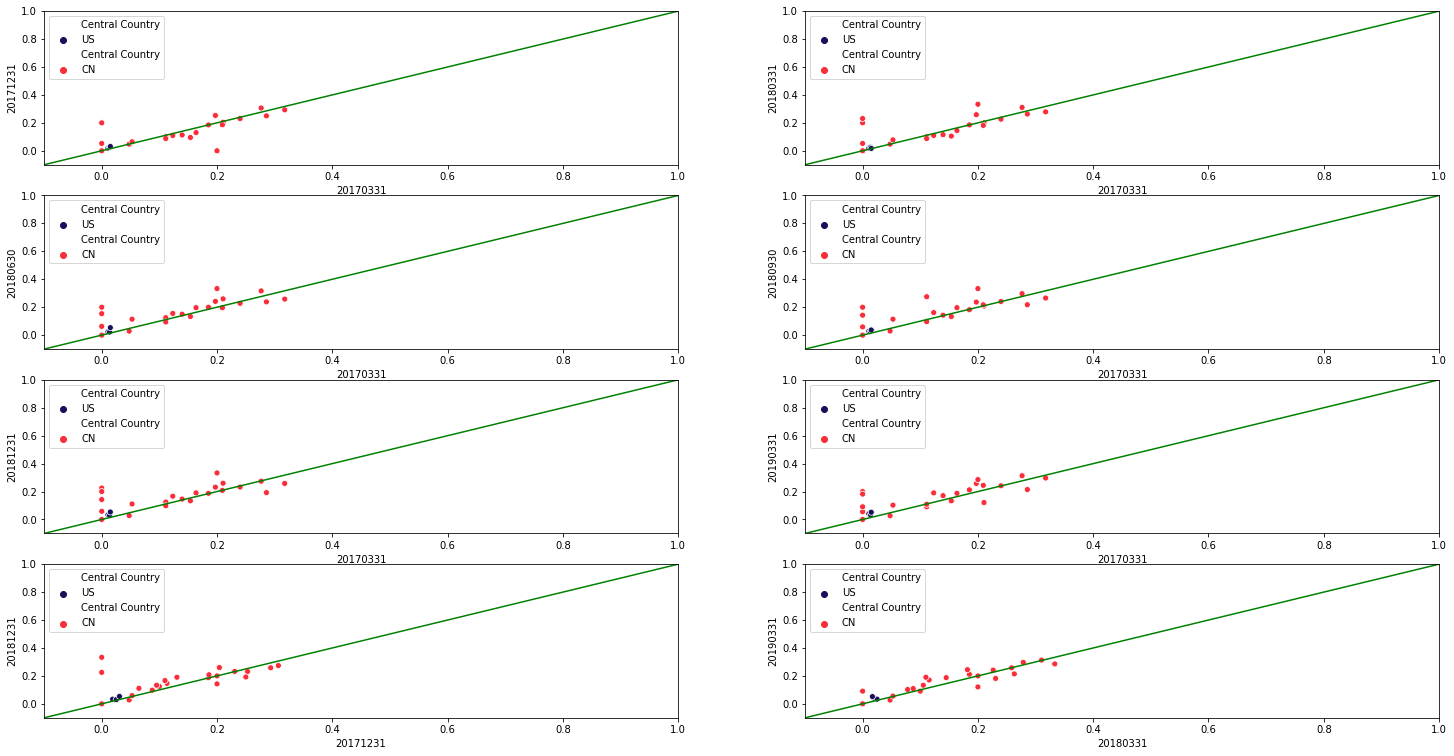

In [36]:
fig, ax = plt.subplots(4,2,figsize=(25,13))
sns.scatterplot(x=20170331, y=20171231, data=df_cnus_deg_ct_cty_cn[df_cnus_deg_ct_cty_cn['Central Country']=="US"],hue='Central Country',palette=["#180f5b"],ax=ax[0,0])
sns.scatterplot(x=20170331, y=20171231, data=df_cnus_deg_ct_cty_us[df_cnus_deg_ct_cty_us['Central Country']=="CN"],hue='Central Country',palette=["#fa2d3a"],ax=ax[0,0])
sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[0,0],c='g')
ax[0,0].set_xlim(-0.1,1)
ax[0,0].set_ylim(-0.1,1)
sns.scatterplot(x=20170331, y=20180331, data=df_cnus_deg_ct_cty_cn[df_cnus_deg_ct_cty_cn['Central Country']=="US"],hue='Central Country',palette=["#180f5b"],ax=ax[0,1])
sns.scatterplot(x=20170331, y=20180331, data=df_cnus_deg_ct_cty_us[df_cnus_deg_ct_cty_us['Central Country']=="CN"],hue='Central Country',palette=["#fa2d3a"],ax=ax[0,1])
sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[0,1],c='g')
ax[0,1].set_xlim(-0.1,1)
ax[0,1].set_ylim(-0.1,1)
sns.scatterplot(x=20170331, y=20180630, data=df_cnus_deg_ct_cty_cn[df_cnus_deg_ct_cty_cn['Central Country']=="US"],hue='Central Country',palette=["#180f5b"],ax=ax[1,0])
sns.scatterplot(x=20170331, y=20180630, data=df_cnus_deg_ct_cty_us[df_cnus_deg_ct_cty_us['Central Country']=="CN"],hue='Central Country',palette=["#fa2d3a"],ax=ax[1,0])
sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[1,0],c='g')
ax[1,0].set_xlim(-0.1,1)
ax[1,0].set_ylim(-0.1,1)
sns.scatterplot(x=20170331, y=20180930, data=df_cnus_deg_ct_cty_cn[df_cnus_deg_ct_cty_cn['Central Country']=="US"],hue='Central Country',palette=["#180f5b"],ax=ax[1,1])
sns.scatterplot(x=20170331, y=20180930, data=df_cnus_deg_ct_cty_us[df_cnus_deg_ct_cty_us['Central Country']=="CN"],hue='Central Country',palette=["#fa2d3a"],ax=ax[1,1])
sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[1,1],c='g')
ax[1,1].set_xlim(-0.1,1)
ax[1,1].set_ylim(-0.1,1)
sns.scatterplot(x=20170331, y=20181231, data=df_cnus_deg_ct_cty_cn[df_cnus_deg_ct_cty_cn['Central Country']=="US"],hue='Central Country',palette=["#180f5b"],ax=ax[2,0])
sns.scatterplot(x=20170331, y=20181231, data=df_cnus_deg_ct_cty_us[df_cnus_deg_ct_cty_us['Central Country']=="CN"],hue='Central Country',palette=["#fa2d3a"],ax=ax[2,0])
sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[2,0],c='g')
ax[2,0].set_xlim(-0.1,1)
ax[2,0].set_ylim(-0.1,1)
sns.scatterplot(x=20170331, y=20190331, data=df_cnus_deg_ct_cty_cn[df_cnus_deg_ct_cty_cn['Central Country']=="US"],hue='Central Country',palette=["#180f5b"],ax=ax[2,1])
sns.scatterplot(x=20170331, y=20190331, data=df_cnus_deg_ct_cty_us[df_cnus_deg_ct_cty_us['Central Country']=="CN"],hue='Central Country',palette=["#fa2d3a"],ax=ax[2,1])
sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[2,1],c='g')
ax[2,1].set_xlim(-0.1,1)
ax[2,1].set_ylim(-0.1,1)
sns.scatterplot(x=20171231, y=20181231, data=df_cnus_deg_ct_cty_cn[df_cnus_deg_ct_cty_cn['Central Country']=="US"],hue='Central Country',palette=["#180f5b"],ax=ax[3,0])
sns.scatterplot(x=20171231, y=20181231, data=df_cnus_deg_ct_cty_us[df_cnus_deg_ct_cty_us['Central Country']=="CN"],hue='Central Country',palette=["#fa2d3a"],ax=ax[3,0])
sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[3,0],c='g')
ax[3,0].set_xlim(-0.1,1)
ax[3,0].set_ylim(-0.1,1)
sns.scatterplot(x=20180331, y=20190331, data=df_cnus_deg_ct_cty_cn[df_cnus_deg_ct_cty_cn['Central Country']=="US"],hue='Central Country',palette=["#180f5b"],ax=ax[3,1])
sns.scatterplot(x=20180331, y=20190331, data=df_cnus_deg_ct_cty_us[df_cnus_deg_ct_cty_us['Central Country']=="CN"],hue='Central Country',palette=["#fa2d3a"],ax=ax[3,1])
sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[3,1],c='g')
ax[3,1].set_xlim(-0.1,1)
ax[3,1].set_ylim(-0.1,1)

In [59]:
df_Suppliers_3 = df_Suppliers.copy()
df_Suppliers_3['Central Size'] = df_Suppliers_3['Market_Cap_Central'].apply(lambda x : 'High' if x>1e10 else'NonHigh')
df_cty_cnt= pd.pivot_table(df_Suppliers_3,index=['Central Ticker','Central Country','Central Size','As Of Date Bloomberg']
                      ,values=['Supplier Country'],aggfunc={'Supplier Country':lambda x: len(x.unique())})
df_cty_cnt.reset_index(inplace=True)
df_cty_cnt_avg = pd.pivot_table(df_cty_cnt,index=['Central Country','Central Size','As Of Date Bloomberg']
                      ,values=['Supplier Country'],aggfunc=np.mean)
df_cty_cnt_avg.reset_index(inplace=True)
df_cty_cnt_avg['Country Size']= df_cty_cnt_avg['Central Country']+"-"+df_cty_cnt_avg['Central Size']
df_cty_cnt_avg['As Of Date Bloomberg']=pd.to_datetime(df_cty_cnt_avg['As Of Date Bloomberg'],format="%Y%m%d")
df_cty_cnt_avg.head()

Central Country Central Size As Of Date Bloomberg  Supplier Country  \
0              CN         High           2017-03-31              13.6   
1              CN         High           2017-12-31              14.4   
2              CN         High           2018-03-21              14.6   
3              CN         High           2018-03-31              14.4   
4              CN         High           2018-06-30              14.0   

  Country Size  
0      CN-High  
1      CN-High  
2      CN-High  
3      CN-High  
4      CN-High

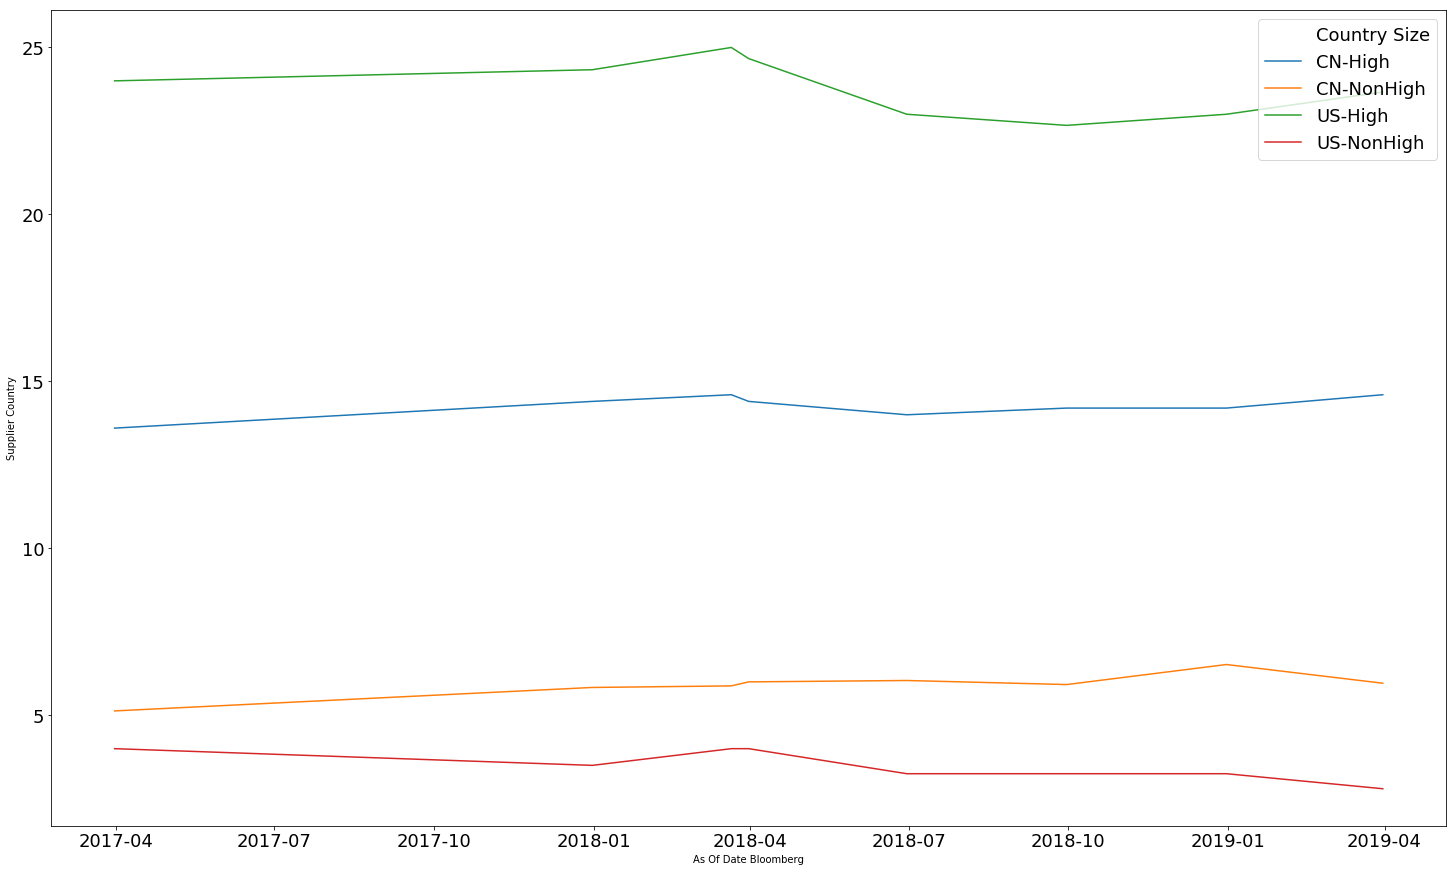

In [64]:
fig = plt.figure(figsize=(25,15))
ax = plt.axes()
sns.lineplot('As Of Date Bloomberg','Supplier Country',data= df_cty_cnt_avg,hue='Country Size')
plt.legend(fontsize=18)
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)

In [284]:
#financial data
df_fin_q_manu = pd.read_excel('Stock Financial Performance_Manufacturer.xlsx',sheet_name ='QoQ')
#df_fin_y = pd.read_excel('Stock financial performance_20190502.xlsx',sheet_name ='Y_data')
df_fin_q_manu = df_fin_q_manu.replace(to_replace=r'.N/A.', value=0, regex=True)
#df_fin_y = df_fin_y.replace(to_replace=r'.N/A.', value=0, regex=True)
df_fin_q_manu['End Date'] = pd.to_datetime(df_fin_q_manu['End Date'],format='%Y%m%d')
#df_fin_y['End Date'] = df_fin_y['End Date'].astype('object')

In [285]:
for i in range(len(df_fin_q_manu.columns)-2):
    df_fin_q_manu.iloc[:,i+2]=pd.to_numeric(df_fin_q_manu.iloc[:,i+2],errors='coerce')

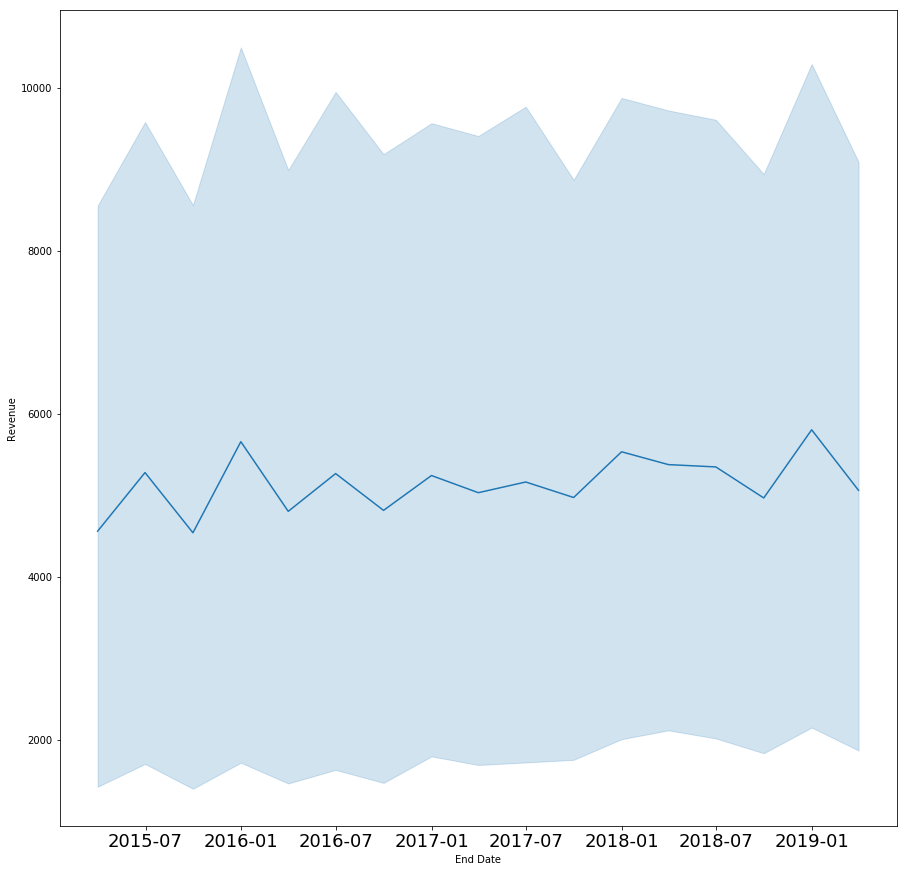

In [210]:
#Discover Seasonality
fig = plt.figure(figsize=(15,15))
sns.lineplot('End Date','Revenue',data= df_fin_q_manu)

In [286]:
df_fin_q_manu.columns

Index(['Stock Tickers Clean', 'End Date', 'Market_Cap', 'Last Price',
       'Long Term Debt', 'Short Term Debt', 'Total Equity', 'EBIT',
       'Interest Expense', 'Total Liabilities',
       'Net Income/Net Profit (Losses)', 'Free Cash Flow to Equity',
       'Free Cash Flow to Firm', 'Operating Expenses', 'Revenue',
       'Basic Earnings per Share',
       'Selling, General and Administrative Expense', 'R&D Expense',
       'Inventories', 'Gross Profit', 'Cost of Goods & Services Sold',
       'Cash From Operations', 'Return on Assets', 'Accounts Receivable - Net',
       'Accounts Payable'],
      dtype='object')

In [619]:
df_fin_q_manu['NI/R'] = df_fin_q_manu['Net Income/Net Profit (Losses)']/df_fin_q_manu['Revenue']
df_fin_q_manu['Gross Profit Margin'] = df_fin_q_manu['Gross Profit']/df_fin_q_manu['Revenue']
df_fin_q_manu['COGS/R']= df_fin_q_manu['Cost of Goods & Services Sold']/df_fin_q_manu['Revenue']
df_fin_q_manu['Inventory turnover']= df_fin_q_manu['Cost of Goods & Services Sold']/df_fin_q_manu['Inventories']
df_fin_q_manu['STD/L']= df_fin_q_manu['Short Term Debt']/df_fin_q_manu['Total Liabilities']
df_fin_q_manu['LTD/L']= df_fin_q_manu['Long Term Debt']/df_fin_q_manu['Total Liabilities']
df_fin_q_manu['D/E']= df_fin_q_manu['Total Liabilities']/df_fin_q_manu['Total Equity']
df_fin_q_manu

Stock Tickers Clean   End Date    Market_Cap  Last Price  Long Term Debt  \
0      000572 CH Equity 2015-03-31  5.397923e+08     1.16101          0.0000   
1      000572 CH Equity 2015-06-30  5.397923e+08     1.35355             NaN   
2      000572 CH Equity 2015-09-30  5.397923e+08     0.90596             NaN   
3      000572 CH Equity 2015-12-31  5.397923e+08     0.98651             NaN   
4      000572 CH Equity 2016-03-31  5.397923e+08     0.87095             NaN   
5      000572 CH Equity 2016-06-30  5.397923e+08     0.77990             NaN   
6      000572 CH Equity 2016-09-30  5.397923e+08     0.74404             NaN   
7      000572 CH Equity 2016-12-31  5.397923e+08     0.77237             NaN   
8      000572 CH Equity 2017-03-31  5.397923e+08     0.85786             NaN   
9      000572 CH Equity 2017-06-30  5.397923e+08     0.76422             NaN   
10     000572 CH Equity 2017-09-30  5.397923e+08     0.80936             NaN   
11     000572 CH Equity 2017-12-31  5.397923e+08     0.70389        135.3602   
12     000572 CH Equity 2018-03-31  5.397923e+08     0.64249         96.9445   
13     000572 CH Equity 2018-06-30  5.397923e+08     0.51782         54.7284   
14     000572 CH Equity 2018-09-30  5.397923e+08     0.39015         22.8102   
15     000572 CH Equity 2018-12-31  5.397923e+08     0.30967             NaN   
16     000572 CH Equity 2019-03-31  5.397923e+08     0.39183             NaN   
17     000800 CH Equity 2015-03-31  2.080400e+09     3.16053          0.0000   
18     000800 CH Equity 2015-06-30  2.080400e+09     4.01387             NaN   
19     000800 CH Equity 2015-09-30  2.080400e+09     2.28849             NaN   
20     000800 CH Equity 2015-12-31  2.080400e+09     2.52331             NaN   
21     000800 CH Equity 2016-03-31  2.080400e+09     2.18358             NaN   
22     000800 CH Equity 2016-06-30  2.080400e+09     1.63493             NaN   
23     000800 CH Equity 2016-09-30  2.080400e+09     1.57059             NaN   
24     000800 CH Equity 2016-12-31  2.080400e+09     1.56635             NaN   
25     000800 CH Equity 2017-03-31  2.080400e+09     1.70990             NaN   
26     000800 CH Equity 2017-06-30  2.080400e+09     1.50330             NaN   
27     000800 CH Equity 2017-09-30  2.080400e+09     2.07388             NaN   
28     000800 CH Equity 2017-12-31  2.080400e+09     1.65368             NaN   
29     000800 CH Equity 2018-03-31  2.080400e+09     1.62214             NaN   
..                  ...        ...           ...         ...             ...   
599       THO US Equity 2016-03-31  3.638044e+09         NaN          6.8210   
600       THO US Equity 2016-06-30  3.638044e+09    51.80000             NaN   
601       THO US Equity 2016-09-30  3.638044e+09         NaN          0.0000   
602       THO US Equity 2016-12-31  3.638044e+09    56.15000             NaN   
603       THO US Equity 2017-03-31  3.638044e+09    63.77000             NaN   
604       THO US Equity 2017-06-30  3.638044e+09         NaN             NaN   
605       THO US Equity 2017-09-30  3.638044e+09    64.74000        366.4730   
606       THO US Equity 2017-12-31  3.638044e+09    84.70000        340.0000   
607       THO US Equity 2018-03-31  3.638044e+09   100.05000        325.0000   
608       THO US Equity 2018-06-30  3.638044e+09    96.13000        295.0000   
609       THO US Equity 2018-09-30  3.638044e+09   104.52000        151.0950   
610       THO US Equity 2018-12-31  3.638044e+09   125.91000             NaN   
611       THO US Equity 2019-03-31  3.638044e+09   150.72000         90.0000   
612       WGO US Equity 2015-03-31  1.165932e+09         NaN          0.0000   
613       WGO US Equity 2015-06-30  1.165932e+09    21.26000             NaN   
614       WGO US Equity 2015-09-30  1.165932e+09         NaN             NaN   
615       WGO US Equity 2015-12-31  1.165932e+09    23.59000             NaN   
616       WGO US Equity 2016-03-31  1.165932e+09         NaN             NaN   
617 

In [288]:
#YoY Comparison
Rev_deseaonality = []
all_company_list = list(set(df_fin_q_manu['Stock Tickers Clean']))
all_company_list = sorted(all_company_list)
end_date_list = list(set(df_fin_q_manu['End Date']))
end_date_list = sorted(end_date_list)
for i in range(len(all_company_list)):
    for k in range(4):
        Rev_deseaonality.append(0)
    for j in range(len(end_date_list)-4):
        Rev_deseaonality.append((df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j+4])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['Revenue'].values[0]-df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['Revenue'].values[0])/df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['Revenue'].values[0])
df_fin_q_manu['Rev_YoY']=Rev_deseaonality

/Users/Saik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


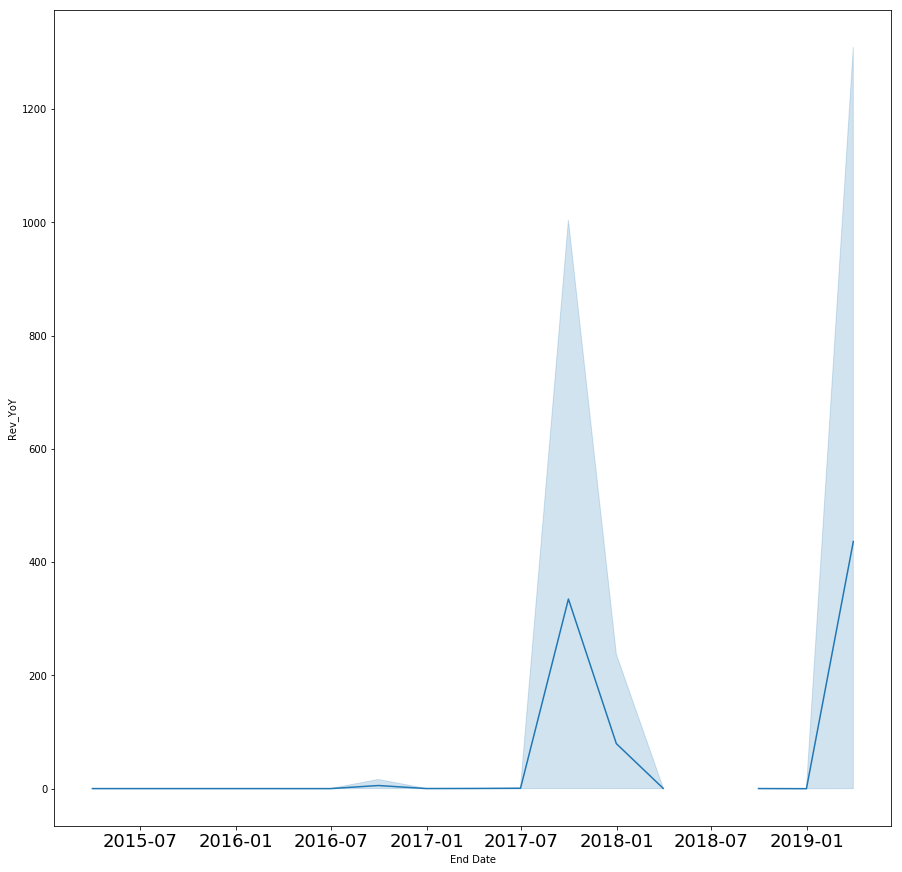

In [216]:
fig = plt.figure(figsize=(15,15))
sns.lineplot('End Date','Rev_YoY',data= df_fin_q_manu)

In [289]:
#Create QoQ 1 Q
Rev_QoQ=[]
for i in range(len(all_company_list)):
    for j in range(len(end_date_list)-1):
        Rev_QoQ.append((df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j+1])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['Rev_YoY'].values[0]))
    Rev_QoQ.append(0)
df_fin_q_manu['Rev_YoY_lag1']=Rev_QoQ

In [290]:
#Create Qo2Q
Rev_QoQ=[]
for i in range(len(all_company_list)):
    for j in range(len(end_date_list)-2):
        Rev_QoQ.append((df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j+2])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['Rev_YoY'].values[0]))
    Rev_QoQ.append(0)
    Rev_QoQ.append(0)
df_fin_q_manu['Rev_YoY_lag2']=Rev_QoQ

In [291]:
#Create Qo3Q
Rev_QoQ=[]
for i in range(len(all_company_list)):
    for j in range(len(end_date_list)-3):
        Rev_QoQ.append((df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j+3])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['Rev_YoY'].values[0]))
    Rev_QoQ.append(0)
    Rev_QoQ.append(0)
    Rev_QoQ.append(0)
df_fin_q_manu['Rev_YoY_lag3']=Rev_QoQ

In [292]:
#Create Qo4Q
Rev_QoQ=[]
for i in range(len(all_company_list)):
    for j in range(len(end_date_list)-4):
        Rev_QoQ.append((df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j+4])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['Rev_YoY'].values[0]))
    Rev_QoQ.append(0)
    Rev_QoQ.append(0)
    Rev_QoQ.append(0)
    Rev_QoQ.append(0)
df_fin_q_manu['Rev_YoY_lag4']=Rev_QoQ

In [293]:
df_fin_q_manu['End Date']= pd.to_datetime(df_fin_q_manu['End Date'],format="%Y%m%d")
df_fin_q_manu

Stock Tickers Clean   End Date    Market_Cap  Last Price  Long Term Debt  \
0      000572 CH Equity 2015-03-31  5.397923e+08     1.16101          0.0000   
1      000572 CH Equity 2015-06-30  5.397923e+08     1.35355             NaN   
2      000572 CH Equity 2015-09-30  5.397923e+08     0.90596             NaN   
3      000572 CH Equity 2015-12-31  5.397923e+08     0.98651             NaN   
4      000572 CH Equity 2016-03-31  5.397923e+08     0.87095             NaN   
5      000572 CH Equity 2016-06-30  5.397923e+08     0.77990             NaN   
6      000572 CH Equity 2016-09-30  5.397923e+08     0.74404             NaN   
7      000572 CH Equity 2016-12-31  5.397923e+08     0.77237             NaN   
8      000572 CH Equity 2017-03-31  5.397923e+08     0.85786             NaN   
9      000572 CH Equity 2017-06-30  5.397923e+08     0.76422             NaN   
10     000572 CH Equity 2017-09-30  5.397923e+08     0.80936             NaN   
11     000572 CH Equity 2017-12-31  5.397923e+08     0.70389        135.3602   
12     000572 CH Equity 2018-03-31  5.397923e+08     0.64249         96.9445   
13     000572 CH Equity 2018-06-30  5.397923e+08     0.51782         54.7284   
14     000572 CH Equity 2018-09-30  5.397923e+08     0.39015         22.8102   
15     000572 CH Equity 2018-12-31  5.397923e+08     0.30967             NaN   
16     000572 CH Equity 2019-03-31  5.397923e+08     0.39183             NaN   
17     000800 CH Equity 2015-03-31  2.080400e+09     3.16053          0.0000   
18     000800 CH Equity 2015-06-30  2.080400e+09     4.01387             NaN   
19     000800 CH Equity 2015-09-30  2.080400e+09     2.28849             NaN   
20     000800 CH Equity 2015-12-31  2.080400e+09     2.52331             NaN   
21     000800 CH Equity 2016-03-31  2.080400e+09     2.18358             NaN   
22     000800 CH Equity 2016-06-30  2.080400e+09     1.63493             NaN   
23     000800 CH Equity 2016-09-30  2.080400e+09     1.57059             NaN   
24     000800 CH Equity 2016-12-31  2.080400e+09     1.56635             NaN   
25     000800 CH Equity 2017-03-31  2.080400e+09     1.70990             NaN   
26     000800 CH Equity 2017-06-30  2.080400e+09     1.50330             NaN   
27     000800 CH Equity 2017-09-30  2.080400e+09     2.07388             NaN   
28     000800 CH Equity 2017-12-31  2.080400e+09     1.65368             NaN   
29     000800 CH Equity 2018-03-31  2.080400e+09     1.62214             NaN   
..                  ...        ...           ...         ...             ...   
599       THO US Equity 2016-03-31  3.638044e+09         NaN          6.8210   
600       THO US Equity 2016-06-30  3.638044e+09    51.80000             NaN   
601       THO US Equity 2016-09-30  3.638044e+09         NaN          0.0000   
602       THO US Equity 2016-12-31  3.638044e+09    56.15000             NaN   
603       THO US Equity 2017-03-31  3.638044e+09    63.77000             NaN   
604       THO US Equity 2017-06-30  3.638044e+09         NaN             NaN   
605       THO US Equity 2017-09-30  3.638044e+09    64.74000        366.4730   
606       THO US Equity 2017-12-31  3.638044e+09    84.70000        340.0000   
607       THO US Equity 2018-03-31  3.638044e+09   100.05000        325.0000   
608       THO US Equity 2018-06-30  3.638044e+09    96.13000        295.0000   
609       THO US Equity 2018-09-30  3.638044e+09   104.52000        151.0950   
610       THO US Equity 2018-12-31  3.638044e+09   125.91000             NaN   
611       THO US Equity 2019-03-31  3.638044e+09   150.72000         90.0000   
612       WGO US Equity 2015-03-31  1.165932e+09         NaN          0.0000   
613       WGO US Equity 2015-06-30  1.165932e+09    21.26000             NaN   
614       WGO US Equity 2015-09-30  1.165932e+09         NaN             NaN   
615       WGO US Equity 2015-12-31  1.165932e+09    23.59000             NaN   
616       WGO US Equity 2016-03-31  1.165932e+09         NaN             NaN   
617 

In [256]:
#Discover Seasonality
fig = plt.figure(figsize=(15,15))
sns.lineplot('End Date','Net Income',data= df_fin_q_manu,hue='Country')

ValueError: Could not interpret input 'Net Income'

<Figure size 1080x1080 with 0 Axes>

In [294]:
#Net Income
#Create QoQ 1 Q
NI_deseaonality = []
all_company_list = list(set(df_fin_q_manu['Stock Tickers Clean']))
all_company_list = sorted(all_company_list)
end_date_list = list(set(df_fin_q_manu['End Date']))
end_date_list = sorted(end_date_list)
for i in range(len(all_company_list)):
    for k in range(4):
        NI_deseaonality.append(0)
    for j in range(len(end_date_list)-4):
        NI_deseaonality.append((df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j+4])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['NI/R'].values[0]-df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['NI/R'].values[0])/df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['NI/R'].values[0])
df_fin_q_manu['NI/R_YoY']=NI_deseaonality
NI_Qo1Q=[]
NI_Qo2Q=[]
NI_Qo3Q=[]
NI_Qo4Q=[]
for i in range(len(all_company_list)):
    for j in range(len(end_date_list)-1):
        NI_Qo1Q.append((df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j+1])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['NI/R_YoY'].values[0]))
    for j in range(len(end_date_list)-2):  
        NI_Qo2Q.append((df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j+2])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['NI/R_YoY'].values[0]))
    for j in range(len(end_date_list)-3):    
        NI_Qo3Q.append((df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j+3])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['NI/R_YoY'].values[0]))
    for j in range(len(end_date_list)-4):    
        NI_Qo4Q.append((df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j+4])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['NI/R_YoY'].values[0]))
    NI_Qo4Q.append(0)
    NI_Qo4Q.append(0)
    NI_Qo4Q.append(0)
    NI_Qo4Q.append(0)
    NI_Qo3Q.append(0)
    NI_Qo3Q.append(0)
    NI_Qo3Q.append(0)
    NI_Qo1Q.append(0)
    NI_Qo2Q.append(0)
    NI_Qo2Q.append(0)
df_fin_q_manu['NI/R_YoY_lag1']=NI_Qo1Q
df_fin_q_manu['NI/R_YoY_lag2']=NI_Qo2Q
df_fin_q_manu['NI/R_YoY_lag3']=NI_Qo3Q
df_fin_q_manu['NI/R_YoY_lag4']=NI_Qo4Q

/Users/Saik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


In [620]:
#D/E
#Create QoQ 1 Q
GP_deseaonality = []
all_company_list = list(set(df_fin_q_manu['Stock Tickers Clean']))
all_company_list = sorted(all_company_list)
end_date_list = list(set(df_fin_q_manu['End Date']))
end_date_list = sorted(end_date_list)
for i in range(len(all_company_list)):
    for k in range(4):
        GP_deseaonality.append(0)
    for j in range(len(end_date_list)-4):
        GP_deseaonality.append((df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j+4])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['D/E'].values[0]-df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['D/E'].values[0])/df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['D/E'].values[0])
df_fin_q_manu['D_E_YoY']=GP_deseaonality
GP_Qo1Q=[]
GP_Qo2Q=[]
GP_Qo3Q=[]
GP_Qo4Q=[]
for i in range(len(all_company_list)):
    for j in range(len(end_date_list)-1):
        GP_Qo1Q.append((df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j+1])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['D_E_YoY'].values[0]))
    for j in range(len(end_date_list)-2):  
        GP_Qo2Q.append((df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j+2])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['D_E_YoY'].values[0]))
    for j in range(len(end_date_list)-3):    
        GP_Qo3Q.append((df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j+3])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['D_E_YoY'].values[0]))
    for j in range(len(end_date_list)-4):    
        GP_Qo4Q.append((df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j+4])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['D_E_YoY'].values[0]))
    GP_Qo4Q.append(0)
    GP_Qo4Q.append(0)
    GP_Qo4Q.append(0)
    GP_Qo4Q.append(0)
    GP_Qo3Q.append(0)
    GP_Qo3Q.append(0)
    GP_Qo3Q.append(0)
    GP_Qo1Q.append(0)
    GP_Qo2Q.append(0)
    GP_Qo2Q.append(0)
df_fin_q_manu['D_E_YoY_lag1']=GP_Qo1Q
df_fin_q_manu['D_E_YoY_lag2']=GP_Qo2Q
df_fin_q_manu['D_E_YoY_lag3']=GP_Qo3Q
df_fin_q_manu['D_E_YoY_lag4']=GP_Qo4Q

In [616]:
#Total Liabilities
#Create QoQ 1 Q
GP_deseaonality = []
all_company_list = list(set(df_fin_q_manu['Stock Tickers Clean']))
all_company_list = sorted(all_company_list)
end_date_list = list(set(df_fin_q_manu['End Date']))
end_date_list = sorted(end_date_list)
for i in range(len(all_company_list)):
    for k in range(4):
        GP_deseaonality.append(0)
    for j in range(len(end_date_list)-4):
        GP_deseaonality.append((df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j+4])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['Total Liabilities'].values[0]-df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['Total Liabilities'].values[0])/df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['Total Liabilities'].values[0])
df_fin_q_manu['Liabilities_YoY']=GP_deseaonality
GP_Qo1Q=[]
GP_Qo2Q=[]
GP_Qo3Q=[]
GP_Qo4Q=[]
for i in range(len(all_company_list)):
    for j in range(len(end_date_list)-1):
        GP_Qo1Q.append((df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j+1])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['Liabilities_YoY'].values[0]))
    for j in range(len(end_date_list)-2):  
        GP_Qo2Q.append((df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j+2])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['Liabilities_YoY'].values[0]))
    for j in range(len(end_date_list)-3):    
        GP_Qo3Q.append((df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j+3])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['Liabilities_YoY'].values[0]))
    for j in range(len(end_date_list)-4):    
        GP_Qo4Q.append((df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j+4])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['Liabilities_YoY'].values[0]))
    GP_Qo4Q.append(0)
    GP_Qo4Q.append(0)
    GP_Qo4Q.append(0)
    GP_Qo4Q.append(0)
    GP_Qo3Q.append(0)
    GP_Qo3Q.append(0)
    GP_Qo3Q.append(0)
    GP_Qo1Q.append(0)
    GP_Qo2Q.append(0)
    GP_Qo2Q.append(0)
df_fin_q_manu['Liabilities_YoY_lag1']=GP_Qo1Q
df_fin_q_manu['Liabilities_YoY_lag2']=GP_Qo2Q
df_fin_q_manu['Liabilities_YoY_lag3']=GP_Qo3Q
df_fin_q_manu['Liabilities_YoY_lag4']=GP_Qo4Q

In [295]:
#Gross_Profit_Margin
#Create QoQ 1 Q
GP_deseaonality = []
all_company_list = list(set(df_fin_q_manu['Stock Tickers Clean']))
all_company_list = sorted(all_company_list)
end_date_list = list(set(df_fin_q_manu['End Date']))
end_date_list = sorted(end_date_list)
for i in range(len(all_company_list)):
    for k in range(4):
        GP_deseaonality.append(0)
    for j in range(len(end_date_list)-4):
        GP_deseaonality.append((df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j+4])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['Gross Profit Margin'].values[0]-df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['Gross Profit Margin'].values[0])/df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['Gross Profit Margin'].values[0])
df_fin_q_manu['GPM_YoY']=GP_deseaonality
GP_Qo1Q=[]
GP_Qo2Q=[]
GP_Qo3Q=[]
GP_Qo4Q=[]
for i in range(len(all_company_list)):
    for j in range(len(end_date_list)-1):
        GP_Qo1Q.append((df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j+1])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['GPM_YoY'].values[0]))
    for j in range(len(end_date_list)-2):  
        GP_Qo2Q.append((df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j+2])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['GPM_YoY'].values[0]))
    for j in range(len(end_date_list)-3):    
        GP_Qo3Q.append((df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j+3])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['GPM_YoY'].values[0]))
    for j in range(len(end_date_list)-4):    
        GP_Qo4Q.append((df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j+4])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['GPM_YoY'].values[0]))
    GP_Qo4Q.append(0)
    GP_Qo4Q.append(0)
    GP_Qo4Q.append(0)
    GP_Qo4Q.append(0)
    GP_Qo3Q.append(0)
    GP_Qo3Q.append(0)
    GP_Qo3Q.append(0)
    GP_Qo1Q.append(0)
    GP_Qo2Q.append(0)
    GP_Qo2Q.append(0)
df_fin_q_manu['GPM_YoY_lag1']=GP_Qo1Q
df_fin_q_manu['GPM_YoY_lag2']=GP_Qo2Q
df_fin_q_manu['GPM_YoY_lag3']=GP_Qo3Q
df_fin_q_manu['GPM_YoY_lag4']=GP_Qo4Q

In [283]:
#Cash From Operation
#Create QoQ 1 Q
CFO_deseaonality = []
all_company_list = list(set(df_fin_q_manu['Stock Tickers Clean']))
all_company_list = sorted(all_company_list)
end_date_list = list(set(df_fin_q_manu['End Date']))
end_date_list = sorted(end_date_list)
for i in range(len(all_company_list)):
    for k in range(4):
        CFO_deseaonality.append(0)
    for j in range(len(end_date_list)-4):
        CFO_deseaonality.append(df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j+4])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['Cash from Operation'].values[0]-df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['Cash from Operation'].values[0])
df_fin_q_manu['CFO_deseaonality']=CFO_deseaonality
CFO_Qo1Q=[]
CFO_Qo2Q=[]
CFO_Qo3Q=[]
CFO_Qo4Q=[]
CFO_Qo5Q=[]
for i in range(len(all_company_list)):
    for j in range(len(end_date_list)-1):
        CFO_Qo1Q.append((df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j+1])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['CFO_deseaonality'].values[0]-df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['CFO_deseaonality'].values[0])/np.abs(df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['CFO_deseaonality'].values[0]))
    for j in range(len(end_date_list)-2):  
        CFO_Qo2Q.append((df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j+2])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['CFO_deseaonality'].values[0]-df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['CFO_deseaonality'].values[0])/np.abs(df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['CFO_deseaonality'].values[0]))
    for j in range(len(end_date_list)-3):    
        CFO_Qo3Q.append((df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j+3])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['CFO_deseaonality'].values[0]-df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['CFO_deseaonality'].values[0])/np.abs(df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['CFO_deseaonality'].values[0]))
    for j in range(len(end_date_list)-4):    
        CFO_Qo4Q.append((df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j+4])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['CFO_deseaonality'].values[0]-df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['CFO_deseaonality'].values[0])/np.abs(df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['CFO_deseaonality'].values[0]))
    for j in range(len(end_date_list)-5):   
        CFO_Qo5Q.append((df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j+5])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['CFO_deseaonality'].values[0]-df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['CFO_deseaonality'].values[0])/np.abs(df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['CFO_deseaonality'].values[0]))
    CFO_Qo5Q.append(0)
    CFO_Qo5Q.append(0)
    CFO_Qo5Q.append(0)
    CFO_Qo5Q.append(0)
    CFO_Qo5Q.append(0)
    CFO_Qo4Q.append(0)
    CFO_Qo4Q.append(0)
    CFO_Qo4Q.append(0)
    CFO_Qo4Q.append(0)
    CFO_Qo3Q.append(0)
    CFO_Qo3Q.append(0)
    CFO_Qo3Q.append(0)
    CFO_Qo1Q.append(0)
    CFO_Qo2Q.append(0)
    CFO_Qo2Q.append(0)
df_fin_q_manu['CFO_deseaonality_QoQ_1']=CFO_Qo1Q
df_fin_q_manu['CFO_deseaonality_QoQ_2']=CFO_Qo2Q
df_fin_q_manu['CFO_deseaonality_QoQ_3']=CFO_Qo3Q
df_fin_q_manu['CFO_deseaonality_QoQ_4']=CFO_Qo4Q
df_fin_q_manu['CFO_deseaonality_QoQ_5']=CFO_Qo5Q

KeyError: 'Cash from Operation'

In [296]:
#COGS/Revenue
#Create QoQ 1 Q
COGS_deseaonality = []
all_company_list = list(set(df_fin_q_manu['Stock Tickers Clean']))
all_company_list = sorted(all_company_list)
end_date_list = list(set(df_fin_q_manu['End Date']))
end_date_list = sorted(end_date_list)
for i in range(len(all_company_list)):
    for k in range(4):
        COGS_deseaonality.append(0)
    for j in range(len(end_date_list)-4):
        COGS_deseaonality.append((df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j+4])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['COGS/R'].values[0]-df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['COGS/R'].values[0])/df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['COGS/R'].values[0])
df_fin_q_manu['COGS/R_YoY']=COGS_deseaonality
COGS_Qo1Q=[]
COGS_Qo2Q=[]
COGS_Qo3Q=[]
COGS_Qo4Q=[]
for i in range(len(all_company_list)):
    for j in range(len(end_date_list)-1):
        COGS_Qo1Q.append((df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j+1])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['COGS/R_YoY'].values[0]))
    for j in range(len(end_date_list)-2):  
        COGS_Qo2Q.append((df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j+2])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['COGS/R_YoY'].values[0]))
    for j in range(len(end_date_list)-3):    
        COGS_Qo3Q.append((df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j+3])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['COGS/R_YoY'].values[0]))
    for j in range(len(end_date_list)-4):    
        COGS_Qo4Q.append((df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j+4])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['COGS/R_YoY'].values[0]))
    COGS_Qo4Q.append(0)
    COGS_Qo4Q.append(0)
    COGS_Qo4Q.append(0)
    COGS_Qo4Q.append(0)
    COGS_Qo3Q.append(0)
    COGS_Qo3Q.append(0)
    COGS_Qo3Q.append(0)
    COGS_Qo1Q.append(0)
    COGS_Qo2Q.append(0)
    COGS_Qo2Q.append(0)
df_fin_q_manu['COGS/R_YoY_lag1']=COGS_Qo1Q
df_fin_q_manu['COGS/R_YoY_lag2']=COGS_Qo2Q
df_fin_q_manu['COGS/R_YoY_lag3']=COGS_Qo3Q
df_fin_q_manu['COGS/R_YoY_lag4']=COGS_Qo4Q

In [297]:
for i in range(len(all_company_list)):
    for j in range(len(end_date_list)-1):
        print(all_company_list[i],j)
        df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j+1])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['IN_deseaonality'].values[0]
        print(df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['IN_deseaonality'].values[0])
        np.abs(df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['IN_deseaonality'].values[0])

000572 CH Equity 0


KeyError: 'IN_deseaonality'

In [298]:
#Inventory turnover
#Create QoQ 1 Q
IN_deseaonality = []
all_company_list = list(set(df_fin_q_manu['Stock Tickers Clean']))
all_company_list = sorted(all_company_list)
end_date_list = list(set(df_fin_q_manu['End Date']))
end_date_list = sorted(end_date_list)
for i in range(len(all_company_list)):
    for k in range(4):
        IN_deseaonality.append(0)
    for j in range(len(end_date_list)-4):
        IN_deseaonality.append((df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j+4])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['Inventory turnover'].values[0]-df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['Inventory turnover'].values[0])/df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['Inventory turnover'].values[0])
df_fin_q_manu['Inventory turnover_YoY']=IN_deseaonality
IN_Qo1Q=[]
IN_Qo2Q=[]
IN_Qo3Q=[]
IN_Qo4Q=[]
for i in range(len(all_company_list)):
    for j in range(len(end_date_list)-1):
        IN_Qo1Q.append((df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j+1])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['Inventory turnover_YoY'].values[0]))
    for j in range(len(end_date_list)-2):  
        IN_Qo2Q.append((df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j+2])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['Inventory turnover_YoY'].values[0]))
    for j in range(len(end_date_list)-3):    
        IN_Qo3Q.append((df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j+3])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['Inventory turnover_YoY'].values[0]))
    for j in range(len(end_date_list)-4):    
        IN_Qo4Q.append((df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j+4])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['Inventory turnover_YoY'].values[0]))
    IN_Qo4Q.append(0)
    IN_Qo4Q.append(0)
    IN_Qo4Q.append(0)
    IN_Qo4Q.append(0)
    IN_Qo3Q.append(0)
    IN_Qo3Q.append(0)
    IN_Qo3Q.append(0)
    IN_Qo1Q.append(0)
    IN_Qo2Q.append(0)
    IN_Qo2Q.append(0)
df_fin_q_manu['Inventory turnover_YoY_lag1']=IN_Qo1Q
df_fin_q_manu['Inventory turnover_YoY_lag2']=IN_Qo2Q
df_fin_q_manu['Inventory turnover_YoY_lag3']=IN_Qo3Q
df_fin_q_manu['Inventory turnover_YoY_lag4']=IN_Qo4Q

In [299]:
#Short term debt/L
#Create QoQ 1 Q
STD_deseaonality = []
all_company_list = list(set(df_fin_q_manu['Stock Tickers Clean']))
all_company_list = sorted(all_company_list)
end_date_list = list(set(df_fin_q_manu['End Date']))
end_date_list = sorted(end_date_list)
for i in range(len(all_company_list)):
    for k in range(4):
        STD_deseaonality.append(0)
    for j in range(len(end_date_list)-4):
        STD_deseaonality.append((df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j+4])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['STD/L'].values[0]-df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['STD/L'].values[0])/df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['STD/L'].values[0])
df_fin_q_manu['STD/L_YoY']=STD_deseaonality
STD_Qo1Q=[]
STD_Qo2Q=[]
STD_Qo3Q=[]
STD_Qo4Q=[]
for i in range(len(all_company_list)):
    for j in range(len(end_date_list)-1):
        STD_Qo1Q.append((df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j+1])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['STD/L_YoY'].values[0]))
    for j in range(len(end_date_list)-2):  
        STD_Qo2Q.append((df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j+2])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['STD/L_YoY'].values[0]))
    for j in range(len(end_date_list)-3):    
        STD_Qo3Q.append((df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j+3])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['STD/L_YoY'].values[0]))
    for j in range(len(end_date_list)-4):    
        STD_Qo4Q.append((df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j+4])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['STD/L_YoY'].values[0]))
    STD_Qo4Q.append(0)
    STD_Qo4Q.append(0)
    STD_Qo4Q.append(0)
    STD_Qo4Q.append(0)
    STD_Qo3Q.append(0)
    STD_Qo3Q.append(0)
    STD_Qo3Q.append(0)
    STD_Qo1Q.append(0)
    STD_Qo2Q.append(0)
    STD_Qo2Q.append(0)
df_fin_q_manu['STD/L_YoY_lag1']=STD_Qo1Q
df_fin_q_manu['STD/L_YoY_lag2']=STD_Qo2Q
df_fin_q_manu['STD/L_YoY_lag3']=STD_Qo3Q
df_fin_q_manu['STD/L_YoY_lag4']=STD_Qo4Q

/Users/Saik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':


In [300]:
#long term debt/L
#Create QoQ 1 Q
LTD_deseaonality = []
all_company_list = list(set(df_fin_q_manu['Stock Tickers Clean']))
all_company_list = sorted(all_company_list)
end_date_list = list(set(df_fin_q_manu['End Date']))
end_date_list = sorted(end_date_list)
for i in range(len(all_company_list)):
    for k in range(4):
        LTD_deseaonality.append(0)
    for j in range(len(end_date_list)-4):
        LTD_deseaonality.append((df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j+4])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['LTD/L'].values[0]-df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['LTD/L'].values[0])/df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['LTD/L'].values[0])
df_fin_q_manu['LTD/L_YoY']=LTD_deseaonality
LTD_Qo1Q=[]
LTD_Qo2Q=[]
LTD_Qo3Q=[]
LTD_Qo4Q=[]
for i in range(len(all_company_list)):
    for j in range(len(end_date_list)-1):
        LTD_Qo1Q.append((df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j+1])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['LTD/L_YoY'].values[0]))
    for j in range(len(end_date_list)-2):  
        LTD_Qo2Q.append((df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j+2])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['LTD/L_YoY'].values[0]))
    for j in range(len(end_date_list)-3):    
        LTD_Qo3Q.append((df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j+3])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['LTD/L_YoY'].values[0]))
    for j in range(len(end_date_list)-4):    
        LTD_Qo4Q.append((df_fin_q_manu[(df_fin_q_manu['End Date']==end_date_list[j+4])&(df_fin_q_manu['Stock Tickers Clean']==all_company_list[i])]['LTD/L_YoY'].values[0]))
    LTD_Qo4Q.append(0)
    LTD_Qo4Q.append(0)
    LTD_Qo4Q.append(0)
    LTD_Qo4Q.append(0)
    LTD_Qo3Q.append(0)
    LTD_Qo3Q.append(0)
    LTD_Qo3Q.append(0)
    LTD_Qo1Q.append(0)
    LTD_Qo2Q.append(0)
    LTD_Qo2Q.append(0)
df_fin_q_manu['LTD/L_YoY_lag1']=LTD_Qo1Q
df_fin_q_manu['LTD/L_YoY_lag2']=LTD_Qo2Q
df_fin_q_manu['LTD/L_YoY_lag3']=LTD_Qo3Q
df_fin_q_manu['LTD/L_YoY_lag4']=LTD_Qo4Q

/Users/Saik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/Users/Saik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':


In [539]:
#Number of countries
df_num_of_countries = pd.pivot_table(df_Suppliers,index=['Central Ticker','As Of Date Bloomberg']
                      ,values=['Supplier Country'],aggfunc={'Supplier Country':lambda x: len(x.unique())})
df_num_of_countries.reset_index(inplace=True)
df_num_of_countries.columns=['Central Ticker','As Of Date Bloomberg','Number_of_supplier_countries']
df_num_of_countries['As Of Date Bloomberg']=pd.to_datetime(df_num_of_countries['As Of Date Bloomberg'],format='%Y%m%d')

In [540]:
#of suppliers
df_num_of_suppliers = pd.pivot_table(df_Suppliers,index=['Central Ticker','As Of Date Bloomberg']
                      ,values=['Supplier Ticker'],aggfunc={'Supplier Ticker':lambda x: len(x.unique())})
df_num_of_suppliers.reset_index(inplace=True)
df_num_of_suppliers.columns=['Central Ticker','As Of Date Bloomberg','Number_of_suppliers']
df_num_of_suppliers['As Of Date Bloomberg']=pd.to_datetime(df_num_of_suppliers['As Of Date Bloomberg'],format='%Y%m%d')

In [303]:
df_exposure = df_su_group2[['Central Ticker','As Of Date Bloomberg','%Cost_Exposure','portion of total relationship value']]
df_exposure.columns = ['Central Ticker','As Of Date Bloomberg','%Cost_Exposure','RV_Exposure']

In [304]:
df_fin_q_manu.columns

Index(['Stock Tickers Clean', 'End Date', 'Market_Cap', 'Last Price',
       'Long Term Debt', 'Short Term Debt', 'Total Equity', 'EBIT',
       'Interest Expense', 'Total Liabilities',
       'Net Income/Net Profit (Losses)', 'Free Cash Flow to Equity',
       'Free Cash Flow to Firm', 'Operating Expenses', 'Revenue',
       'Basic Earnings per Share',
       'Selling, General and Administrative Expense', 'R&D Expense',
       'Inventories', 'Gross Profit', 'Cost of Goods & Services Sold',
       'Cash From Operations', 'Return on Assets', 'Accounts Receivable - Net',
       'Accounts Payable', 'NI/R', 'Gross Profit Margin', 'COGS/R',
       'Inventory turnover', 'STD/L', 'LTD/L', 'Rev_YoY', 'Rev_YoY_lag1',
       'Rev_YoY_lag2', 'Rev_YoY_lag3', 'Rev_YoY_lag4', 'NI/R_YoY',
       'NI/R_YoY_lag1', 'NI/R_YoY_lag2', 'NI/R_YoY_lag3', 'NI/R_YoY_lag4',
       'GPM_YoY', 'GPM_YoY_lag1', 'GPM_YoY_lag2', 'GPM_YoY_lag3',
       'GPM_YoY_lag4', 'COGS/R_YoY', 'COGS/R_YoY_lag1', 'COGS/R_YoY_lag2',

In [541]:
#US CN Degree
cn_degree = pd.melt(df_cnus_deg_ct_cty_cn,id_vars=["Central Ticker", "Central Country"], 
                  var_name="As Of Date Bloomberg", value_name="CN_Degree")
cn_degree['As Of Date Bloomberg']=pd.to_datetime(cn_degree['As Of Date Bloomberg'],format="%Y%m%d")
us_degree = pd.melt(df_cnus_deg_ct_cty_us,id_vars=["Central Ticker", "Central Country"], 
                  var_name="As Of Date Bloomberg", value_name="US_Degree")
us_degree['As Of Date Bloomberg']=pd.to_datetime(us_degree['As Of Date Bloomberg'],format="%Y%m%d")
us_degree

Central Ticker Central Country As Of Date Bloomberg  US_Degree
0    000572 CH Equity              CN           2017-03-31   0.111111
1    000800 CH Equity              CN           2017-03-31   0.210526
2    000913 CH Equity              CN           2017-03-31   0.000000
3    000927 CH Equity              CN           2017-03-31   0.047619
4    000980 CH Equity              CN           2017-03-31   0.000000
5      1122 HK Equity              CN           2017-03-31   0.000000
6      1188 HK Equity              US           2017-03-31        NaN
7      1211 HK Equity              CN           2017-03-31   0.276596
8       175 HK Equity              CN           2017-03-31   0.197183
9      1958 HK Equity              CN           2017-03-31   0.285714
10   200054 CH Equity              CN           2017-03-31   0.000000
11   200550 CH Equity              CN           2017-03-31   0.139535
12   200625 CH Equity              CN           2017-03-31   0.121622
13     2238 HK Equity              CN           2017-03-31   0.185185
14     2333 HK Equity              CN           2017-03-31   0.209302
15      476 HK Equity              CN           2017-03-31   0.000000
16      489 HK Equity              CN           2017-03-31   0.240000
17   600006 CH Equity              CN           2017-03-31   0.049180
18   600099 CH Equity              CN           2017-03-31   0.000000
19   600104 CH Equity              CN           2017-03-31   0.317460
20   600166 CH Equity              CN           2017-03-31   0.163636
21   600303 CH Equity              CN           2017-03-31   0.000000
22   600418 CH Equity              CN           2017-03-31   0.111111
23   600609 CH Equity              CN           2017-03-31   0.153846
24   600733 CH Equity              CN           2017-03-31        NaN
25   600877 CH Equity              CN           2017-03-31   0.000000
26   601127 CH Equity              CN           2017-03-31   0.000000
27   601777 CH Equity              CN           2017-03-31   0.200000
28   601965 CH Equity              CN           2017-03-31   0.000000
29   603611 CH Equity              CN           2017-03-31        NaN
..                ...             ...                  ...        ...
290  200054 CH Equity              CN           2019-03-31   0.000000
291  200550 CH Equity              CN           2019-03-31   0.218750
292  200625 CH Equity              CN           2019-03-31   0.206897
293    2238 HK Equity              CN           2019-03-31   0.212121
294    2333 HK Equity              CN           2019-03-31   0.255814
295     476 HK Equity              CN           2019-03-31        NaN
296     489 HK Equity              CN           2019-03-31   0.264151
297  600006 CH Equity              CN           2019-03-31   0.111111
298  600099 CH Equity              CN           2019-03-31   0.000000
299  600104 CH Equity              CN           2019-03-31   0.311475
300  600166 CH Equity              CN           2019-03-31   0.250000
301  600303 CH Equity              CN           2019-03-31        NaN
302  600418 CH Equity              CN           2019-03-31   0.157895
303  600609 CH Equity              CN           2019-03-31   0.181818
304  600733 CH Equity              CN           2019-03-31   0.000000
305  600877 CH Equity              CN           2019-03-31   0.000000
306  601127 CH Equity              CN           2019-03-31   0.142857
307  601777 CH Equity              CN           2019-03-31   0.285714
308  601965 CH Equity              CN           2019-03-31   0.000000
309  603611 CH Equity              CN           2019-03-31   0.000000
310  603766 CH Equity              CN           2019-03-31   0.142857
311       F US Equity              US           2019-03-31   0.376068
312     FUV US Equity              US           2019-03-31   1.000000
313      GM US Equity              US           2019-03-31   0.338521
314     HOG US Equity              US           2019-03-31   0.366667
315     NIO US Eq

In [621]:
df_bivariate_analysis = pd.merge(df_fin_q_manu,cn_degree,left_on=['Stock Tickers Clean','End Date'],right_on=['Central Ticker','As Of Date Bloomberg'])
df_bivariate_analysis = pd.merge(df_bivariate_analysis,us_degree[['Central Ticker','As Of Date Bloomberg','US_Degree']],left_on=['Central Ticker','As Of Date Bloomberg'],right_on=['Central Ticker','As Of Date Bloomberg'])
df_bivariate_analysis = pd.merge(df_bivariate_analysis,df_num_of_suppliers,left_on=['Central Ticker','As Of Date Bloomberg'],right_on=['Central Ticker','As Of Date Bloomberg'])
df_bivariate_analysis = pd.merge(df_bivariate_analysis,df_num_of_countries,left_on=['Central Ticker','As Of Date Bloomberg'],right_on=['Central Ticker','As Of Date Bloomberg'])
df_bivariate_analysis = pd.merge(df_bivariate_analysis,df_DSC_cnt,left_on=['Central Ticker','End Date'],right_on=['Central Ticker','End Date'],how='left')
df_bivariate_analysis

Stock Tickers Clean   End Date    Market_Cap  Last Price  Long Term Debt  \
0      000572 CH Equity 2017-03-31  5.397923e+08     0.85786             NaN   
1      000572 CH Equity 2017-12-31  5.397923e+08     0.70389        135.3602   
2      000572 CH Equity 2018-03-31  5.397923e+08     0.64249         96.9445   
3      000572 CH Equity 2018-06-30  5.397923e+08     0.51782         54.7284   
4      000572 CH Equity 2018-09-30  5.397923e+08     0.39015         22.8102   
5      000572 CH Equity 2018-12-31  5.397923e+08     0.30967             NaN   
6      000572 CH Equity 2019-03-31  5.397923e+08     0.39183             NaN   
7      000800 CH Equity 2017-03-31  2.080400e+09     1.70990             NaN   
8      000800 CH Equity 2017-12-31  2.080400e+09     1.65368             NaN   
9      000800 CH Equity 2018-03-31  2.080400e+09     1.62214             NaN   
10     000800 CH Equity 2018-06-30  2.080400e+09     1.12924             NaN   
11     000800 CH Equity 2018-09-30  2.080400e+09     0.95937             NaN   
12     000800 CH Equity 2018-12-31  2.080400e+09     0.96246             NaN   
13     000800 CH Equity 2019-03-31  2.080400e+09     1.25743             NaN   
14     600418 CH Equity 2017-03-31  1.667406e+09         NaN        375.5278   
15     600418 CH Equity 2017-12-31  1.667406e+09     1.45389        419.5458   
16     600418 CH Equity 2018-03-31  1.667406e+09     1.22774        691.1896   
17     600418 CH Equity 2018-06-30  1.667406e+09     0.98280        697.3233   
18     600418 CH Equity 2018-09-30  1.667406e+09     0.75992        676.0711   
19     600418 CH Equity 2018-12-31  1.667406e+09         NaN        710.8610   
20     600418 CH Equity 2019-03-31  1.667406e+09     0.75684        844.0000   
21     000913 CH Equity 2017-03-31  6.742335e+08     2.56630          4.6582   
22     000913 CH Equity 2017-12-31  6.742335e+08     3.05839          2.0937   
23     000913 CH Equity 2018-03-31  6.742335e+08     2.56043          0.9765   
24     000913 CH Equity 2018-06-30  6.742335e+08     1.88107          0.4250   
25     000913 CH Equity 2018-09-30  6.742335e+08     1.33642          0.1765   
26     000913 CH Equity 2018-12-31  6.742335e+08     1.33174             NaN   
27     000913 CH Equity 2019-03-31  6.742335e+08     1.77292             NaN   
28     000927 CH Equity 2017-03-31  1.184520e+09     1.12539          0.0000   
29     000927 CH Equity 2017-12-31  1.184520e+09     0.70235         40.4806   
..                  ...        ...           ...         ...             ...   
180    600166 CH Equity 2018-06-30  2.664717e+09     0.30647       1345.4445   
181    600166 CH Equity 2018-09-30  2.664717e+09     0.27223       1100.3120   
182    600166 CH Equity 2018-12-31  2.664717e+09     0.26460        918.0146   
183    600166 CH Equity 2019-03-31  2.664717e+09     0.34862        959.6175   
184    000980 CH Equity 2017-03-31  1.653234e+09     2.26242          0.0775   
185    000980 CH Equity 2017-12-31  1.653234e+09     1.83503        125.5659   
186    000980 CH Equity 2018-03-31  1.653234e+09     1.56011        104.3257   
187    000980 CH Equity 2018-06-30  1.653234e+09     1.07339        104.6399   
188    000980 CH Equity 2018-09-30  1.653234e+09     0.77739         52.1175   
189    000980 CH Equity 2018-12-31  1.653234e+09     0.62953         17.2683   
190    000980 CH Equity 2019-03-31  1.653234e+09     0.78217             NaN   
191    603611 CH Equity 2017-12-31  7.362320e+08     2.30971             NaN   
192    603611 CH Equity 2018-06-30  7.362320e+08     2.16338             NaN   
193    603611 CH Equity 2018-09-30  7.362320e+08     1.96532             NaN   
194    603611 CH Equity 2018-12-31  7.362320e+08     1.78535             NaN   
195    603611 CH Equity 2019-03-31  7.362320e+08     2.59680             NaN   
196       THO US Equity 2017-03-31  3.638044e+09    63.77000             NaN   
197       THO US Equity 2017-12-31  3.638044e+09    84.70000        340.0000   
198 

In [622]:
df_bivariate_analysis['Opposite_Country_Degree'] = np.where(df_bivariate_analysis['Central Country']=='CN',df_bivariate_analysis['US_Degree'] , df_bivariate_analysis['CN_Degree'])
df_bivariate_analysis.to_excel('trade_war_analysis.xlsx',sheet_name='Data',index=False)


In [492]:
df_bivariate_analysis.columns

Index([                        'Stock Tickers Clean',
                                          'End Date',
                                        'Market_Cap',
                                        'Last Price',
                                    'Long Term Debt',
                                   'Short Term Debt',
                                      'Total Equity',
                                              'EBIT',
                                  'Interest Expense',
                                 'Total Liabilities',
                    'Net Income/Net Profit (Losses)',
                          'Free Cash Flow to Equity',
                            'Free Cash Flow to Firm',
                                'Operating Expenses',
                                           'Revenue',
                          'Basic Earnings per Share',
       'Selling, General and Administrative Expense',
                                       'R&D Expense',
                            

In [545]:
test_df.to_json('trade_war_analysis_revenue.json',orient='records',date_format='iso')

In [546]:
df_bivariate_analysis.to_json('trade_war_analysis.json',orient='records',date_format='iso')

# YoY Financial

In [317]:
#financial data
df_fin_y_manu = pd.read_excel('Stock Financial Performance_Manufacturer.xlsx',sheet_name ='YoY')
df_fin_y_manu = df_fin_y_manu.replace(to_replace=r'.N/A.', value=0, regex=True)
df_fin_y_manu['End Date'] = pd.to_datetime(df_fin_y_manu['End Date'],format='%Y%m%d')
for i in range(len(df_fin_y_manu.columns)-8):
    df_fin_y_manu.iloc[:,i+8]=pd.to_numeric(df_fin_y_manu.iloc[:,i+8],errors='coerce')

In [318]:
df_fin_y_manu.dtypes

Stock Tickers Clean            object
COUNTRY                        object
LONG_COMP_NAME                 object
Type                           object
Market Cap                    float64
Start Date             datetime64[ns]
End Date               datetime64[ns]
Operating Expense             float64
Revenue                       float64
EPS                           float64
SG&A Expense                  float64
R&D Expense                   float64
Inventories                   float64
Gross Profit                  float64
COGS                          float64
Cash from Operation           float64
ROA                           float64
dtype: object

In [319]:
df_fin_y_manu['Gross Profit Margin'] = df_fin_y_manu['Gross Profit']/df_fin_y_manu['Revenue']
df_fin_y_manu['COGS/R']= df_fin_y_manu['COGS']/df_fin_y_manu['Revenue']
df_fin_y_manu['Operating Expense %']= df_fin_y_manu['Operating Expense']/df_fin_y_manu['Revenue']
df_fin_y_manu['Inventory turnover']= df_fin_y_manu['COGS']/df_fin_y_manu['Inventories']
df_fin_y_manu.head()

Stock Tickers Clean COUNTRY                           LONG_COMP_NAME  \
0         F US Equity      US                            Ford Motor Co   
1    200550 CH Equity      CH                Jiangling Motors Corp Ltd   
2    600006 CH Equity      CH               DongFeng Automobile Co Ltd   
3    200054 CH Equity      CH  Chongqing Jianshe Vehicle System Co Ltd   
4    200625 CH Equity      CH      Chongqing Changan Automobile Co Ltd   

           Type    Market Cap Start Date   End Date  Operating Expense  \
0  manufacturer  3.722221e+10 2018-04-01 2019-03-31       11527.000000   
1  manufacturer  3.059945e+09 2018-04-01 2019-03-31         810.131917   
2  manufacturer  2.043539e+09 2018-04-01 2019-03-31         344.650115   
3  manufacturer  1.338520e+08 2018-04-01 2019-03-31          17.258020   
4  manufacturer  7.018793e+09 2018-04-01 2019-03-31        1402.673541   

         Revenue       EPS         ...          R&D Expense   Inventories  \
0  156776.000000  1.940000         ...          8000.000000  11176.000000   
1    4500.497470  0.118517         ...           304.402152    359.522388   
2    2678.311716  0.014874         ...            90.540308    252.304428   
3     148.235614  0.017778         ...             5.193624     27.081962   
4   11398.107574  0.220738         ...           537.986534    717.135172   

   Gross Profit           COGS  Cash from Operation       ROA  \
0  16408.000000  140368.000000         18096.000000  3.114532   
1    790.159877    3710.337592           101.490681  2.716083   
2    257.139900    2421.171816            88.371233  1.021595   
3     24.143313     124.092302             6.422122  1.004700   
4   1122.230415   10275.877159          1108.635983  6.713114   

   Gross Profit Margin    COGS/R  Operating Expense %  Inventory turnover  
0             0.104659  0.895341             0.073525           12.559771  
1             0.175572  0.824428             0.180009           10.320185  
2             0.096008  0.903992             0.128682            9.596232  
3             0.162871  0.837129             0.116423            4.582102  
4             0.098458  0.901542             0.123062           14.329066  

[5 rows x 21 columns]

In [327]:
df_bivariate_analysis_y = pd.merge(df_fin_y_manu,cn_degree[['Central Ticker','As Of Date Bloomberg','CN_Degree']],how='left',left_on=['Stock Tickers Clean','End Date'],right_on=['Central Ticker','As Of Date Bloomberg'])
df_bivariate_analysis_y = pd.merge(df_bivariate_analysis_y,us_degree[['Central Ticker','As Of Date Bloomberg','US_Degree']],how='left',left_on=['Central Ticker','As Of Date Bloomberg'],right_on=['Central Ticker','As Of Date Bloomberg'])
df_bivariate_analysis_y = pd.merge(df_bivariate_analysis_y,df_num_of_suppliers,left_on=['Central Ticker','As Of Date Bloomberg'],how='left',right_on=['Central Ticker','As Of Date Bloomberg'])
df_bivariate_analysis_y = pd.merge(df_bivariate_analysis_y,df_num_of_countries,left_on=['Central Ticker','As Of Date Bloomberg'],how='left',right_on=['Central Ticker','As Of Date Bloomberg'])
#df_bivariate_analysis = pd.merge(df_bivariate_analysis,df_DSC_real,left_on=['Central Ticker','As Of Date Bloomberg'],right_on=['Central Ticker','As Of Date Bloomberg'],how='left')
df_bivariate_analysis_y['Opposite_Country_Degree'] = np.where(df_bivariate_analysis_y['COUNTRY']=='CN',df_bivariate_analysis_y['US_Degree'] , df_bivariate_analysis_y['CN_Degree'])
df_bivariate_analysis_y

Stock Tickers Clean COUNTRY  \
0           F US Equity      US   
1      200550 CH Equity      CH   
2      600006 CH Equity      CH   
3      200054 CH Equity      CH   
4      200625 CH Equity      CH   
5      600418 CH Equity      CH   
6      000927 CH Equity      CH   
7         VOW GR Equity      GE   
8      000800 CH Equity      CH   
9      601127 CH Equity      CH   
10     600609 CH Equity      CH   
11       FCAU US Equity      GB   
12        489 HK Equity      CH   
13       7201 JP Equity      JN   
14       7267 JP Equity      JN   
15     603766 CH Equity      CH   
16     601777 CH Equity      US   
17     600099 CH Equity      CH   
18     000572 CH Equity      CH   
19        HOG US Equity      US   
20       2238 HK Equity      CH   
21         GM US Equity      US   
22       1114 HK Equity      HK   
23     600104 CH Equity      CH   
24       1211 HK Equity      CH   
25        175 HK Equity      CH   
26       2333 HK Equity      CH   
27       1958 HK Equity      CH   
28       TSLA US Equity      US   
29       RACE US Equity      IT   
..                  ...     ...   
170    600609 CH Equity      CH   
171      FCAU US Equity      GB   
172       489 HK Equity      CH   
173      7201 JP Equity      JN   
174      7267 JP Equity      JN   
175    603766 CH Equity      CH   
176    601777 CH Equity      US   
177    600099 CH Equity      CH   
178    000572 CH Equity      CH   
179       HOG US Equity      US   
180      2238 HK Equity      CH   
181        GM US Equity      US   
182      1114 HK Equity      HK   
183    600104 CH Equity      CH   
184      1211 HK Equity      CH   
185       175 HK Equity      CH   
186      2333 HK Equity      CH   
187      1958 HK Equity      CH   
188      TSLA US Equity      US   
189      RACE US Equity      IT   
190    000913 CH Equity      CH   
191       NIO US Equity      CH   
192    600877 CH Equity      CH   
193       729 HK Equity      HK   
194       422 HK Equity      HK   
195       FUV US Equity      US   
196      ZAAP US Equity      US   
197      ELIO US Equity      US   
198    601965 CH Equity      CH   
199    600733 CH Equity      CH   

                                        LONG_COMP_NAME          Type  \
0                                        Ford Motor Co  manufacturer   
1                            Jiangling Motors Corp Ltd  manufacturer   
2                           DongFeng Automobile Co Ltd  manufacturer   
3              Chongqing Jianshe Vehicle System Co Ltd  manufacturer   
4                  Chongqing Changan Automobile Co Ltd  manufacturer   
5            Anhui Jianghuai Automobile Group Corp Ltd  manufacturer   
6                  Tianjin Faw Xiali Automobile Co Ltd  manufacturer   
7                                        Volkswagen AG  manufacturer   
8                                       FAW CAR Co Ltd  manufacturer   
9                Chongqing Sokon Industry Group Co Ltd  manufacturer   
10                   Shenyang Jinbei Automotive Co Ltd  manufacturer   
11                        Fiat Chrysler Automobiles NV  manufacturer   
12                         Dongfeng Motor Group Co Ltd  manufacturer   
13                                 Nissan Motor Co Ltd  manufacturer   
14                                  Honda Motor Co Ltd  manufacturer   
15                                 Loncin Motor Co Ltd  manufacturer   
16                         Lifan Industry Group Co Ltd  manufacturer   
17                                       Linhai Co Ltd  manufacturer   
18                       Haima Automobile Group Co Ltd  manufacturer   
19                                 Harley-Davidson Inc  manufacturer   
20                   Guangzhou Automobile Group Co Ltd  manufacturer   
21                                   General Motors Co  manufacturer   
22            Brilliance China Automotive Holdings Ltd  manufacturer   
23                                 SAIC Motor Corp Ltd  manufacturer   
24                               

In [328]:
df_bivariate_analysis_y.to_excel('trade_war_analysis_YoY.xlsx',sheet_name='Data',index=False)

## Exposure Score Analysis

In [139]:
df_bivariate_analysis_cn = df_bivariate_analysis[(df_bivariate_analysis['Country']=='CN')&(df_bivariate_analysis['Stock Tickers Clean']!='600733 CH Equity')]
df_bivariate_analysis_us = df_bivariate_analysis[df_bivariate_analysis['Country']=='US']
df_bivariate_analysis.columns

Index(['Stock Tickers Clean', 'Company Name', 'Country', 'Type', 'End Date',
       'Uni', 'Last Price', 'long term debt', 'short term debt',
       'Total equity', 'EBIT', 'Interest Expense', 'total liabilities',
       'Net Income', 'FCFE', 'FCFF', 'Operating Expense', 'Revenue', 'EPS',
       'SG&A Expense', 'R&D Expense', 'Inventories', 'Gross Profit', 'COGS',
       'Cash from Operation', 'ROA', 'Account Receivables', 'Account Payable',
       'Rev_deseaonality', 'Rev_deseaonality_QoQ_1', 'Rev_deseaonality_QoQ_2',
       'Rev_deseaonality_QoQ3', 'Rev_deseaonality_QoQ_4',
       'Rev_deseaonality_QoQ_5', 'NI_QoQ_1', 'NI_QoQ_2', 'NI_QoQ_3',
       'NI_QoQ_4', 'NI_QoQ_5', 'NI_deseaonality', 'NI_deseaonality_QoQ_1',
       'NI_deseaonality_QoQ_2', 'NI_deseaonality_QoQ_3',
       'NI_deseaonality_QoQ_4', 'NI_deseaonality_QoQ_5', 'GP_deseaonality',
       'GP_deseaonality_QoQ_1', 'GP_deseaonality_QoQ_2',
       'GP_deseaonality_QoQ_3', 'GP_deseaonality_QoQ_4',
       'GP_deseaonality_Qo

In [513]:
df_bivariate_analysis[df_bivariate_analysis['20171231']==1][['Tickers','End_Date','GPM_YoY']]

Tickers   End_Date    GPM_YoY
111  601965 CH Equity 2019-03-31   0.242428
126  600733 CH Equity 2018-03-31  -3.079033
127  600733 CH Equity 2018-06-30  -1.078158
128  600733 CH Equity 2018-09-30   0.161810
129  600733 CH Equity 2018-12-31 -21.597385
130  600733 CH Equity 2019-03-31   0.592222
138  601777 CH Equity 2017-03-31  -0.266630
165     NIO US Equity 2018-09-30        NaN
166     NIO US Equity 2018-12-31        NaN

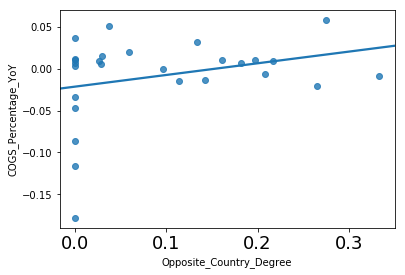

In [341]:
sns.regplot(y='COGS_Percentage_YoY', x='Opposite_Country_Degree', data=df_bivariate_analysis[df_bivariate_analysis['End_Date']=='2018-09-30'],ci=None)

In [496]:
df_bivariate_analysis.columns

Index(['Tickers', 'End_Date', 'Market_Cap', 'Last_Price', 'Long_Term_Debt',
       'Short_Term_Debt', 'Total_Equity', 'EBIT', 'Interest_Expense',
       'Total_Liabilities', 'Net_Income', 'FCFE', 'FCFF', 'Operating_Expenses',
       'Revenue', 'BEPS', 'SGAE', 'RD_Exp', 'Inventories', 'Gross_Profit',
       'COGS', 'CFO', 'ROA', 'Accounts_Receivable', 'Accounts_Payable',
       'Profit_Margin', 'Gross_Profit_Margin', 'COGS_Percentage',
       'Inventory_turnover', 'STD_Percentage', 'LTD_Percentage', 'Rev_YoY',
       'Rev_YoY_lag1', 'Rev_YoY_lag2', 'Rev_YoY_lag3', 'Rev_YoY_lag4',
       'Profit_Margin_YoY', 'Profit_Margin_YoY_lag1', 'Profit_Margin_YoY_lag2',
       'Profit_Margin_YoY_lag3', 'Profit_Margin_YoY_lag4', 'GPM_YoY',
       'GPM_YoY_lag1', 'GPM_YoY_lag2', 'GPM_YoY_lag3', 'GPM_YoY_lag4',
       'COGS_Percentage_YoY', 'COGS_Percentage_YoY_lag1',
       'COGS_Percentage_YoY_lag2', 'COGS_Percentage_YoY_lag3',
       'COGS_Percentage_YoY_lag4', 'Inventory_turnover_YoY',
       'Inv

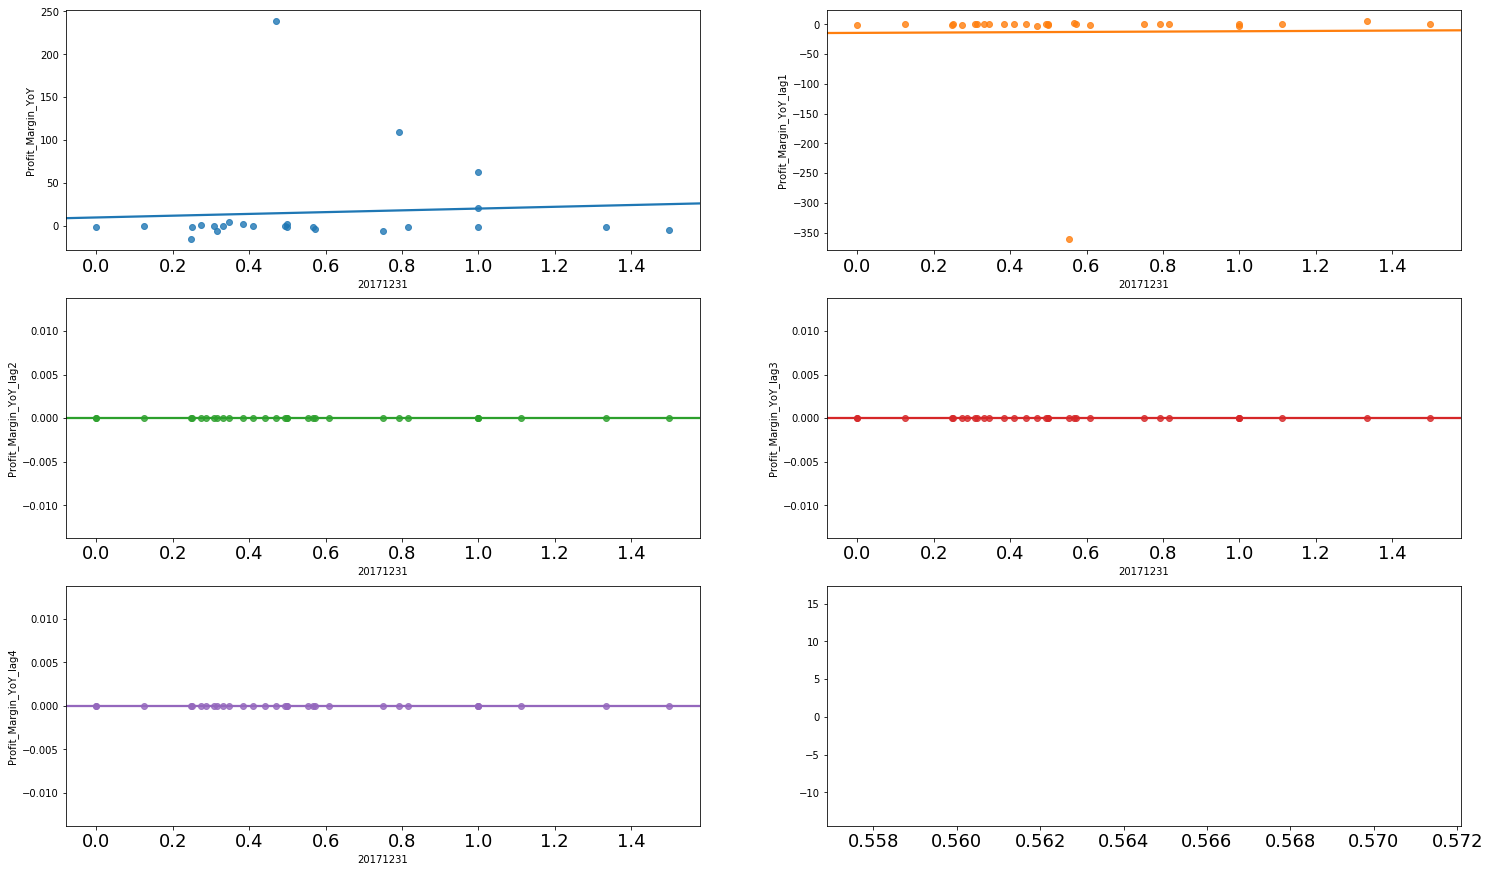

In [498]:
#Net Income
fig, ax = plt.subplots(3,2,figsize=(25,15))
sns.regplot(y='Profit_Margin_YoY', x='20171231', data=df_bivariate_analysis[df_bivariate_analysis['End_Date']=='2018-12-31'],ax=ax[0,0],ci=None)
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[0,0],c='g')
#ax[0,0].set_xlim(-1,1)
#ax[0,0].set_ylim(-1,1)
sns.regplot(y='Profit_Margin_YoY_lag1', x='20171231', data=df_bivariate_analysis[df_bivariate_analysis['End_Date']=='2018-12-31'],ci=None,ax=ax[0,1])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[0,1],c='g')
#ax[0,1].set_xlim(-1,1)
#ax[0,1].set_ylim(-1,1)
sns.regplot(y='Profit_Margin_YoY_lag2', x='20171231', data=df_bivariate_analysis[df_bivariate_analysis['End_Date']=='2018-12-31'],ci=None,ax=ax[1,0])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[1,0],c='g')
#ax[1,0].set_xlim(-1,1)
#ax[1,0].set_ylim(-1,1)
sns.regplot(y='Profit_Margin_YoY_lag3', x='20171231', data=df_bivariate_analysis[df_bivariate_analysis['End_Date']=='2018-12-31'],ci=None,ax=ax[1,1])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[1,1],c='g')
#ax[1,1].set_xlim(-1,1)
#ax[1,1].set_ylim(-1,1)
sns.regplot(y='Profit_Margin_YoY_lag4', x='20171231', data=df_bivariate_analysis[df_bivariate_analysis['End_Date']=='2018-12-31'],ci=None,ax=ax[2,0])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[2,0],c='g')
#ax[2,0].set_xlim(-1,1)
#ax[2,0].set_ylim(-1,1)
#sns.regplot(y='NI_QoQ_5', x='RV_Exposure', data=df_bivariate_analysis[df_bivariate_analysis['As Of Date Bloomberg']=='2018-12-31'],ci=None,ax=ax[2,1])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[2,1],c='g')
#ax[2,1].set_xlim(-1,1)
#ax[2,1].set_ylim(-1,1)

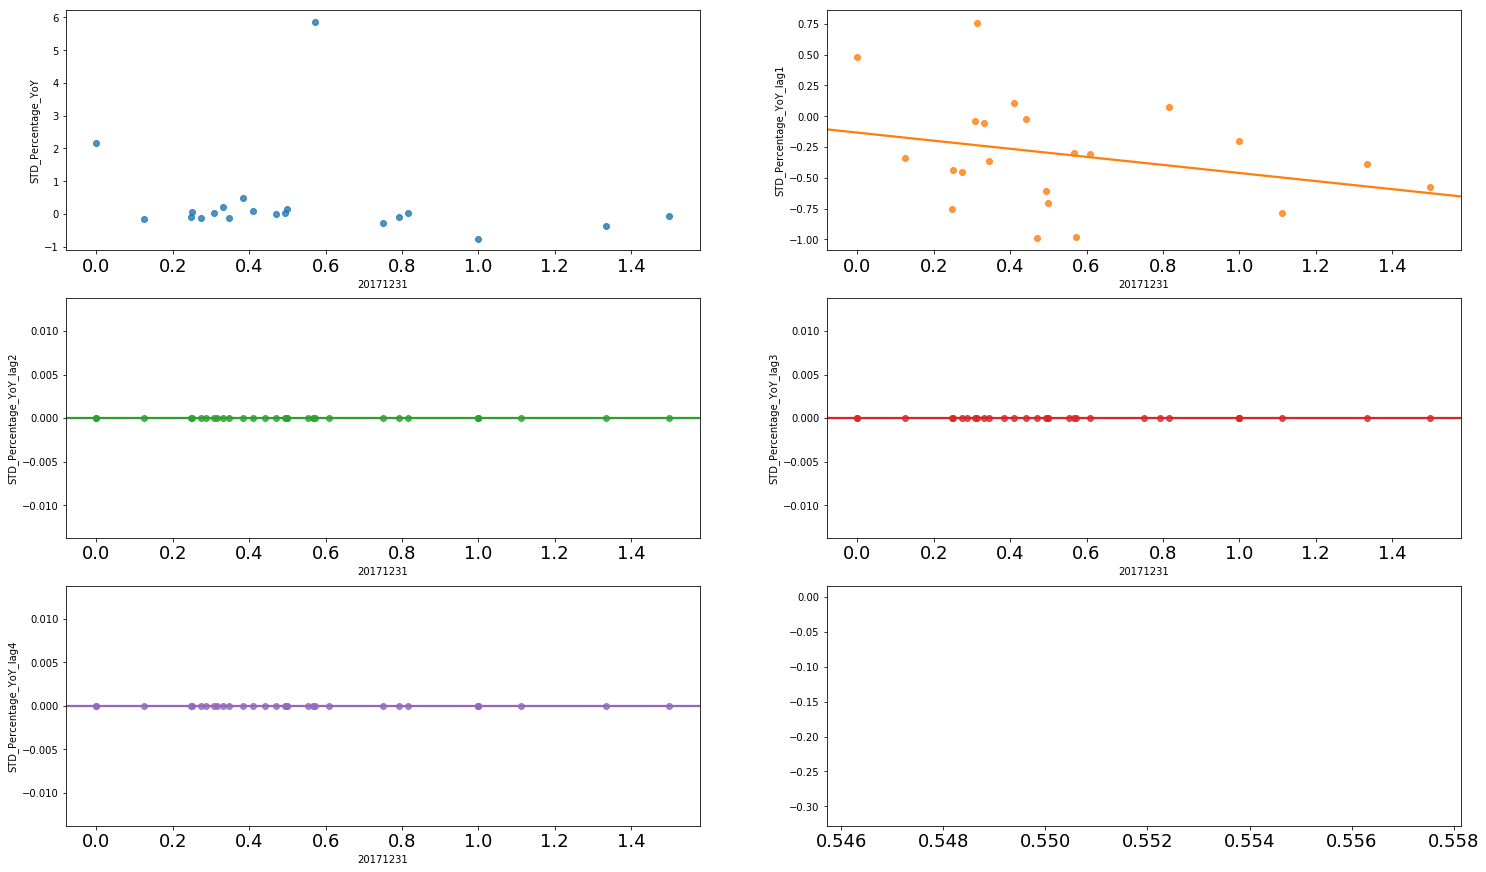

In [502]:
#Net Income
fig, ax = plt.subplots(3,2,figsize=(25,15))
sns.regplot(y='STD_Percentage_YoY', x='20171231', data=df_bivariate_analysis[df_bivariate_analysis['End_Date']=='2018-12-31'],ax=ax[0,0],ci=None)
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[0,0],c='g')
#ax[0,0].set_xlim(-1,1)
#ax[0,0].set_ylim(-1,1)
sns.regplot(y='STD_Percentage_YoY_lag1', x='20171231', data=df_bivariate_analysis[df_bivariate_analysis['End_Date']=='2018-12-31'],ci=None,ax=ax[0,1])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[0,1],c='g')
#ax[0,1].set_xlim(-1,1)
#ax[0,1].set_ylim(-1,1)
sns.regplot(y='STD_Percentage_YoY_lag2', x='20171231', data=df_bivariate_analysis[df_bivariate_analysis['End_Date']=='2018-12-31'],ci=None,ax=ax[1,0])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[1,0],c='g')
#ax[1,0].set_xlim(-1,1)
#ax[1,0].set_ylim(-1,1)
sns.regplot(y='STD_Percentage_YoY_lag3', x='20171231', data=df_bivariate_analysis[df_bivariate_analysis['End_Date']=='2018-12-31'],ci=None,ax=ax[1,1])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[1,1],c='g')
#ax[1,1].set_xlim(-1,1)
#ax[1,1].set_ylim(-1,1)
sns.regplot(y='STD_Percentage_YoY_lag4', x='20171231', data=df_bivariate_analysis[df_bivariate_analysis['End_Date']=='2018-12-31'],ci=None,ax=ax[2,0])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[2,0],c='g')
#ax[2,0].set_xlim(-1,1)
#ax[2,0].set_ylim(-1,1)
#sns.regplot(y='NI_QoQ_5', x='RV_Exposure', data=df_bivariate_analysis[df_bivariate_analysis['As Of Date Bloomberg']=='2018-12-31'],ci=None,ax=ax[2,1])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[2,1],c='g')
#ax[2,1].set_xlim(-1,1)
#ax[2,1].set_ylim(-1,1)

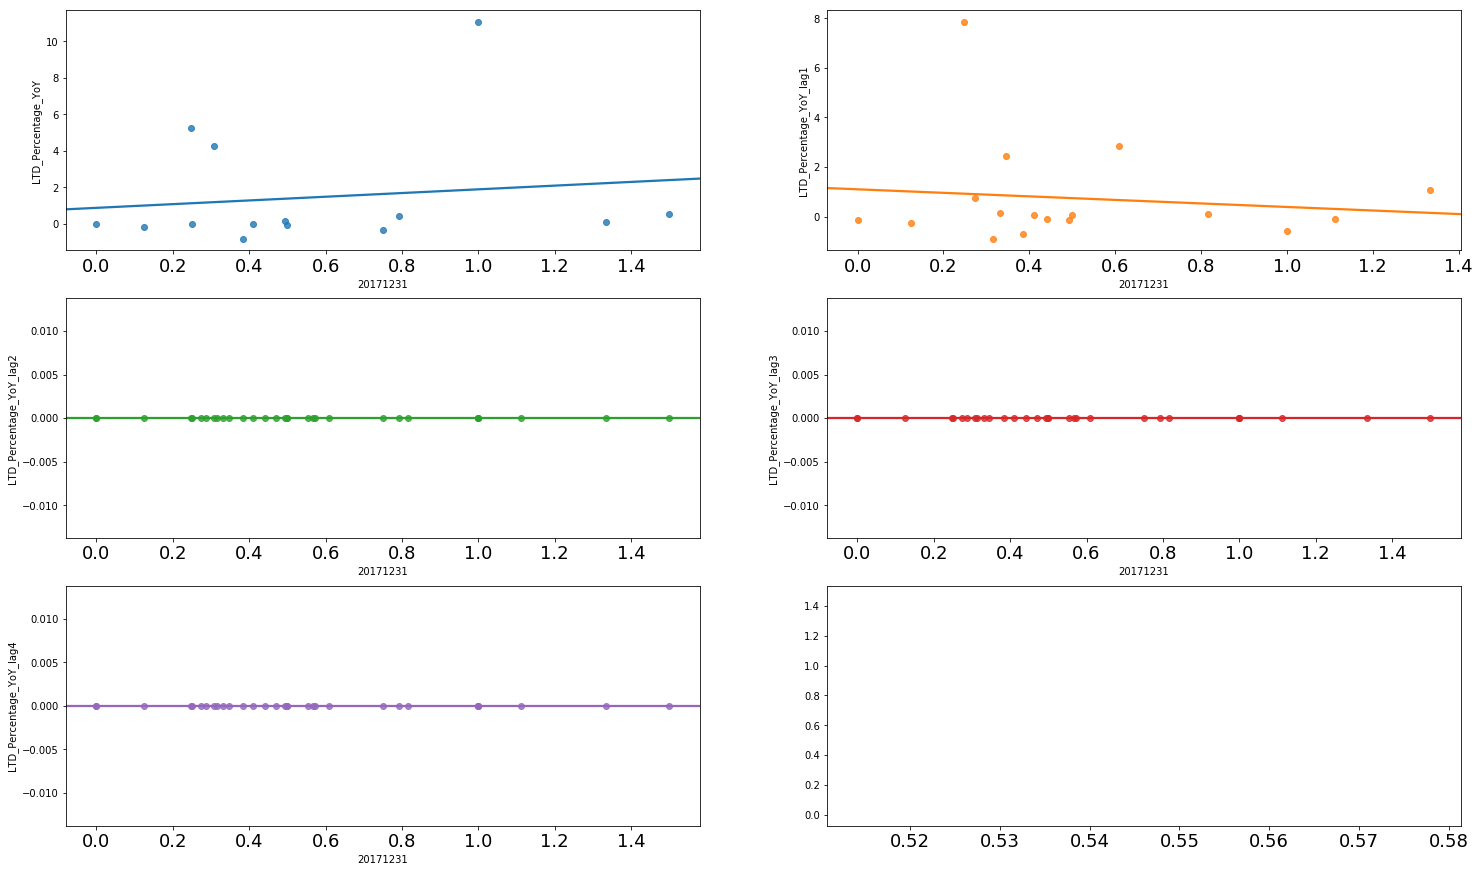

In [503]:
#Net Income
fig, ax = plt.subplots(3,2,figsize=(25,15))
sns.regplot(y='LTD_Percentage_YoY', x='20171231', data=df_bivariate_analysis[df_bivariate_analysis['End_Date']=='2018-12-31'],ax=ax[0,0],ci=None)
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[0,0],c='g')
#ax[0,0].set_xlim(-1,1)
#ax[0,0].set_ylim(-1,1)
sns.regplot(y='LTD_Percentage_YoY_lag1', x='20171231', data=df_bivariate_analysis[df_bivariate_analysis['End_Date']=='2018-12-31'],ci=None,ax=ax[0,1])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[0,1],c='g')
#ax[0,1].set_xlim(-1,1)
#ax[0,1].set_ylim(-1,1)
sns.regplot(y='LTD_Percentage_YoY_lag2', x='20171231', data=df_bivariate_analysis[df_bivariate_analysis['End_Date']=='2018-12-31'],ci=None,ax=ax[1,0])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[1,0],c='g')
#ax[1,0].set_xlim(-1,1)
#ax[1,0].set_ylim(-1,1)
sns.regplot(y='LTD_Percentage_YoY_lag3', x='20171231', data=df_bivariate_analysis[df_bivariate_analysis['End_Date']=='2018-12-31'],ci=None,ax=ax[1,1])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[1,1],c='g')
#ax[1,1].set_xlim(-1,1)
#ax[1,1].set_ylim(-1,1)
sns.regplot(y='LTD_Percentage_YoY_lag4', x='20171231', data=df_bivariate_analysis[df_bivariate_analysis['End_Date']=='2018-12-31'],ci=None,ax=ax[2,0])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[2,0],c='g')
#ax[2,0].set_xlim(-1,1)
#ax[2,0].set_ylim(-1,1)
#sns.regplot(y='NI_QoQ_5', x='RV_Exposure', data=df_bivariate_analysis[df_bivariate_analysis['As Of Date Bloomberg']=='2018-12-31'],ci=None,ax=ax[2,1])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[2,1],c='g')
#ax[2,1].set_xlim(-1,1)
#ax[2,1].set_ylim(-1,1)

Text(0.5, 0, 'Degree of Supplier Change (Count) 20181231-20171231')

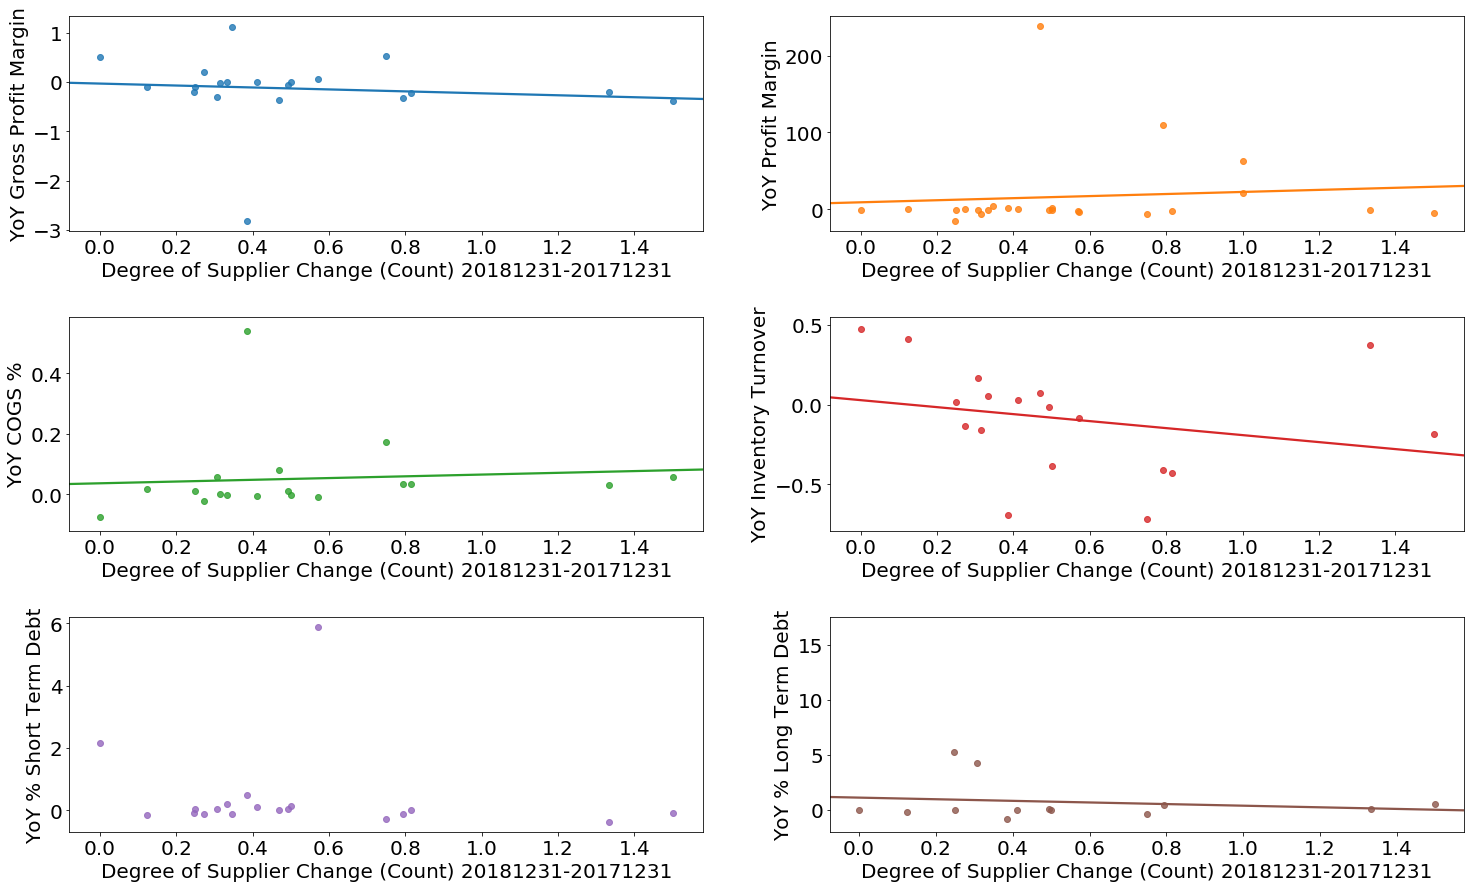

In [529]:
#Net Income
df_bivariate_analysis_1=df_bivariate_analysis[df_bivariate_analysis['Tickers']!='600733 CH Equity']
fig, ax = plt.subplots(3,2,figsize=(25,15))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.4)
sns.regplot(y='GPM_YoY', x='20171231', data=df_bivariate_analysis_1[df_bivariate_analysis_1['End_Date']=='2018-12-31'],ax=ax[0,0],ci=None)
ax[0,0].tick_params(axis = 'both', which = 'major', labelsize = 20)
ax[0,0].set_ylabel('YoY Gross Profit Margin', fontsize=20)
ax[0,0].set_xlabel('Degree of Supplier Change (Count) 20181231-20171231', fontsize=20)
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[0,0],c='g')
#ax[0,0].set_xlim(-1,1)
#ax[0,0].set_ylim(-1,1)
sns.regplot(y='Profit_Margin_YoY', x='20171231', data=df_bivariate_analysis_1[df_bivariate_analysis_1['End_Date']=='2018-12-31'],ci=None,ax=ax[0,1])
ax[0,1].tick_params(axis = 'both', which = 'major', labelsize = 20)
ax[0,1].set_ylabel('YoY Profit Margin', fontsize=20)
ax[0,1].set_xlabel('Degree of Supplier Change (Count) 20181231-20171231', fontsize=20)
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[0,1],c='g')
#ax[0,1].set_xlim(-1,1)
#ax[0,1].set_ylim(-1,1)
sns.regplot(y='COGS_Percentage_YoY', x='20171231', data=df_bivariate_analysis_1[df_bivariate_analysis_1['End_Date']=='2018-12-31'],ci=None,ax=ax[1,0])
ax[1,0].tick_params(axis = 'both', which = 'major', labelsize = 20)
ax[1,0].set_ylabel('YoY COGS %', fontsize=20)
ax[1,0].set_xlabel('Degree of Supplier Change (Count) 20181231-20171231', fontsize=20)
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[1,0],c='g')
#ax[1,0].set_xlim(-1,1)
#ax[1,0].set_ylim(-1,1)
sns.regplot(y='Inventory_turnover_YoY', x='20171231', data=df_bivariate_analysis_1[df_bivariate_analysis_1['End_Date']=='2018-12-31'],ci=None,ax=ax[1,1])
ax[1,1].tick_params(axis = 'both', which = 'major', labelsize = 20)
ax[1,1].set_ylabel('YoY Inventory Turnover', fontsize=20)
ax[1,1].set_xlabel('Degree of Supplier Change (Count) 20181231-20171231', fontsize=20)
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[1,1],c='g')
#ax[1,1].set_xlim(-1,1)
#ax[1,1].set_ylim(-1,1)
sns.regplot(y='STD_Percentage_YoY', x='20171231', data=df_bivariate_analysis_1[df_bivariate_analysis_1['End_Date']=='2018-12-31'],ci=None,ax=ax[2,0])
ax[2,0].tick_params(axis = 'both', which = 'major', labelsize = 20)
ax[2,0].set_ylabel('YoY % Short Term Debt', fontsize=20)
ax[2,0].set_xlabel('Degree of Supplier Change (Count) 20181231-20171231', fontsize=20)
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[2,0],c='g')
#ax[2,0].set_xlim(-1,1)
#ax[2,0].set_ylim(-1,1)
sns.regplot(y='LTD_Percentage_YoY', x='20171231', data=df_bivariate_analysis_1[df_bivariate_analysis_1['End_Date']=='2018-12-31'],ci=None,ax=ax[2,1])
ax[2,1].tick_params(axis = 'both', which = 'major', labelsize = 20)
ax[2,1].set_ylabel('YoY % Long Term Debt', fontsize=20)
ax[2,1].set_xlabel('Degree of Supplier Change (Count) 20181231-20171231', fontsize=20)
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[2,1],c='g')
#ax[2,1].set_xlim(-1,1)
#ax[2,1].set_ylim(-1,1)

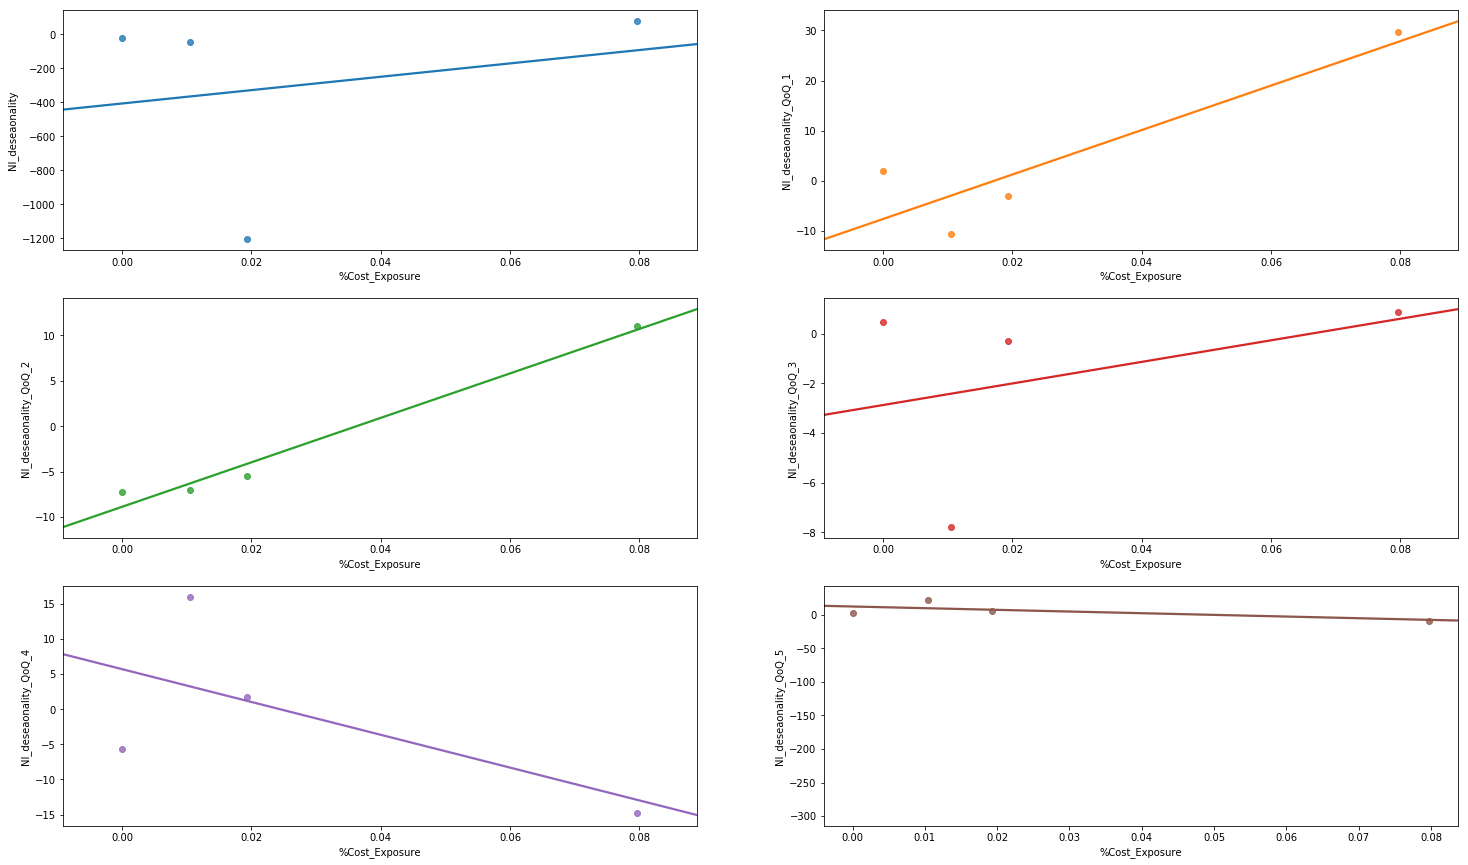

In [651]:
#Net Income
fig, ax = plt.subplots(3,2,figsize=(25,15))
sns.regplot(y='NI_deseaonality', x='%Cost_Exposure', data=df_bivariate_analysis_us[df_bivariate_analysis_us['As Of Date Bloomberg']=='2017-12-31'],ax=ax[0,0],ci=None)
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[0,0],c='g')
#ax[0,0].set_xlim(-1,1)
#ax[0,0].set_ylim(-1,1)
sns.regplot(y='NI_deseaonality_QoQ_1', x='%Cost_Exposure', data=df_bivariate_analysis_us[df_bivariate_analysis_us['As Of Date Bloomberg']=='2017-12-31'],ci=None,ax=ax[0,1])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[0,1],c='g')
#ax[0,1].set_xlim(-1,1)
#ax[0,1].set_ylim(-1,1)
sns.regplot(y='NI_deseaonality_QoQ_2', x='%Cost_Exposure', data=df_bivariate_analysis_us[df_bivariate_analysis_us['As Of Date Bloomberg']=='2017-12-31'],ci=None,ax=ax[1,0])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[1,0],c='g')
#ax[1,0].set_xlim(-1,1)
#ax[1,0].set_ylim(-1,1)
sns.regplot(y='NI_deseaonality_QoQ_3', x='%Cost_Exposure', data=df_bivariate_analysis_us[df_bivariate_analysis_us['As Of Date Bloomberg']=='2017-12-31'],ci=None,ax=ax[1,1])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[1,1],c='g')
#ax[1,1].set_xlim(-1,1)
#ax[1,1].set_ylim(-1,1)
sns.regplot(y='NI_deseaonality_QoQ_4', x='%Cost_Exposure', data=df_bivariate_analysis_us[df_bivariate_analysis_us['As Of Date Bloomberg']=='2017-12-31'],ci=None,ax=ax[2,0])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[2,0],c='g')
#ax[2,0].set_xlim(-1,1)
#ax[2,0].set_ylim(-1,1)
sns.regplot(y='NI_deseaonality_QoQ_5', x='%Cost_Exposure', data=df_bivariate_analysis_us[df_bivariate_analysis_us['As Of Date Bloomberg']=='2017-12-31'],ci=None,ax=ax[2,1])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[2,1],c='g')
#ax[2,1].set_xlim(-1,1)
#ax[2,1].set_ylim(-1,1)

Text(0.5, 1.0, 'Deseasonal Quater Net Income Vs 2019/3/31 exposure score')

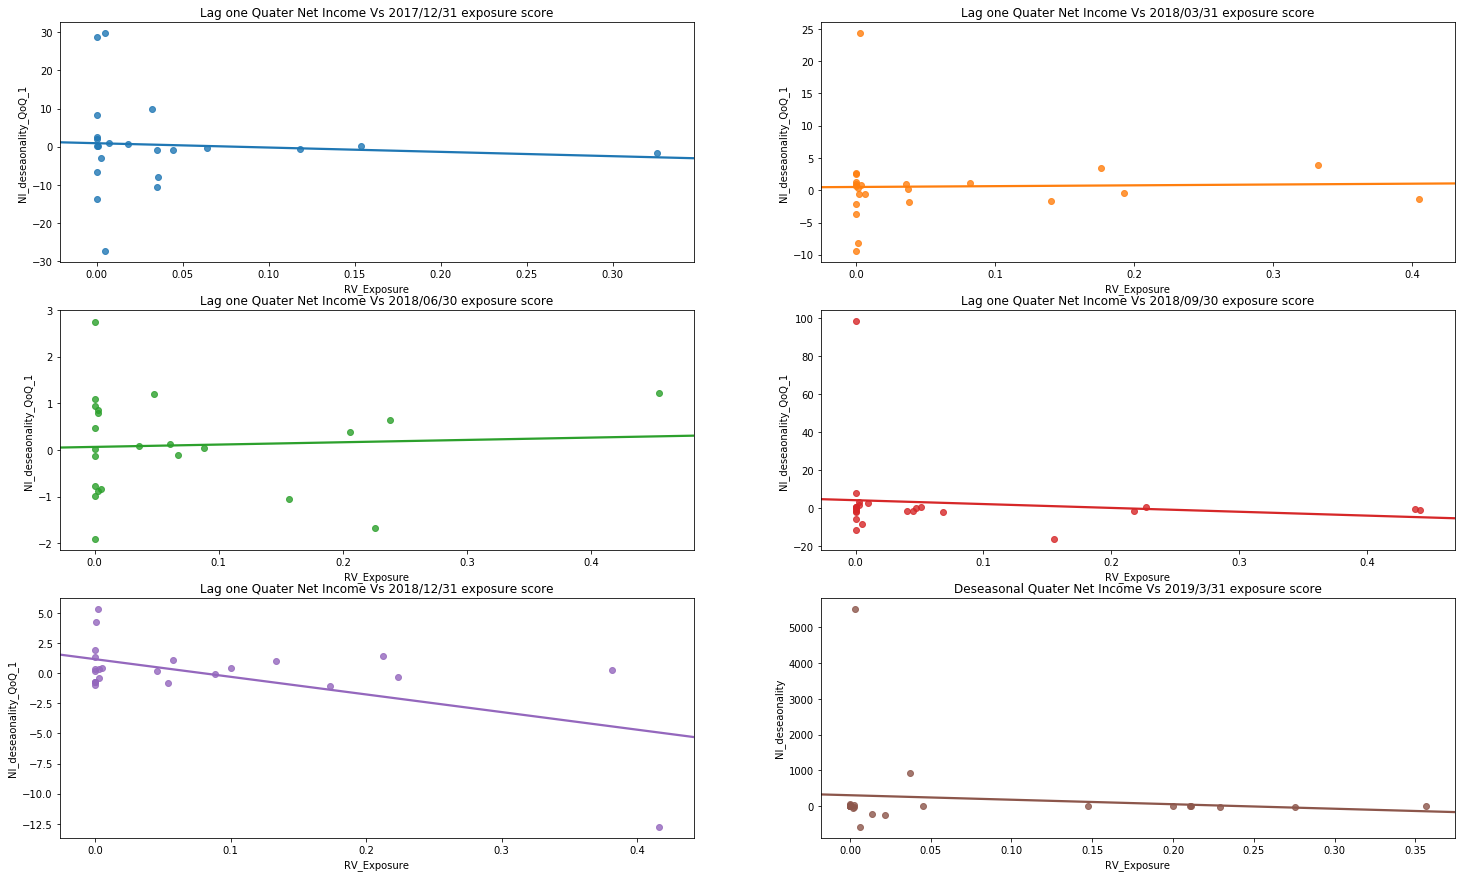

In [657]:
df_bivariate_analysis1= df_bivariate_analysis[~df_bivariate_analysis['Stock Tickers Clean'].isin(['600733 CH Equity','600104 CH Equity'])]
fig, ax = plt.subplots(3,2,figsize=(25,15))
sns.regplot(y='NI_deseaonality_QoQ_1', x='RV_Exposure', data=df_bivariate_analysis1[df_bivariate_analysis1['As Of Date Bloomberg']=='2017-12-31'],ax=ax[0,0],ci=None)
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[0,0],c='g')
ax[0,0].set_title('Lag one Quater Net Income Vs 2017/12/31 exposure score')
#ax[0,0].set_ylim(-1,1)
sns.regplot(y='NI_deseaonality_QoQ_1', x='RV_Exposure', data=df_bivariate_analysis1[df_bivariate_analysis1['As Of Date Bloomberg']=='2018-03-31'],ci=None,ax=ax[0,1])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[0,1],c='g')
#ax[0,1].set_xlim(-1,1)
ax[0,1].set_title('Lag one Quater Net Income Vs 2018/03/31 exposure score')
sns.regplot(y='NI_deseaonality_QoQ_1', x='RV_Exposure', data=df_bivariate_analysis1[df_bivariate_analysis1['As Of Date Bloomberg']=='2018-06-30'],ci=None,ax=ax[1,0])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[1,0],c='g')
#ax[1,0].set_xlim(-1,1)
ax[1,0].set_title('Lag one Quater Net Income Vs 2018/06/30 exposure score')
sns.regplot(y='NI_deseaonality_QoQ_1', x='RV_Exposure', data=df_bivariate_analysis1[df_bivariate_analysis1['As Of Date Bloomberg']=='2018-09-30'],ci=None,ax=ax[1,1])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[1,1],c='g')
#ax[1,1].set_xlim(-1,1)
ax[1,1].set_title('Lag one Quater Net Income Vs 2018/09/30 exposure score')
sns.regplot(y='NI_deseaonality_QoQ_1', x='RV_Exposure', data=df_bivariate_analysis1[df_bivariate_analysis1['As Of Date Bloomberg']=='2018-12-31'],ci=None,ax=ax[2,0])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[2,0],c='g')
#ax[2,0].set_xlim(-1,1)
ax[2,0].set_title('Lag one Quater Net Income Vs 2018/12/31 exposure score')
sns.regplot(y='NI_deseaonality', x='RV_Exposure', data=df_bivariate_analysis1[df_bivariate_analysis1['As Of Date Bloomberg']=='2019-03-31'],ci=None,ax=ax[2,1])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[2,1],c='g')
#ax[2,1].set_xlim(-1,1)
ax[2,1].set_title('Deseasonal Quater Net Income Vs 2019/3/31 exposure score')

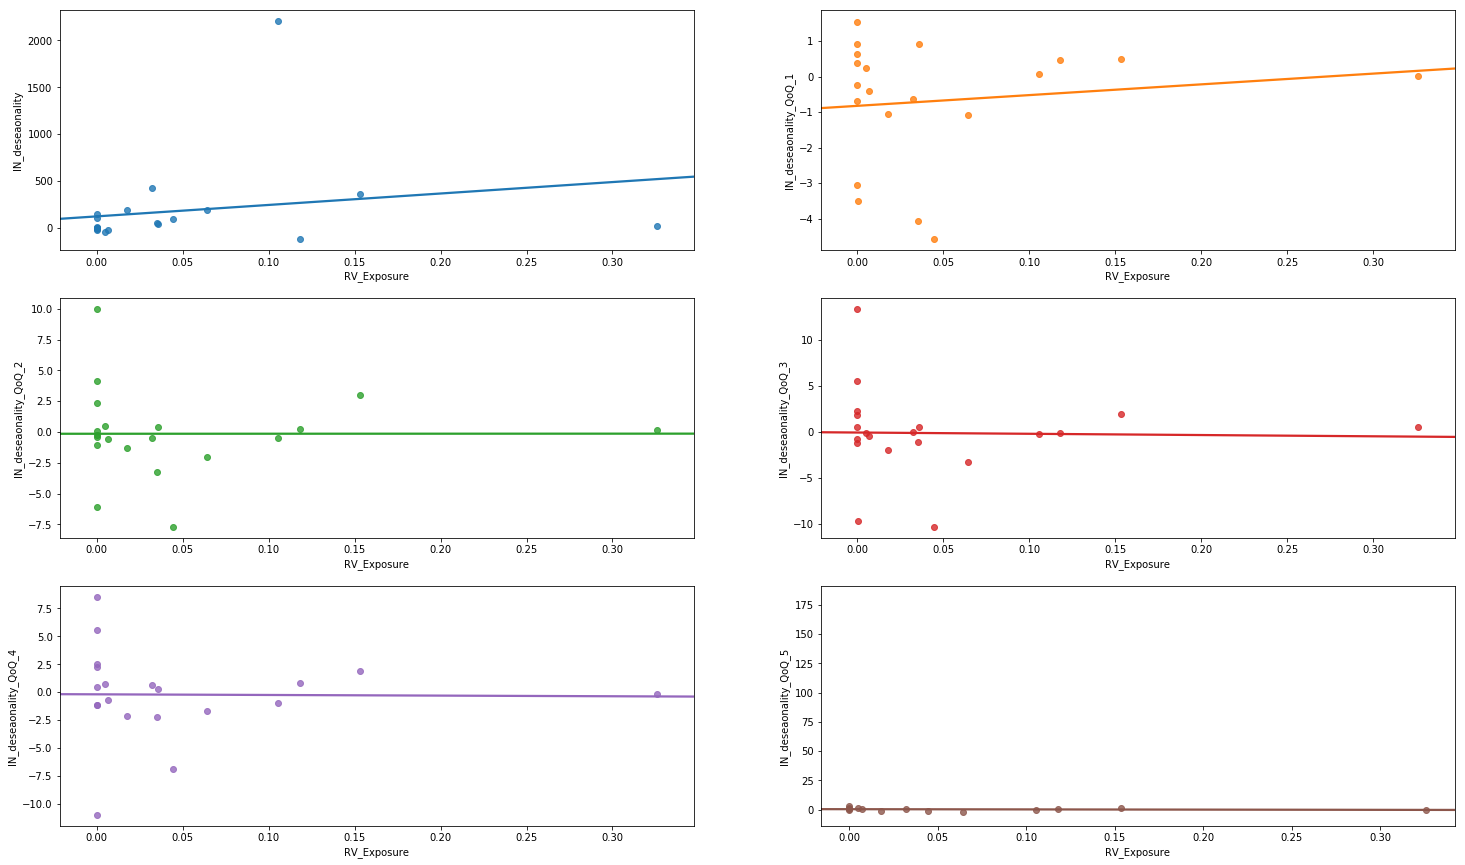

In [659]:
#inventories
fig, ax = plt.subplots(3,2,figsize=(25,15))
sns.regplot(y='IN_deseaonality', x='RV_Exposure', data=df_bivariate_analysis_cn[df_bivariate_analysis_cn['As Of Date Bloomberg']=='2017-12-31'],ax=ax[0,0],ci=None)
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[0,0],c='g')
#ax[0,0].set_xlim(-1,1)
#ax[0,0].set_ylim(-1,1)
sns.regplot(y='IN_deseaonality_QoQ_1', x='RV_Exposure', data=df_bivariate_analysis_cn[df_bivariate_analysis_cn['As Of Date Bloomberg']=='2017-12-31'],ci=None,ax=ax[0,1])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[0,1],c='g')
#ax[0,1].set_xlim(-1,1)
#ax[0,1].set_ylim(-1,1)
sns.regplot(y='IN_deseaonality_QoQ_2', x='RV_Exposure', data=df_bivariate_analysis_cn[df_bivariate_analysis_cn['As Of Date Bloomberg']=='2017-12-31'],ci=None,ax=ax[1,0])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[1,0],c='g')
#ax[1,0].set_xlim(-1,1)
#ax[1,0].set_ylim(-1,1)
sns.regplot(y='IN_deseaonality_QoQ_3', x='RV_Exposure', data=df_bivariate_analysis_cn[df_bivariate_analysis_cn['As Of Date Bloomberg']=='2017-12-31'],ci=None,ax=ax[1,1])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[1,1],c='g')
#ax[1,1].set_xlim(-1,1)
#ax[1,1].set_ylim(-1,1)
sns.regplot(y='IN_deseaonality_QoQ_4', x='RV_Exposure', data=df_bivariate_analysis_cn[df_bivariate_analysis_cn['As Of Date Bloomberg']=='2017-12-31'],ci=None,ax=ax[2,0])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[2,0],c='g')
#ax[2,0].set_xlim(-1,1)
#ax[2,0].set_ylim(-1,1)
sns.regplot(y='IN_deseaonality_QoQ_5', x='RV_Exposure', data=df_bivariate_analysis_cn[df_bivariate_analysis_cn['As Of Date Bloomberg']=='2017-12-31'],ci=None,ax=ax[2,1])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[2,1],c='g')
#ax[2,1].set_xlim(-1,1)
#ax[2,1].set_ylim(-1,1)

In [175]:
df_inventories = df_bivariate_analysis[['Central Ticker','Country','End Date','CN_Degree','US_Degree',"IN_deseaonality",'IN_deseaonality_QoQ_1','IN_deseaonality_QoQ_2','IN_deseaonality_QoQ_3','IN_deseaonality_QoQ_4','IN_deseaonality_QoQ_5']]
#df_inventories = df_inventories.dropna(subset=['DSC'])
df_inventories[df_inventories['Central Ticker']=='489 HK Equity']

Central Ticker Country   End Date  CN_Degree  US_Degree  IN_deseaonality  \
15   489 HK Equity      CN 2019-03-31   0.412285   0.157486       -85.351243   
45   489 HK Equity      CN 2018-12-31   0.538947   0.124653        22.773519   
74   489 HK Equity      CN 2018-09-30   0.548985   0.127005              NaN   
103  489 HK Equity      CN 2018-06-30   0.498149   0.116013              NaN   
131  489 HK Equity      CN 2018-03-31   0.305852   0.132431         5.832513   
159  489 HK Equity      CN 2017-12-31   0.082801   0.181253      -877.861462   
187  489 HK Equity      CN 2017-03-31   0.099873   0.194490         6.019667   

     IN_deseaonality_QoQ_1  IN_deseaonality_QoQ_2  IN_deseaonality_QoQ_3  \
15                     NaN                    NaN                    0.0   
45                     NaN                    NaN                    0.0   
74                     NaN                    NaN                    0.0   
103                    NaN                    NaN                    0.0   
131                    NaN                    NaN                    0.0   
159                    NaN                    NaN                    0.0   
187                    NaN                    NaN                    0.0   

     IN_deseaonality_QoQ_4  IN_deseaonality_QoQ_5  
15                     0.0                    0.0  
45                     0.0                    0.0  
74                     0.0                    0.0  
103                    0.0                    0.0  
131                    0.0                    0.0  
159                    0.0                    0.0  
187                    0.0                    0.0

In [ ]:
#Impact score to DSC

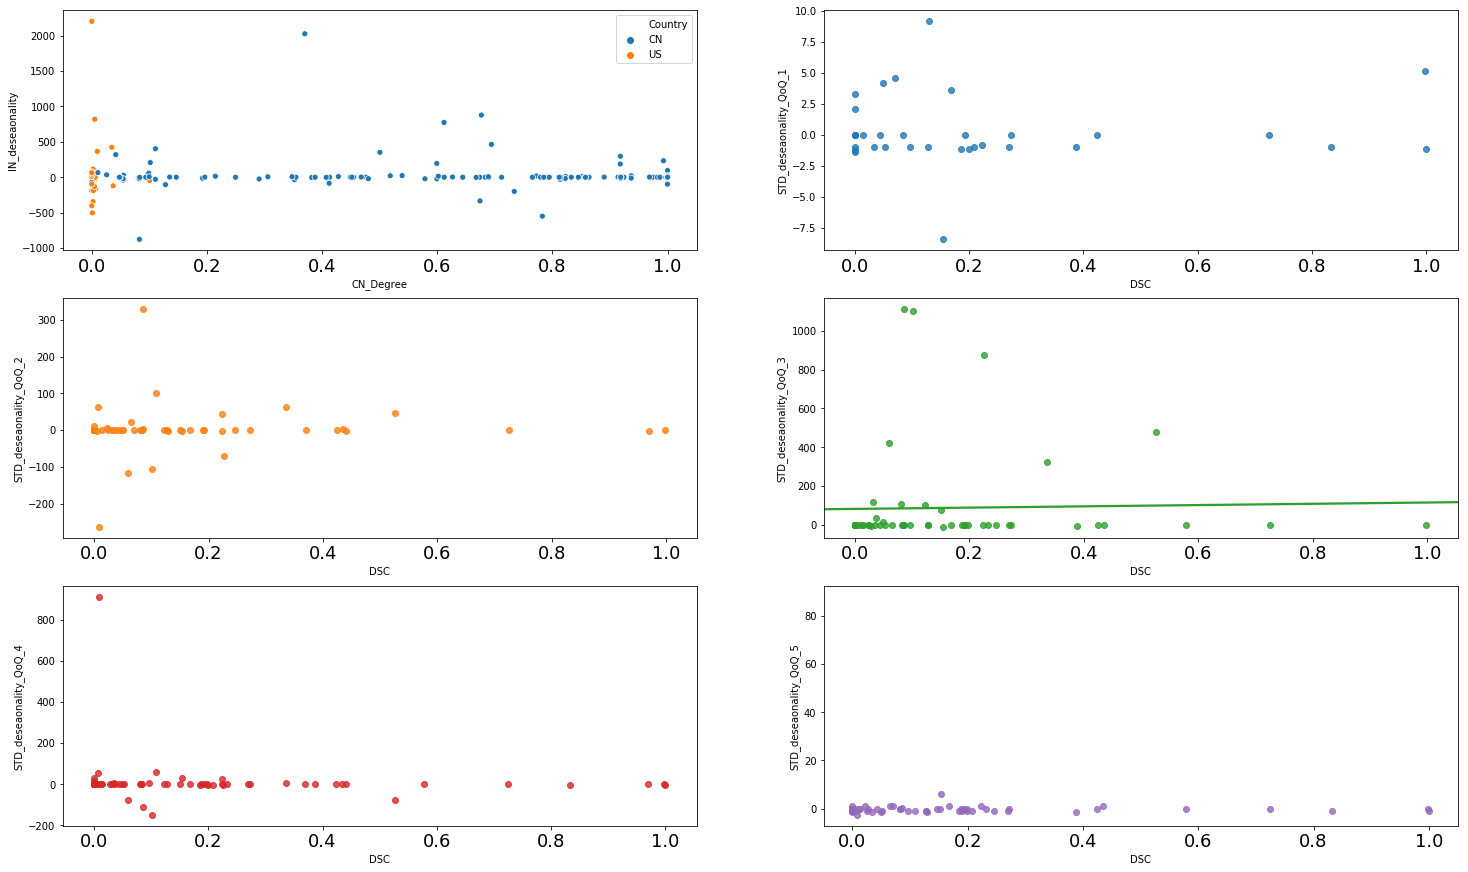

In [179]:
#Inventories
fig, ax = plt.subplots(3,2,figsize=(25,15))
sns.scatterplot(y='IN_deseaonality', x='CN_Degree',hue='Country', data=df_inventories,ax=ax[0,0],ci=None)
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[0,0],c='g')
#ax[0,0].set_xlim(-1,1)
#ax[0,0].set_ylim(-1,1)
sns.regplot(y='STD_deseaonality_QoQ_1', x='DSC', data=df_bivariate_analysis,ci=None,ax=ax[0,1])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[0,1],c='g')
#ax[0,1].set_xlim(-1,1)
#ax[0,1].set_ylim(-1,1)
sns.regplot(y='STD_deseaonality_QoQ_2', x='DSC', data=df_bivariate_analysis,ci=None,ax=ax[1,0])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[1,0],c='g')
#ax[1,0].set_xlim(-1,1)
#ax[1,0].set_ylim(-1,1)
sns.regplot(y='STD_deseaonality_QoQ_3', x='DSC', data=df_bivariate_analysis,ci=None,ax=ax[1,1])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[1,1],c='g')
#ax[1,1].set_xlim(-1,1)
#ax[1,1].set_ylim(-1,1)
sns.regplot(y='STD_deseaonality_QoQ_4', x='DSC', data=df_bivariate_analysis,ci=None,ax=ax[2,0])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[2,0],c='g')
#ax[2,0].set_xlim(-1,1)
#ax[2,0].set_ylim(-1,1)
sns.regplot(y='STD_deseaonality_QoQ_5', x='DSC', data=df_bivariate_analysis,ci=None,ax=ax[2,1])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[2,1],c='g')
#ax[2,1].set_xlim(-1,1)
#ax[2,1].set_ylim(-1,1)

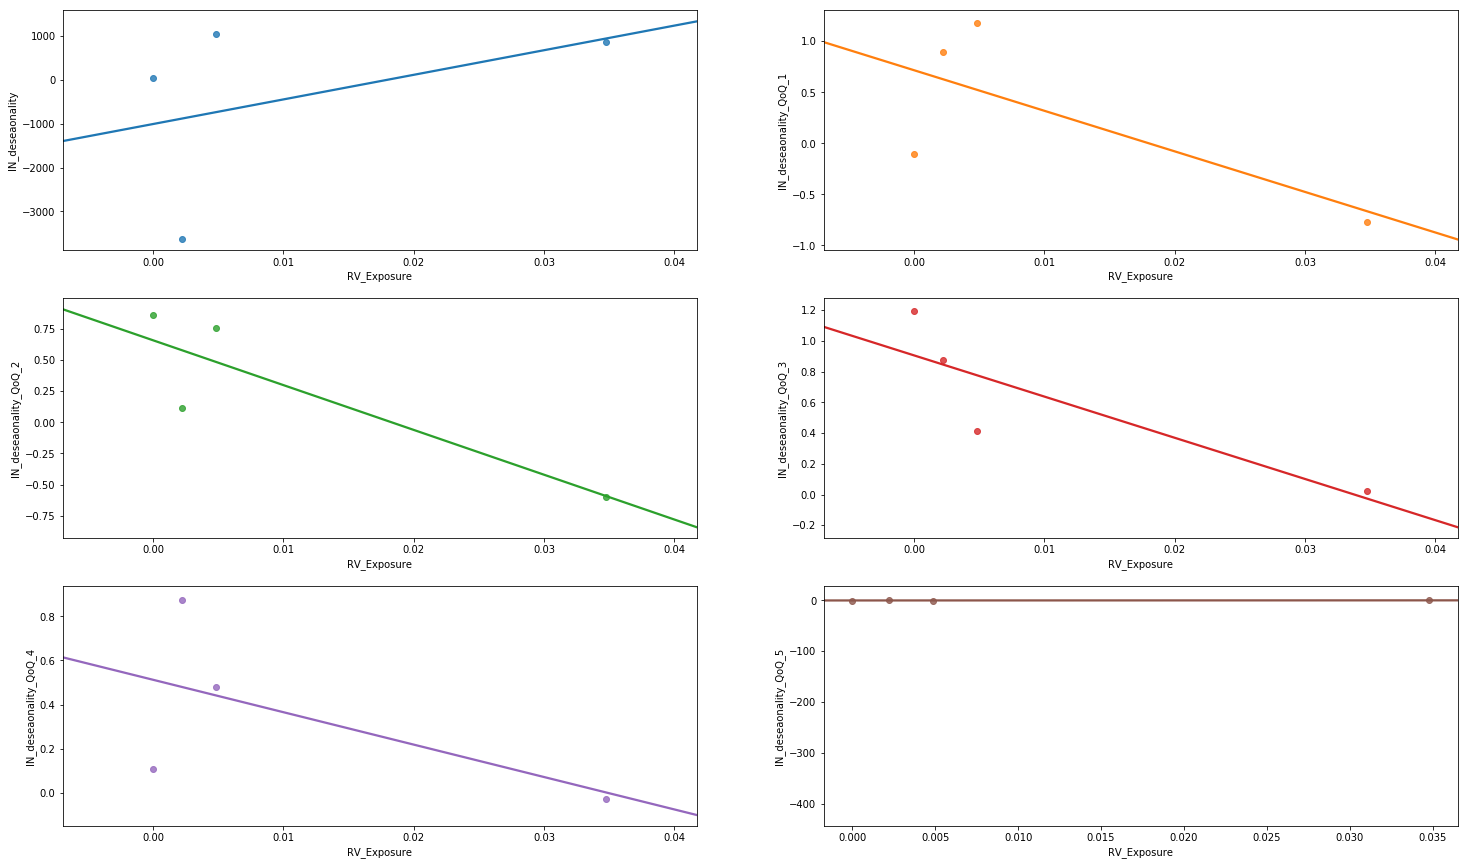

In [661]:
#Inventories
fig, ax = plt.subplots(3,2,figsize=(25,15))
sns.regplot(y='IN_deseaonality', x='RV_Exposure', data=df_bivariate_analysis_us[df_bivariate_analysis_us['As Of Date Bloomberg']=='2017-12-31'],ax=ax[0,0],ci=None)
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[0,0],c='g')
#ax[0,0].set_xlim(-1,1)
#ax[0,0].set_ylim(-1,1)
sns.regplot(y='IN_deseaonality_QoQ_1', x='RV_Exposure', data=df_bivariate_analysis_us[df_bivariate_analysis_us['As Of Date Bloomberg']=='2017-12-31'],ci=None,ax=ax[0,1])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[0,1],c='g')
#ax[0,1].set_xlim(-1,1)
#ax[0,1].set_ylim(-1,1)
sns.regplot(y='IN_deseaonality_QoQ_2', x='RV_Exposure', data=df_bivariate_analysis_us[df_bivariate_analysis_us['As Of Date Bloomberg']=='2017-12-31'],ci=None,ax=ax[1,0])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[1,0],c='g')
#ax[1,0].set_xlim(-1,1)
#ax[1,0].set_ylim(-1,1)
sns.regplot(y='IN_deseaonality_QoQ_3', x='RV_Exposure', data=df_bivariate_analysis_us[df_bivariate_analysis_us['As Of Date Bloomberg']=='2017-12-31'],ci=None,ax=ax[1,1])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[1,1],c='g')
#ax[1,1].set_xlim(-1,1)
#ax[1,1].set_ylim(-1,1)
sns.regplot(y='IN_deseaonality_QoQ_4', x='RV_Exposure', data=df_bivariate_analysis_us[df_bivariate_analysis_us['As Of Date Bloomberg']=='2017-12-31'],ci=None,ax=ax[2,0])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[2,0],c='g')
#ax[2,0].set_xlim(-1,1)
#ax[2,0].set_ylim(-1,1)
sns.regplot(y='IN_deseaonality_QoQ_5', x='RV_Exposure', data=df_bivariate_analysis_us[df_bivariate_analysis_us['As Of Date Bloomberg']=='2017-12-31'],ci=None,ax=ax[2,1])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[2,1],c='g')
#ax[2,1].set_xlim(-1,1)
#ax[2,1].set_ylim(-1,1)

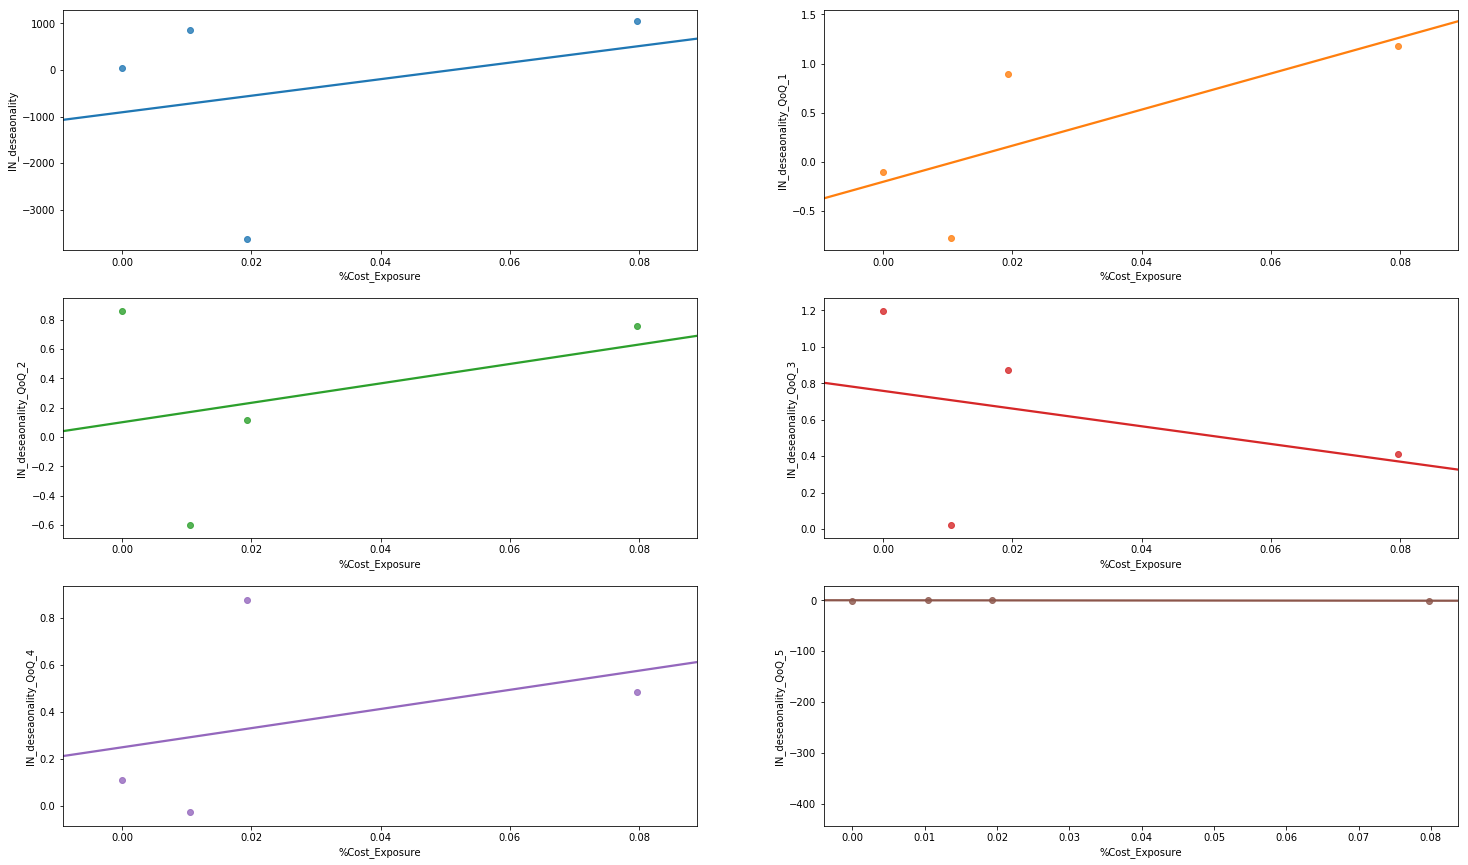

In [662]:
#Inventories
fig, ax = plt.subplots(3,2,figsize=(25,15))
sns.regplot(y='IN_deseaonality', x='%Cost_Exposure', data=df_bivariate_analysis_us[df_bivariate_analysis_us['As Of Date Bloomberg']=='2017-12-31'],ax=ax[0,0],ci=None)
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[0,0],c='g')
#ax[0,0].set_xlim(-1,1)
#ax[0,0].set_ylim(-1,1)
sns.regplot(y='IN_deseaonality_QoQ_1', x='%Cost_Exposure', data=df_bivariate_analysis_us[df_bivariate_analysis_us['As Of Date Bloomberg']=='2017-12-31'],ci=None,ax=ax[0,1])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[0,1],c='g')
#ax[0,1].set_xlim(-1,1)
#ax[0,1].set_ylim(-1,1)
sns.regplot(y='IN_deseaonality_QoQ_2', x='%Cost_Exposure', data=df_bivariate_analysis_us[df_bivariate_analysis_us['As Of Date Bloomberg']=='2017-12-31'],ci=None,ax=ax[1,0])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[1,0],c='g')
#ax[1,0].set_xlim(-1,1)
#ax[1,0].set_ylim(-1,1)
sns.regplot(y='IN_deseaonality_QoQ_3', x='%Cost_Exposure', data=df_bivariate_analysis_us[df_bivariate_analysis_us['As Of Date Bloomberg']=='2017-12-31'],ci=None,ax=ax[1,1])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[1,1],c='g')
#ax[1,1].set_xlim(-1,1)
#ax[1,1].set_ylim(-1,1)
sns.regplot(y='IN_deseaonality_QoQ_4', x='%Cost_Exposure', data=df_bivariate_analysis_us[df_bivariate_analysis_us['As Of Date Bloomberg']=='2017-12-31'],ci=None,ax=ax[2,0])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[2,0],c='g')
#ax[2,0].set_xlim(-1,1)
#ax[2,0].set_ylim(-1,1)
sns.regplot(y='IN_deseaonality_QoQ_5', x='%Cost_Exposure', data=df_bivariate_analysis_us[df_bivariate_analysis_us['As Of Date Bloomberg']=='2017-12-31'],ci=None,ax=ax[2,1])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[2,1],c='g')
#ax[2,1].set_xlim(-1,1)
#ax[2,1].set_ylim(-1,1)

In [664]:
df_bivariate_analysis[df_bivariate_analysis['IN_deseaonality']<-1000][['Stock Tickers Clean','IN_deseaonality', 'IN_deseaonality_QoQ_1',
       'IN_deseaonality_QoQ_2', 'IN_deseaonality_QoQ_3',
       'IN_deseaonality_QoQ_4', 'IN_deseaonality_QoQ_5']]

Stock Tickers Clean  IN_deseaonality  IN_deseaonality_QoQ_1  \
175        GM US Equity          -2724.0               0.584802   
176        GM US Equity          -3638.0               0.896372   
178        GM US Equity          -3225.0               0.858605   

     IN_deseaonality_QoQ_2  IN_deseaonality_QoQ_3  IN_deseaonality_QoQ_4  \
175              -0.371880              -0.335536               0.861601   
176               0.113524               0.874656               0.874931   
178               0.858915               0.737364               0.000000   

     IN_deseaonality_QoQ_5  
175              -0.183921  
176               0.767180  
178               0.000000

Text(0.5, 1.0, 'Deseasonal Quater Inventories Vs 2019/3/31 exposure score')

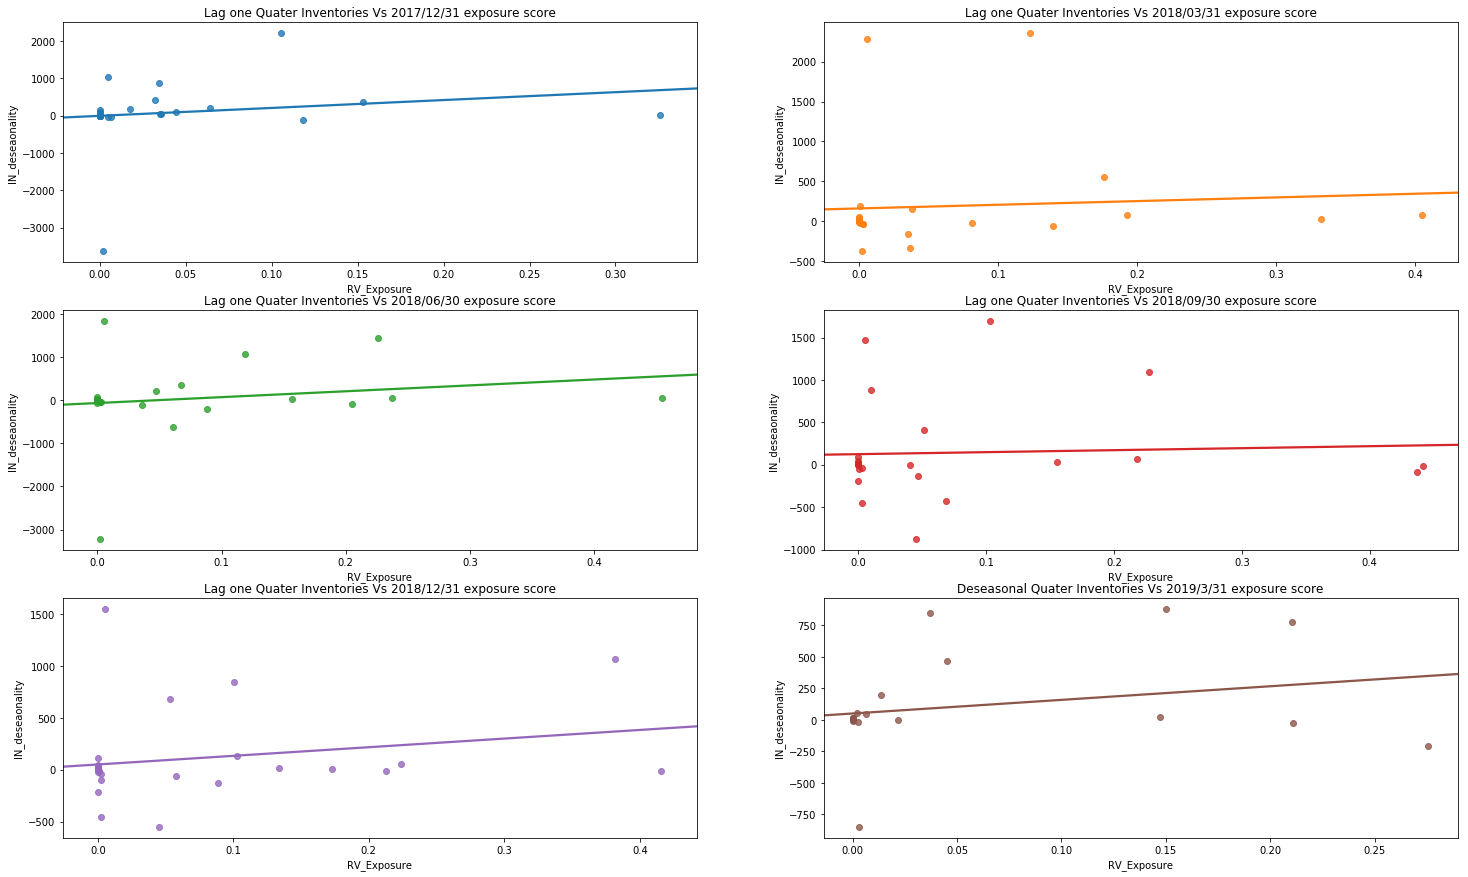

In [666]:
df_bivariate_analysis1= df_bivariate_analysis.copy()
#df_bivariate_analysis1=df_bivariate_analysis1[~df_bivariate_analysis1['Stock Tickers Clean'].isin(['600733 CH Equity','600104 CH Equity'])]
fig, ax = plt.subplots(3,2,figsize=(25,15))
sns.regplot(y='IN_deseaonality', x='RV_Exposure', data=df_bivariate_analysis1[df_bivariate_analysis1['As Of Date Bloomberg']=='2017-12-31'],ax=ax[0,0],ci=None)
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[0,0],c='g')
ax[0,0].set_title('Lag one Quater Inventories Vs 2017/12/31 exposure score')
#ax[0,0].set_ylim(-1,1)
sns.regplot(y='IN_deseaonality', x='RV_Exposure', data=df_bivariate_analysis1[df_bivariate_analysis1['As Of Date Bloomberg']=='2018-03-31'],ci=None,ax=ax[0,1])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[0,1],c='g')
#ax[0,1].set_xlim(-1,1)
ax[0,1].set_title('Lag one Quater Inventories Vs 2018/03/31 exposure score')
sns.regplot(y='IN_deseaonality', x='RV_Exposure', data=df_bivariate_analysis1[df_bivariate_analysis1['As Of Date Bloomberg']=='2018-06-30'],ci=None,ax=ax[1,0])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[1,0],c='g')
#ax[1,0].set_xlim(-1,1)
ax[1,0].set_title('Lag one Quater Inventories Vs 2018/06/30 exposure score')
sns.regplot(y='IN_deseaonality', x='RV_Exposure', data=df_bivariate_analysis1[df_bivariate_analysis1['As Of Date Bloomberg']=='2018-09-30'],ci=None,ax=ax[1,1])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[1,1],c='g')
#ax[1,1].set_xlim(-1,1)
ax[1,1].set_title('Lag one Quater Inventories Vs 2018/09/30 exposure score')
sns.regplot(y='IN_deseaonality', x='RV_Exposure', data=df_bivariate_analysis1[df_bivariate_analysis1['As Of Date Bloomberg']=='2018-12-31'],ci=None,ax=ax[2,0])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[2,0],c='g')
#ax[2,0].set_xlim(-1,1)
ax[2,0].set_title('Lag one Quater Inventories Vs 2018/12/31 exposure score')
sns.regplot(y='IN_deseaonality', x='RV_Exposure', data=df_bivariate_analysis1[df_bivariate_analysis1['As Of Date Bloomberg']=='2019-03-31'],ci=None,ax=ax[2,1])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[2,1],c='g')
#ax[2,1].set_xlim(-1,1)
ax[2,1].set_title('Deseasonal Quater Inventories Vs 2019/3/31 exposure score')

In [182]:
df_new = pd.merge(df_fin_q_manu,df_DSC_new_real,left_on=['Stock Tickers Clean','End Date'],right_on=['Central Ticker','As Of Date Bloomberg'])
df_new

Stock Tickers Clean                                       Company Name  \
0     000572 CH Equity                      Haima Automobile Group Co Ltd   
1     000800 CH Equity                                     FAW CAR Co Ltd   
2     600418 CH Equity          Anhui Jianghuai Automobile Group Corp Ltd   
3     000913 CH Equity               Zhejiang Qianjiang Motorcycle Co Ltd   
4     000927 CH Equity                Tianjin Faw Xiali Automobile Co Ltd   
5     600609 CH Equity                  Shenyang Jinbei Automotive Co Ltd   
6       1211 HK Equity                                         BYD Co Ltd   
7        175 HK Equity                      Geely Automobile Holdings Ltd   
8       1958 HK Equity                                BAIC Motor Corp Ltd   
9     200054 CH Equity            Chongqing Jianshe Vehicle System Co Ltd   
10    200625 CH Equity                Chongqing Changan Automobile Co Ltd   
11      2238 HK Equity                  Guangzhou Automobile Group Co Ltd   
12      2333 HK Equity                            Great Wall Motor Co Ltd   
13    600877 CH Equity                    China Jialing Industrial Co Ltd   
14    603766 CH Equity                                Loncin Motor Co Ltd   
15       489 HK Equity                        Dongfeng Motor Group Co Ltd   
16    600006 CH Equity                         DongFeng Automobile Co Ltd   
17    601965 CH Equity  China Automotive Engineering Research Institut...   
18    600099 CH Equity                                      Linhai Co Ltd   
19    600104 CH Equity                                SAIC Motor Corp Ltd   
20    600733 CH Equity         BAIC BluePark New Energy Technology Co Ltd   
21    601127 CH Equity              Chongqing Sokon Industry Group Co Ltd   
22    601777 CH Equity                        Lifan Industry Group Co Ltd   
23         F US Equity                                      Ford Motor Co   
24       FUV US Equity                                       Arcimoto Inc   
25        GM US Equity                                  General Motors Co   
26       HOG US Equity                                Harley-Davidson Inc   
27       NIO US Equity                                            NIO Inc   
28      TSLA US Equity                                          Tesla Inc   
29      ZAAP US Equity                                                ZAP   
..                 ...                                                ...   
32    000800 CH Equity                                     FAW CAR Co Ltd   
33    600418 CH Equity          Anhui Jianghuai Automobile Group Corp Ltd   
34    000913 CH Equity               Zhejiang Qianjiang Motorcycle Co Ltd   
35    000927 CH Equity                Tianjin Faw Xiali Automobile Co Ltd   
36    600609 CH Equity                  Shenyang Jinbei Automotive Co Ltd   
37      1211 HK Equity                                         BYD Co Ltd   
38       175 HK Equity                      Geely Automobile Holdings Ltd   
39      1958 HK Equity                                BAIC Motor Corp Ltd   
40    200054 CH Equity            Chongqing Jianshe Vehicle System Co Ltd   
41    200625 CH Equity                Chongqing Changan Automobile Co Ltd   
42      2238 HK Equity                  Guangzhou Automobile Group Co Ltd   
43      2333 HK Equity                            Great Wall Motor Co Ltd   
44    600877 CH Equity                    China Jialing Industrial Co Ltd   
45    603766 CH Equity                                Loncin Motor Co Ltd   
46       489 HK Equity                        Dongfeng Motor Group Co Ltd   
47    600006 CH Equity                         DongFeng Automobile Co Ltd   
48    601965 CH Equity  China Automotive Engineering Research Institut...   
49    600099 CH Equity                                      Linhai Co Ltd   
50    600104 CH Equity                                SAIC Motor Corp Ltd   
51    600733 CH Equity         BAIC BluePark New Energy Technology Co Ltd   

Text(0.5, 1.0, 'Deseasonal Net Income Vs DSC')

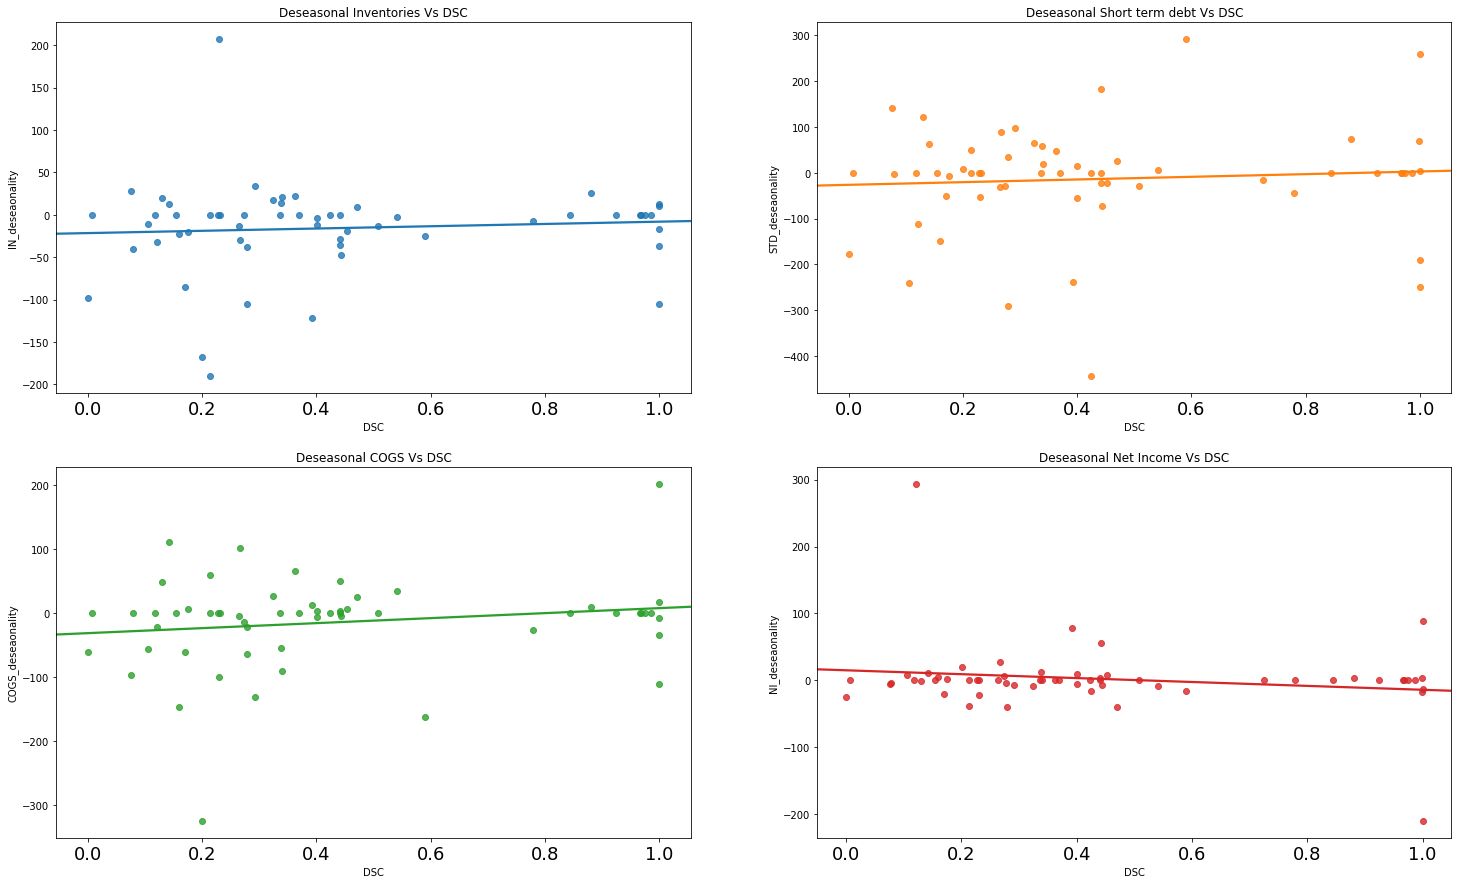

In [188]:
fig, ax = plt.subplots(2,2,figsize=(25,15))
sns.regplot(y='IN_deseaonality', x='DSC', data=df_new,ax=ax[0,0],ci=None)
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[0,0],c='g')
ax[0,0].set_title('Deseasonal Inventories Vs DSC')
#ax[0,0].set_ylim(-1,1)
sns.regplot(y='STD_deseaonality', x='DSC', data=df_new,ci=None,ax=ax[0,1])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[0,1],c='g')
#ax[0,1].set_xlim(-1,1)
ax[0,1].set_title('Deseasonal Short term debt Vs DSC')
sns.regplot(y='COGS_deseaonality', x='DSC', data=df_new,ci=None,ax=ax[1,0])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[0,1],c='g')
#ax[0,1].set_xlim(-1,1)
ax[1,0].set_title('Deseasonal COGS Vs DSC')
sns.regplot(y='NI_deseaonality', x='DSC', data=df_new,ci=None,ax=ax[1,1])
#sns.lineplot(x=[1,-1],y=[1,-1],ax=ax[0,1],c='g')
#ax[0,1].set_xlim(-1,1)
ax[1,1].set_title('Deseasonal Net Income Vs DSC')

In [ ]:
df_revenue_score = df_all_score.merge(QoQ[['Central Ticker','QoQ %']],on='Central Ticker',how='left').merge(YoY[['Central Ticker','YoY %']],on='Central Ticker',how='left')

In [ ]:
df_revenue_score

In [ ]:
df_qoq_revenue = df_revenue_score[['Central Ticker','Total_RV','Total_%C','QoQ %']].dropna()
df_yoy_revenue = df_revenue_score[['Central Ticker','Total_RV','Total_%C','YoY %']].dropna()

In [ ]:
#Plot For US
f, axarr = plt.subplots(2, 2,figsize=(10,10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=1.1, wspace=None, hspace=None)
axarr[0, 0].scatter(df_revenue_score['Total_RV'],df_revenue_score['YoY %'])
axarr[0, 0].set_ylabel('YoY')
axarr[0, 0].set_xlabel('Relationship Value Exposure')
axarr[0, 0].set_title('Relationship Value Exposure vs YoY Revenue')
axarr[0, 1].scatter(df_revenue_score['Total_RV'],df_revenue_score['QoQ %'])
axarr[0, 1].set_ylabel('QoQ')
axarr[0, 1].set_xlabel('Relationship Value Exposure')
axarr[0, 1].set_title('Relationship Value Exposure vs QoQ Revenue')
axarr[1, 0].scatter(df_revenue_score['Total_%C'],df_revenue_score['YoY %'])
axarr[1, 0].set_ylabel('YoY')
axarr[1, 0].set_xlabel('% of Cost')
axarr[1, 0].set_title('% of Cost vs YoY Revenue')
axarr[1, 1].scatter(df_revenue_score['Total_%C'],df_revenue_score['QoQ %'])
axarr[1, 1].set_ylabel('QoQ')
axarr[1, 1].set_xlabel('% of Cost Exposure')
axarr[1, 1].set_title('% of Cost vs QoQ Revenue')
plt.show()

In [257]:
#Correlation Coeff.
Corr=['Country','Corr_Exposure_with_YoYRevenue','Corr_%Cost_with_YoYRevenue','Corr_Exposure_with_QoQRevenue','Corr_%Cost_with_QoQRevenue']
US_Corr = []
US_Corr = np.corrcoef(df_yoy_score['Total_RV'],df_yoy_score['YoY %'])
US_Corr = 

array([[ 1.        , -0.00903199],
       [-0.00903199,  1.        ]])

In [258]:
np.corrcoef(df_qoq_score['Total_RV'],df_qoq_score['QoQ %'])

array([[ 1.        , -0.09582395],
       [-0.09582395,  1.        ]])

In [259]:
np.corrcoef(df_yoy_score['Total_%C'],df_yoy_score['YoY %'])

array([[1.        , 0.25889059],
       [0.25889059, 1.        ]])

In [260]:
np.corrcoef(df_qoq_score['Total_%C'],df_qoq_score['QoQ %'])

array([[ 1.        , -0.11681364],
       [-0.11681364,  1.        ]])

In [164]:
QoQ = df_fin_q.pivot_table(index='Stock Tickers Clean',columns='End Date',values='COGS',aggfunc='mean')
QoQ = QoQ.iloc[:,-2:]
QoQ = QoQ.reset_index()
QoQ.columns = ['Central Ticker','18Q4','19Q1']
QoQ['QoQ %'] = (QoQ['19Q1'] - QoQ['18Q4'])/QoQ['18Q4']

In [165]:
YoY = df_fin_y.pivot_table(index='Stock Tickers Clean',columns='End Date',values='COGS',aggfunc='mean')
YoY = YoY.iloc[:,-2:]
YoY = YoY.reset_index()
YoY.columns = ['Central Ticker','18Q1','19Q1']
YoY['YoY %'] = (YoY['19Q1'] - YoY['18Q1'])/YoY['18Q1']

In [261]:
df_cogs_score = df_all_score.merge(QoQ[['Central Ticker','QoQ %']],on='Central Ticker',how='left').merge(YoY[['Central Ticker','YoY %']],on='Central Ticker',how='left')
df_cogs_score

Central Ticker  %Cost_Exposure  Relationship Value USD  \
0   000572 CH Equity          0.0005            5.860587e+06   
1   000800 CH Equity          0.0370            1.816377e+08   
2   000913 CH Equity          0.0000            4.725329e+06   
3   000927 CH Equity          0.0001            2.818644e+07   
4   002176 CH Equity          0.0000            2.273660e+05   
5     1114 HK Equity          0.0000            1.079210e+08   
6     1211 HK Equity          0.0089            3.351576e+08   
7      175 HK Equity          0.0407            8.726827e+08   
8     1958 HK Equity          0.0110            2.617812e+08   
9   200054 CH Equity          0.0000            9.436183e+06   
10  200625 CH Equity          0.0167            5.629999e+08   
11    2238 HK Equity          0.0122            3.131299e+08   
12    2333 HK Equity          0.0094            2.467055e+08   
13  300417 CH Equity          0.0000            0.000000e+00   
14     422 HK Equity          0.0000            2.096620e+06   
15     489 HK Equity          0.0335            7.150114e+08   
16  600006 CH Equity          0.0024            1.844362e+08   
17  600099 CH Equity          0.0000            1.425229e+06   
18  600104 CH Equity          0.0123            2.002456e+09   
19  600213 CH Equity          0.0027            1.295067e+07   
20  600418 CH Equity          0.0468            3.604809e+08   
21  600609 CH Equity          0.0026            1.261848e+07   
22  600733 CH Equity          0.0000            0.000000e+00   
23  600805 CH Equity          0.0000            6.164775e+03   
24  600877 CH Equity          0.0000            8.413544e+05   
25  601127 CH Equity          0.0000            4.370766e+06   
26  601777 CH Equity          0.0057            3.651887e+06   
27  601965 CH Equity          0.0000            3.189762e+04   
28  603129 CH Equity          0.0000            7.758616e+04   
29  603766 CH Equity          0.0045            1.195687e+07   
30    7201 JP Equity          0.0000            1.150315e+10   
31    7267 JP Equity          0.0000            1.386581e+10   
32     729 HK Equity          0.0000            9.022737e+05   
33    ELIO US Equity          0.0000            8.170000e+03   
34       F US Equity          0.0014            1.689179e+10   
35    FCAU US Equity          0.0000            1.296247e+10   
36     FUV US Equity          0.0000            0.000000e+00   
37      GM US Equity          0.0008            1.549046e+10   
38     HOG US Equity          0.0000            1.334853e+08   
39    KNDI US Equity          0.0000            1.976600e+05   
40     NIO US Equity          0.0004            7.289425e+06   
41    RACE US Equity          0.0000            6.923243e+07   
42    TSLA US Equity          0.0106            1.525937e+09   
43     VOW GR Equity          0.0000            1.767709e+10   
44    ZAAP US Equity          0.0000            3.310000e+03   

    Relationship Value USD_Exposure  % of total relationship value  \
0                      1.514833e+05                       0.025848   
1                      2.598288e+07                       0.143048   
2                      0.000000e+00                       0.000000   
3                      9.088996e+03                       0.000322   
4                      0.000000e+00                       0.000000   
5                      0.000000e+00                       0.000000   
6                      3.363128e+07                       0.100345   
7                      1.373324e+08                       0.157368   
8                      4.873454e+07                       0.186165   
9                      0.000000e+00                       0.000000   
10                     3.299899e+07                       0.058613   
11                     1.397134e+07                       0.044618   
12                     2.465047e+07                       0.099919   
13                     0.000000e+00                       0.000000   
14         

In [265]:
df_qoq_cogs = df_cogs_score[['Central Ticker','Total_RV','Total_%C','QoQ %']].dropna()
df_yoy_cogs = df_yoy_cogs.replace('inf','NaN')
df_yoy_cogs = df_cogs_score[['Central Ticker','Total_RV','Total_%C','YoY %']].dropna()
df_yoy_cogs = df_yoy_cogs.replace('inf','NaN')
df_yoy_cogs = df_yoy_cogs[df_yoy_cogs['Central Ticker']!='FUV US Equity']

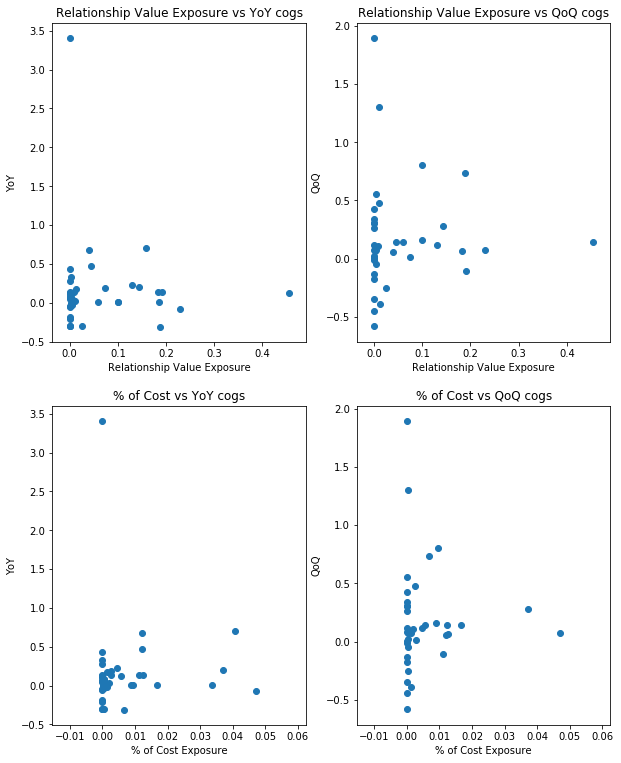

In [263]:
f, axarr = plt.subplots(2, 2,figsize=(10,10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=1.1, wspace=None, hspace=None)
axarr[0, 0].scatter(df_cogs_score['Total_RV'],df_cogs_score['YoY %'])
axarr[0, 0].set_ylabel('YoY')
axarr[0, 0].set_xlabel('Relationship Value Exposure')
axarr[0, 0].set_title('Relationship Value Exposure vs YoY cogs')
axarr[0, 1].scatter(df_cogs_score['Total_RV'],df_cogs_score['QoQ %'])
axarr[0, 1].set_ylabel('QoQ')
axarr[0, 1].set_xlabel('Relationship Value Exposure')
axarr[0, 1].set_title('Relationship Value Exposure vs QoQ cogs')
axarr[1, 0].scatter(df_cogs_score['Total_%C'],df_cogs_score['YoY %'])
axarr[1, 0].set_ylabel('YoY')
axarr[1, 0].set_xlabel('% of Cost Exposure')
axarr[1, 0].set_title('% of Cost vs YoY cogs')
axarr[1, 1].scatter(df_cogs_score['Total_%C'],df_cogs_score['QoQ %'])
axarr[1, 1].set_ylabel('QoQ')
axarr[1, 1].set_xlabel('% of Cost Exposure')
axarr[1, 1].set_title('% of Cost vs QoQ cogs')
plt.show()

In [276]:
np.corrcoef(df_yoy_cogs['Total_RV'],df_yoy_cogs['YoY %'])

array([[ 1.        , -0.04434589],
       [-0.04434589,  1.        ]])

In [277]:
np.corrcoef(df_qoq_cogs['Total_RV'],df_qoq_cogs['QoQ %'])

array([[1.      , 0.028617],
       [0.028617, 1.      ]])

In [278]:
np.corrcoef(df_yoy_cogs['Total_%C'],df_yoy_cogs['YoY %'])

array([[1.       , 0.0365563],
       [0.0365563, 1.       ]])

In [279]:
np.corrcoef(df_qoq_cogs['Total_%C'],df_qoq_cogs['QoQ %'])

array([[1.       , 0.0086624],
       [0.0086624, 1.       ]])

In [280]:
stock_price = pd.read_excel('Stock Price Info.xlsx',sheet_name= 'Price')
stock_price1 = stock_price[['Ticker','2week Price Diff']]
stock_price1.columns = ['Central Ticker','2week Price Diff']

In [281]:
df_price_score = df_all_score.merge(stock_price1[['Central Ticker','2week Price Diff']],on='Central Ticker',how='left')

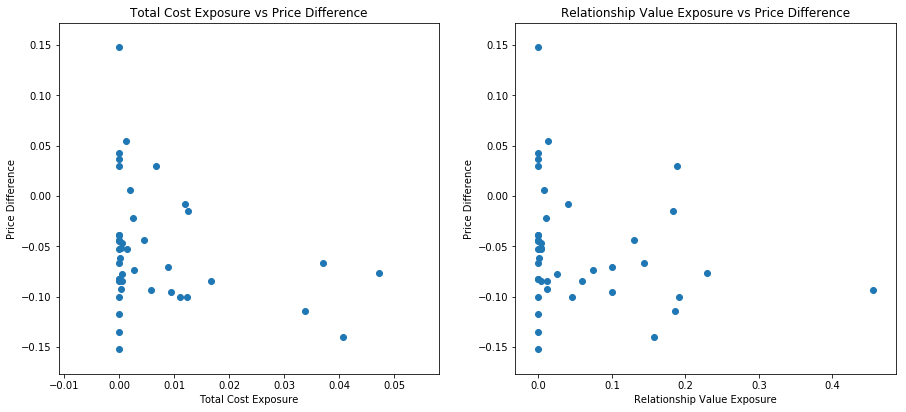

In [282]:
f, axarr = plt.subplots(1, 2,figsize=(15,5))
plt.subplots_adjust(left=None, bottom=None, right=None, top=1.1, wspace=None, hspace=None)
axarr[0].scatter(df_price_score['Total_%C'],df_price_score['2week Price Diff'])
axarr[0].set_ylabel('Price Difference')
axarr[0].set_xlabel('Total Cost Exposure')
axarr[0].set_title('Total Cost Exposure vs Price Difference')
axarr[1].scatter(df_price_score['Total_RV'],df_price_score['2week Price Diff'])
axarr[1].set_ylabel('Price Difference')
axarr[1].set_xlabel('Relationship Value Exposure')
axarr[1].set_title('Relationship Value Exposure vs Price Difference')
plt.show()

In [287]:
df_price_score=df_price_score.dropna()

In [288]:
np.corrcoef(df_price_score['Total_%C'],df_price_score['2week Price Diff'])

array([[ 1.        , -0.26249052],
       [-0.26249052,  1.        ]])

In [289]:
np.corrcoef(df_price_score['Total_RV'],df_price_score['2week Price Diff'])

array([[ 1.        , -0.18919221],
       [-0.18919221,  1.        ]])

In [290]:
df_all_score2 = df_all_score.merge(df_revenue_score[['Central Ticker','QoQ %','YoY %']],on='Central Ticker',how='left')
df_all_score2 = df_all_score2.merge(df_cogs_score[['Central Ticker','QoQ %','YoY %']],on='Central Ticker',how='left')
df_all_score2 = df_all_score2.merge(df_price_score[['Central Ticker','2week Price Diff']],on='Central Ticker',how='left')
df_all_score2.columns = ['Central Ticker', '%Cost', 'Relationship Value USD',
       'Relationship Value USD_total', '% of total relationship value',
       'Indirect Score_RV', 'Indirect Score_%C', 'Total_RV', 'Total_%C',
       'QoQ %_Revenue', 'YoY %_Revenue', 'QoQ %_COGS', 'YoY %_COGS', '2week Price Diff']

In [292]:
df_all_score2.to_excel('45Automobile_Exposure Score.xlsx',index=False)